In [ ]:
import numpy as np
import scipy.integrate as integ
import scipy.interpolate as i2
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from astropy import units as u
from astropy import constants as c
# import cmath as cm
import shootingres as shr

import scipy.optimize as o
try:
    import cPickle as pickle
except ImportError:
    import pickle

import pandas as pd 
# import ray
from scipy.integrate import cumtrapz
import seaborn as sns
sns.set_theme()
sns.set_style("white")
sns.set_style("ticks")
sns.set_style("ticks",{'axes.grid' : True})
import scienceplots
plt.style.use('science')

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.patches import Rectangle
f = 16
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib.patches as patches

In [2]:
def shoot_hain_v3(w, eta, qr, qrp, qi, qip,  k=np.pi/2, m=1, B0=0, Bz = 0, keplerian=True, cc=1, r2=5, max=500, q=1/2, W = 0, Wp = 0, Wpp = 0):
    ## DIFF IS INCLUDES IMAG
    y0 = [0.,1.+1.j]
    y = i.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(w,eta, qr, qrp, qi, qip, m,k,B0,Bz, keplerian,cc, q, W, Wp, Wpp), max_step=24./(max/r2))
    r = np.sqrt(y.t)
    u = y.y[0]
    return ((u/r)[-1])

### REDONE DERIVATION
def shoot_setup_hain_v2(x, y, w, elecd, k2rs, k2rps, k2is, k2ips, m, kz=np.pi/4, B0=60, Bz=12.967, keplerian=True, cc=1, q=1/2, W_f = 0, Wp_f = 0, Wpp_f = 0):
    mu_0 = 1.2566*10**(-6)
     ### PM = 1
    r = np.sqrt(x)
    # print(elecd)
    # print(k2rs)
    # print(k2is)
    k2 = k2rs(r) + 1j*k2is(r)
    k2p = k2rps(r) + 1j*k2ips(r)
    vp1 = 1
    if keplerian == True:
        vp = vp1/(x**(1/4))
        W = vp/r
        Wp = -3/4*vp1/(x**(7/4)) * 2*r
        Wpp = 21/16*vp1/(x**(11/4)) * 4 * r**2
    elif keplerian == 'khalzov':
        W = vp1/x
        Wp = -vp1/x**2
    elif keplerian == 'rigid':
        W = vp1
        Wp = 0
    elif keplerian == False:
        vp = vp1/(x**(q/2))
        W = vp/r
        Wp = (-1*(q+1)/2)*(W/x)
    elif keplerian == 'saturated':
        # print('ahh')
        A0 = 1.4923889E-02
        A1 = -1.0114824E-01
        A2 = 8.5753488E-02
        A3 = -2.8021088E-02
        A4 = -4.7882189E-01
        A5 = 1.0877462E-01
        A6 = 6.7857446E+00
        A7 = -5.0846913E+00
        A8 = -4.3114342E+01
        A9 = 5.2943846E+01
        A10 = 1.2219068E+02
        A11 = -1.9185099E+02
        A12 = -1.7535573E+02
        A13 = 3.4808679E+02
        A14 = 1.1975807E+02
        A15 = -3.4500839E+02
        A16 =  -1.4844420E+01
        A17 = 1.7930272E+02
        A18 = -2.5033736E+01
        ###  0.08875 + 0.91125/r^2 
        W = 0.08875 + 0.91125/r**2 + A0 + A1*(r-2) + A2*(r-2)**2+A3*(r-2)**3 + A4*(r-2)**4 + A5*(r-2)**5 + A6*(r-2)**6 + A7*(r-2)**7 + A8*(r-2)**8 + A9*(r-2)**9 + A10*(r-2)**10 + A11*(r-2)**11 + A12*(r-2)**12 + A13*(r-2)**13 + A14*(r-2)**14 + A15*(r-2)**15 + A16*(r-2)**16 + A17*(r-2)**17 + A18*(r-2)**18 - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**19 - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**20
        Wp = - 2 * 0.91125/r**3  + A1 + 2 * A2*(r-2) + 3 * A3*(r-2)**2 + 4 * A4*(r-2)**3 + 5 * A5*(r-2)**4 + 6 * A6*(r-2)**5 + 7 * A7*(r-2)**6 + 8 * A8*(r-2)**7 + 9 * A9*(r-2)**8 + 10 * A10*(r-2)**9 + 11 * A11*(r-2)**10 + 12 * A12*(r-2)**11 + 13 * A13*(r-2)**12 + 14 * A14*(r-2)**13 + 15 * A15*(r-2)**14 + 16 * A16*(r-2)**15 + 17 * A17*(r-2)**16 + 18 * A18*(r-2)**17 - 19 * ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**18 - 20 * ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**19
        Wpp = 3 * 2 * 0.91125/r**4  + 2 * A2 + 3 * 2 * A3*(r-2) + 4 * 3 * A4*(r-2)**2 + 5 * 4 * A5*(r-2)**3 + 6 * 5 * A6*(r-2)**4 + 7 * 6 * A7*(r-2)**5 + 8 * 7 * A8*(r-2)**6 + 9 * 8 * A9*(r-2)**7 + 10 * 9  * A10*(r-2)**8 + 11 * 10 * A11*(r-2)**9 + 12 * 11 * A12*(r-2)**10 + 13 * 12 * A13*(r-2)**11 + 14 * 13 * A14*(r-2)**12 + 15 * 14 * A15*(r-2)**13 + 16 * 15 * A16*(r-2)**14 + 17 * 16 * A17*(r-2)**15 + 18 * 17 * A18*(r-2)**16 - 19 * 18 * ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**17 - 20 * 19 * ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**18 
        
    elif keplerian == 'saturated2':
        W = W_f(r)
        Wp = Wp_f(r)
        Wpp = Wpp_f(r)
    elif keplerian == 'tanh':
        a = c = b = d = 1
        a = 0.6
        c = a
        d = 0.9
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'exp1':
        a = 1
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp2':
        a = 1
        W = a*r*np.exp(1-r) + (1-a)
        Wp = a*np.exp(1-r)*(1-r)
        Wpp = a*np.exp(1-r)*(r-2)
    elif keplerian == 'exp3':
        a = .75
        W = a*r*np.exp(1-r) + (1-a)
        Wp = a*np.exp(1-r)*(1-r)
        Wpp = a*np.exp(1-r)*(r-2)
    elif keplerian == 'exp4':
        a = 0.73123123
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp5':
        a = 0.8689352412721272
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp6':
        a = 0.9366210025563255
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp7':
        a = 0.9448239074457745
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp8':
        a = 0.9409132827360274
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'exp9':
        a = 0.9375052606522065
        W = a*np.exp(1-r) + 1-a
        Wp = -a*np.exp(1-r)
        Wpp = a*np.exp(1-r)
    elif keplerian == 'con':
        W = 1
        Wp = 0
        Wpp = 0
    elif keplerian == 'tanhv5':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.77
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv6':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.5940
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv7':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.7488
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv8':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.8463
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv9':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.8158134053621449
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv10':
        a = c = b = d = 1
        a = 1
        c = a
        d = 0.8303
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    # Define Normalizations
    r1 = 0.1

    ## Define OMEGA0:
    bb = 10000
    v0 = bb/np.sqrt(r1)
    Omega0 = v0/r1

    vAp1 = B0/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    vAp = vAp1/r
    vAz = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    ### MODIFY w
    wA = (m/r)*vAp + kz*vAz
    wb = w-m*W
    wc = 2*vAp/r*cc
    
    wAp = -m*vAp1/x**2*2*r
    wcp = -2*vAp1/x**2*cc*2*r

    # elecd = elecd / (r1**2*Omega0)*2
    elecd = elecd / (r1**2*Omega0)
    nu = elecd*1

    ### Note this is k2p with respect to r.
    wbp = -m*Wp
    wbpp = -m*Wpp
    lnu = -1j*wb + nu*k2
    lnup = -1j*wbp + nu*k2p
    leta = -1j*wb + elecd*k2
    letap = -1j*wbp + elecd*k2p
    
    L = lnu + wA**2/(leta)
    Lp = lnup + 2*wA*wAp/leta - wA**2*letap/(leta**2)
    h2 = kz**2 + m**2/r**2
    h = np.sqrt(h2)
    hp = -1/h*(m**2/r**3)
    E = L**2 + L*r/leta * wc * (1j*wA*Wp/leta - 1/2*wcp) + 2*(W - 1j*1/2*wc*wA/leta)*(2*W + (1+wA**2/leta**2)*r*Wp - 1j*wA*wc/leta)
    f = 2*r**2*(leta*lnu + wA**2)/((kz**2*r**2+m**2))
    fp = 1/(kz**2*r**2+m**2) * (4*r*(leta*lnu + wA**2) +2*r**2*(letap*lnu+leta*lnup + 2*wA*wAp)) - 1/(kz**2*r**2+m**2)**2 * (4*kz**2*r**3*(lnu*leta + wA**2))
    s = (1j*m*(lnu - leta)/(h**2*r)*Wp)
    g_dr_num_undiff = ((leta - lnu) * r * Wp + 2*(W*leta - 1/2*wc*wA))
    g_dr_num_diff = (letap - lnup) * r * Wp + (leta - lnu)*(Wp + r*Wpp) + 2*(Wp*leta + W*letap - 1/2*wcp*wA - 1/2*wc*wAp)
    g_dr_denom_undiff = h**2*r**2
    g_dr_denom_diff = 2*h*hp*r**2 + 2*h**2*r
    g_dr_term = 1j*m*(g_dr_num_diff/g_dr_denom_undiff - g_dr_num_undiff*g_dr_denom_diff/g_dr_denom_undiff**2)

    g = g_dr_term + E*leta/(L*r) - (W - 1j*1/2*wc*wA/leta)*(2*m**2/(L*h**2*r**3))*((leta - lnu)*r*Wp + 2*(W*leta - 1j * 1/2*wA*wc))

    u, du = y

    ### REWRITE ALL TERMS
    f = leta*L/(h**2*r)
    fp = (letap*L + leta*Lp)/(h**2*r) - leta*L*(2*h*hp*r+h**2)/(h**2*r)**2

    u_coeff = 1/(-4*r)*-g
    du_coeff = -1/(4*r)*(2*(f+r*fp)) - s/(2)
    d2u_coeff = -r*f
    dudx = [du, (1/d2u_coeff)*(-du_coeff*du - u_coeff*u)]

    return dudx

In [3]:
## SET CONSTANTS
rho = (1.0*10**19) * (2.0*1.6725*10**(-27))
mu_0 = 1.2566*10**(-6)

# Define Normalizations
r1 = 0.1

## Define OMEGA0:
bb = 10000
v0 = bb/np.sqrt(r1)
Omega0 = v0/r1

## Initial Profiles

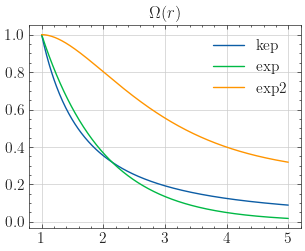

0.138532726298838
0.019452567136335603
0.409090909090908
2.0
0.7538198523064819
Average vp
-0.1145339225519668
-0.2655374650639487
-0.4091962941967478
Vorticity Ratios
-0.826458036168476
-13.650331899048686
-0.5428375601291366


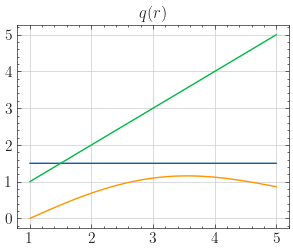

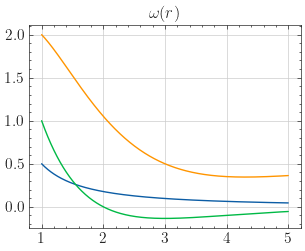

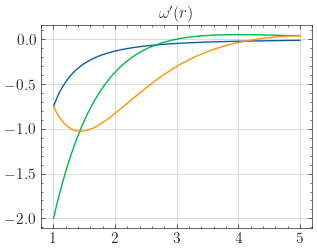

In [4]:
dt  = 1/100
r = np.arange(1,5+dt, dt)

W_kep = i2.CubicSpline(r, 1/r**(3/2))
Wp_kep = W_kep.derivative()
Wpp_kep = Wp_kep.derivative()
v_kep = 1/r*(i2.CubicSpline(r, r**2*W_kep(r)).derivative())(r) 
vp_kep = i2.CubicSpline(r, v_kep ).derivative()(r)

a = 11/12
a = 14/15
a = 1
# a = 0.73232323
W_exp = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))
Wp_exp = W_exp.derivative()
Wpp_exp = Wp_exp.derivative()
v_exp = 1/r*(i2.CubicSpline(r, r**2*W_exp(r)).derivative())(r) 
vp_exp = i2.CubicSpline(r, v_exp).derivative()(r)

### Exp2 
a = .75 #exp3
# a =1 
W_exp2 = i2.CubicSpline(r, r*a*np.exp(1-r)+(1-a))

a = 1
c = a 
d = 0.77
b = 1
# W_exp2 = i2.CubicSpline(r, d*np.tanh(-c*r+a)+b)

Wp_exp2 = W_exp2.derivative()
Wpp_exp2 = Wp_exp2.derivative()
v_exp2 = 1/r*(i2.CubicSpline(r, r**2*W_exp2(r)).derivative())(r) 
vp_exp2 = i2.CubicSpline(r, v_exp2).derivative()(r)


W_lin =  i2.CubicSpline(r, 1+(1-r)/7)
W_lin = i2.CubicSpline(r, 1+(1-r)/4.4)
Wp_lin = W_lin.derivative()
Wpp_lin = Wp_lin.derivative()
v_lin = 1/r*(i2.CubicSpline(r, r**2*W_lin(r)).derivative())(r) 
vp_lin = i2.CubicSpline(r, v_lin).derivative()(r)


W_con = i2.CubicSpline(r, r/r)
Wp_con = W_con.derivative()
Wpp_con = Wp_con.derivative()
v_con = 1/r*(i2.CubicSpline(r, r**2*W_con(r)).derivative())(r) 
vp_con = i2.CubicSpline(r, v_con).derivative()(r)


plt.figure()
plt.plot(r, W_kep(r),label = 'kep')
plt.plot(r, W_exp(r), label = 'exp')
# plt.plot(r, W_lin(r))
# plt.plot(r, W_con(r), label = 'con')
plt.plot(r, W_exp2(r), label = 'exp2')

plt.title(r'$\Omega(r)$')
plt.legend()
plt.show()


print(np.average(1/r*(2*r*W_kep(r) + r**2*Wp_kep(r))))
print(np.average(1/r*(2*r*W_exp(r) + r**2*Wp_exp(r))))
print(np.average(1/r*(2*r*W_lin(r) + r**2*Wp_lin(r))))
print(np.average(1/r*(2*r*W_con(r) + r**2*Wp_con(r))))
print(np.average(1/r*(2*r*W_exp2(r) + r**2*Wp_exp2(r))))


print('Average vp')
print(np.average(-1/r**2*(2*r*W_kep(r) + r**2*Wp_kep(r)) + 1/r*(2*W_kep(r) + 4*r*Wp_kep(r) + r**2*Wpp_kep(r))))
print(np.average(-1/r**2*(2*r*W_exp(r) + r**2*Wp_exp(r)) + 1/r*(2*W_exp(r) + 4*r*Wp_exp(r) + r**2*Wpp_exp(r))))
# print(np.average(-1/r**2*(2*r*W_lin(r) + r**2*Wp_lin(r)) + 1/r*(2*W_lin(r) + 4*r*Wp_lin(r) + r**2*Wpp_lin(r))))
# print(np.average(-1/r**2*(2*r*W_con(r) + r**2*Wp_con(r)) + 1/r*(2*W_con(r) + 4*r*Wp_con(r) + r**2*Wpp_con(r))))
print(np.average(-1/r**2*(2*r*W_exp2(r) + r**2*Wp_exp2(r)) + 1/r*(2*W_exp2(r) + 4*r*Wp_exp2(r) + r**2*Wpp_exp2(r))))

R_kep = np.average(vp_kep)/np.average(v_kep)
R_exp = np.average(vp_exp)/np.average(v_exp)
R_lin = np.average(vp_lin)/np.average(v_lin)
R_con = np.average(vp_con)/np.average(v_con)
R_exp2 = np.average(vp_exp2)/np.average(v_exp2)

print('Vorticity Ratios')
print(R_kep)
print(R_exp)
# print(R_lin)
# print(R_con)
print(R_exp2)

plt.figure()
plt.plot(r, -r*Wp_kep(r)/W_kep(r))
plt.plot(r, -r*Wp_exp(r)/W_exp(r))
# plt.plot(r, -r*Wp_lin(r)/W_lin(r))
# plt.plot(r, -r*Wp_con(r)/W_con(r))
plt.plot(r, -r*Wp_exp2(r)/W_exp2(r))
plt.title(r'$q(r)$')
plt.show()

plt.figure()
plt.plot(r, 1/r*(2*r*W_kep(r) + r**2*Wp_kep(r)))
plt.plot(r, 1/r*(2*r*W_exp(r) + r**2*Wp_exp(r)))
# plt.plot(r, 1/r*(2*r*W_lin(r) + r**2*Wp_lin(r)))
# plt.plot(r, 1/r*(2*r*W_con(r) + r**2*Wp_con(r)))
plt.plot(r, 1/r*(2*r*W_exp2(r) + r**2*Wp_exp2(r)))
plt.title(r'$\omega(r)$')
plt.show()

plt.figure()
plt.plot(r, -1/r**2*(2*r*W_kep(r) + r**2*Wp_kep(r)) + 1/r*(2*W_kep(r) + 4*r*Wp_kep(r) + r**2*Wpp_kep(r)))
plt.plot(r, -1/r**2*(2*r*W_exp(r) + r**2*Wp_exp(r)) + 1/r*(2*W_exp(r) + 4*r*Wp_exp(r) + r**2*Wpp_exp(r)))
# plt.plot(r, -1/r**2*(2*r*W_lin(r) + r**2*Wp_lin(r)) + 1/r*(2*W_lin(r) + 4*r*Wp_lin(r) + r**2*Wpp_lin(r)))
# plt.plot(r, -1/r**2*(2*r*W_con(r) + r**2*Wp_con(r)) + 1/r*(2*W_con(r) + 4*r*Wp_con(r) + r**2*Wpp_con(r)))
plt.plot(r, -1/r**2*(2*r*W_exp2(r) + r**2*Wp_exp2(r)) + 1/r*(2*W_exp2(r) + 4*r*Wp_exp2(r) + r**2*Wpp_exp2(r)))
plt.title(r"$\omega'(r)$")
plt.show()


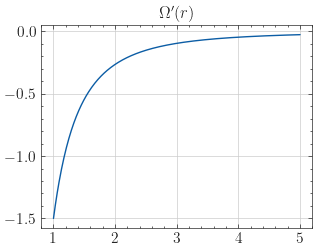

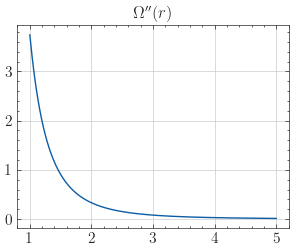

In [5]:

plt.figure()
plt.plot(r, Wp_kep(r))
plt.title(r"$\Omega'(r)$")
plt.show()

plt.figure()
plt.plot(r, Wpp_kep(r))
plt.title(r"$\Omega''(r)$")
plt.show()

### Continues

In [6]:
dt  = 1/100
r = np.arange(1,5+dt, dt)

ai = np.linspace(0.5,1, 100)
ai_r = []
Vratios = []
for j in range(0, len(ai)):
    ### Exp2 
    a = ai[j]#exp3
    # a =1 
    W_exp2 = i2.CubicSpline(r, r*a*np.exp(1-r)+(1-a))
    Wp_exp2 = W_exp2.derivative()
    Wpp_exp2 = Wp_exp2.derivative()
    v_exp2 = 1/r*(i2.CubicSpline(r, r**2*W_exp2(r)).derivative())(r) 
    vp_exp2 = i2.CubicSpline(r, v_exp2).derivative()(r)

    # plt.figure()
    # plt.plot(r, W_exp2(r), label = 'exp2')
    # plt.title(r'$\Omega(r)$')
    # plt.legend()
    # plt.show()

    R_exp2 = np.average(vp_exp2)/np.average(v_exp2)

    
    
    if(np.max(-r*Wp_exp2(r)/W_exp2(r)) >= 1.0):

        print(f'a = {ai[j]}')
        print(f'Vorticity Ratios = {R_exp2}')
        ai_r.append(ai[j])
        Vratios.append(R_exp2)
        
        # plt.figure()
        # plt.plot(r, -r*Wp_exp2(r)/W_exp2(r))
        # plt.title(r'$q(r)$')
        # plt.show()

    # plt.figure()
    # plt.plot(r, 1/r*(2*r*W_exp2(r) + r**2*Wp_exp2(r)))
    # plt.title(r'$\omega(r)$')
    # plt.show()

    # plt.figure()
    # plt.plot(r, -1/r**2*(2*r*W_exp2(r) + r**2*Wp_exp2(r)) + 1/r*(2*W_exp2(r) + 4*r*Wp_exp2(r) + r**2*Wpp_exp2(r)))
    # plt.title(r"$\omega'(r)$")
    # plt.show()
print(np.max(np.abs(Vratios)))
print(np.min(np.abs(Vratios)))

a = 0.702020202020202
Vorticity Ratios = -0.4595136493031606
a = 0.7070707070707071
Vorticity Ratios = -0.4675263826753812
a = 0.7121212121212122
Vorticity Ratios = -0.4757037697627248
a = 0.7171717171717171
Vorticity Ratios = -0.4840509384576039
a = 0.7222222222222222
Vorticity Ratios = -0.49257323181949664
a = 0.7272727272727273
Vorticity Ratios = -0.5012762194811491
a = 0.7323232323232324
Vorticity Ratios = -0.510165709786586
a = 0.7373737373737375
Vorticity Ratios = -0.5192477627188139
a = 0.7424242424242424
Vorticity Ratios = -0.5285287036757779
a = 0.7474747474747475
Vorticity Ratios = -0.5380151381627546
a = 0.7525252525252526
Vorticity Ratios = -0.5477139674703491
a = 0.7575757575757576
Vorticity Ratios = -0.5576324054185581
a = 0.7626262626262627
Vorticity Ratios = -0.5677779962499183
a = 0.7676767676767677
Vorticity Ratios = -0.5781586337678597
a = 0.7727272727272727
Vorticity Ratios = -0.5887825818195728
a = 0.7777777777777778
Vorticity Ratios = -0.5996584962366299
a = 0.782

In [7]:
# Exp

In [8]:
dt  = 1/100
r = np.arange(1,5+dt, dt)

ai = np.linspace(0.5,1, 1000)
ai_r = []
Vratios = []
for j in range(0, len(ai)):
    ### Exp2 
    a = ai[j]#exp3
    # a =1 
    W_exp2 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))
    Wp_exp2 = W_exp2.derivative()
    Wpp_exp2 = Wp_exp2.derivative()
    v_exp2 = 1/r*(i2.CubicSpline(r, r**2*W_exp2(r)).derivative())(r) 
    vp_exp2 = i2.CubicSpline(r, v_exp2).derivative()(r)

    # plt.figure()
    # plt.plot(r, W_exp2(r), label = 'exp2')
    # plt.title(r'$\Omega(r)$')
    # plt.legend()
    # plt.show()

    R_exp2 = np.average(vp_exp2)/np.average(v_exp2)

    
    
    if(np.max(-r*Wp_exp2(r)/W_exp2(r)) >= 1.0):

        print(f'a = {ai[j]}')
        print(f'Vorticity Ratios = {R_exp2}')
        ai_r.append(ai[j])
        Vratios.append(R_exp2)
        
        # plt.figure()
        # plt.plot(r, -r*Wp_exp2(r)/W_exp2(r))
        # plt.title(r'$q(r)$')
        # plt.show()

    # plt.figure()
    # plt.plot(r, 1/r*(2*r*W_exp2(r) + r**2*Wp_exp2(r)))
    # plt.title(r'$\omega(r)$')
    # plt.show()

    # plt.figure()
    # plt.plot(r, -1/r**2*(2*r*W_exp2(r) + r**2*Wp_exp2(r)) + 1/r*(2*W_exp2(r) + 4*r*Wp_exp2(r) + r**2*Wpp_exp2(r)))
    # plt.title(r"$\omega'(r)$")
    # plt.show()
    
Vratios = np.array(Vratios)
ai_r = np.array(ai_r)

print(np.max(np.abs(Vratios)))
print(np.min(np.abs(Vratios)))

ii = np.where(np.abs(Vratios) == np.max(np.abs(Vratios)))
jj = np.where(np.abs(Vratios) == np.min(np.abs(Vratios)))
print(ai_r[ii[:]])
print(ai_r[jj[:]])

a = 0.7312312312312312
Vorticity Ratios = -0.35190320220825494
a = 0.7317317317317318
Vorticity Ratios = -0.3527778480792928
a = 0.7322322322322322
Vorticity Ratios = -0.3536556479639753
a = 0.7327327327327328
Vorticity Ratios = -0.3545366189538601
a = 0.7332332332332332
Vorticity Ratios = -0.35542077826329704
a = 0.7337337337337337
Vorticity Ratios = -0.3563081432321941
a = 0.7342342342342343
Vorticity Ratios = -0.35719873132635216
a = 0.7347347347347347
Vorticity Ratios = -0.3580925601380535
a = 0.7352352352352353
Vorticity Ratios = -0.35898964738842304
a = 0.7357357357357357
Vorticity Ratios = -0.3598900109280014
a = 0.7362362362362362
Vorticity Ratios = -0.3607936687376492
a = 0.7367367367367368
Vorticity Ratios = -0.3617006389303065
a = 0.7372372372372372
Vorticity Ratios = -0.3626109397520138
a = 0.7377377377377378
Vorticity Ratios = -0.3635245895827132
a = 0.7382382382382382
Vorticity Ratios = -0.3644416069379423
a = 0.7387387387387387
Vorticity Ratios = -0.36536201047050576
a =

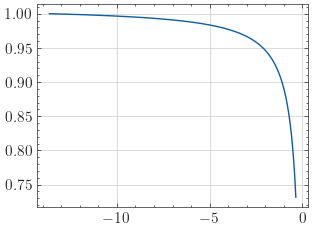

In [9]:
plt.figure()
plt.plot(Vratios, ai_r)
plt.show()

## Exponential Profiles

wb = 0.11472757151360231
wA^2-wb^2 = 0.16975274862468795


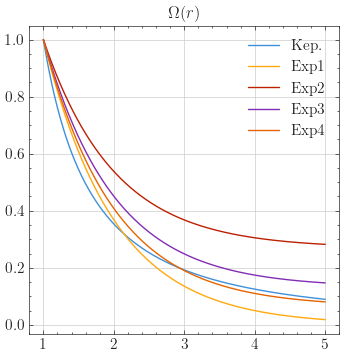

Vorticity Ratios
R_Kep = -0.826458036168476
R_Exp1 = -13.650331899048686
R_Exp2 = -0.3519032000605362
R_Exp3 = -0.826899492321217
R_Exp4 = -1.7154691608997548


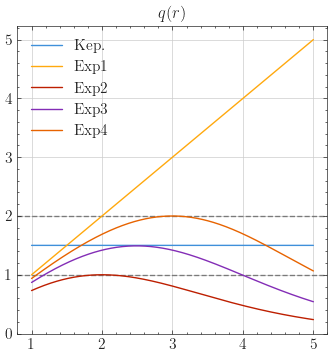

5.000000906537118


In [10]:
dt  = 1/100
r = np.arange(1,5+dt, dt)

W_kep = i2.CubicSpline(r, 1/r**(3/2))
Wp_kep = W_kep.derivative()
Wpp_kep = Wp_kep.derivative()
v_kep = 1/r*(i2.CubicSpline(r, r**2*W_kep(r)).derivative())(r) 
vp_kep = i2.CubicSpline(r, v_kep ).derivative()(r)

a = 1
W_exp1 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))
Wp_exp1 = W_exp1.derivative()
Wpp_exp1 = Wp_exp1.derivative()
v_exp1 = 1/r*(i2.CubicSpline(r, r**2*W_exp1(r)).derivative())(r) 
vp_exp1 = i2.CubicSpline(r, v_exp1).derivative()(r)

### Exp4 Profile (Minimal R ratio)
a = 0.73123123
W_exp2 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))
Wp_exp2 = W_exp2.derivative()
Wpp_exp2 = Wp_exp2.derivative()
v_exp2 = 1/r*(i2.CubicSpline(r, r**2*W_exp2(r)).derivative())(r) 
vp_exp2 = i2.CubicSpline(r, v_exp2).derivative()(r)

kz = np.pi/4
wr =0.5634383279995057
vA = .5942818054963932
wb = wr - W_exp2(r)
print(f'wb = {np.average(wb)}')
print(f'wA^2-wb^2 = {np.average((vA*kz)**2 - wb**2)}')
### Exp5 Profile (Kep. R Ratio)
a = 0.8689352412721272
W_exp3 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))
Wp_exp3 = W_exp3.derivative()
Wpp_exp3 = Wp_exp3.derivative()
v_exp3 = 1/r*(i2.CubicSpline(r, r**2*W_exp3(r)).derivative())(r) 
vp_exp3 = i2.CubicSpline(r, v_exp3).derivative()(r)

### q(r) = 2
a = 0.9366210025563255
W_exp4 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))
Wp_exp4 = W_exp4.derivative()
Wpp_exp4 = Wp_exp4.derivative()
v_exp4 = 1/r*(i2.CubicSpline(r, r**2*W_exp4(r)).derivative())(r) 
vp_exp4 = i2.CubicSpline(r, v_exp4).derivative()(r)

plt.figure(figsize = (4,4))
plt.plot(r, W_kep(r), label = 'Kep.', color = color_arr[0])
plt.plot(r, W_exp1(r), label = 'Exp1', color = color_arr[1])
plt.plot(r, W_exp2(r), label = 'Exp2', color = color_arr[2])
plt.plot(r, W_exp3(r), label = 'Exp3', color = color_arr[4])
plt.plot(r, W_exp4(r), label = 'Exp4', color = color_arr[6])

plt.title(r'$\Omega(r)$')
plt.legend()
plt.show()


# print(np.average(1/r*(2*r*W_kep(r) + r**2*Wp_kep(r))))
# print(np.average(1/r*(2*r*W_exp1(r) + r**2*Wp_exp1(r))))
# print(np.average(1/r*(2*r*W_exp2(r) + r**2*Wp_exp2(r))))
# print(np.average(1/r*(2*r*W_exp3(r) + r**2*Wp_exp3(r))))


# print('Average vp')
# print(np.average(-1/r**2*(2*r*W_kep(r) + r**2*Wp_kep(r)) + 1/r*(2*W_kep(r) + 4*r*Wp_kep(r) + r**2*Wpp_kep(r))))
# print(np.average(-1/r**2*(2*r*W_exp1(r) + r**2*Wp_exp1(r)) + 1/r*(2*W_exp1(r) + 4*r*Wp_exp1(r) + r**2*Wpp_exp1(r))))
# print(np.average(-1/r**2*(2*r*W_exp2(r) + r**2*Wp_exp2(r)) + 1/r*(2*W_exp2(r) + 4*r*Wp_exp2(r) + r**2*Wpp_exp2(r))))
# print(np.average(-1/r**2*(2*r*W_exp3(r) + r**2*Wp_exp3(r)) + 1/r*(2*W_exp3(r) + 4*r*Wp_exp3(r) + r**2*Wpp_exp3(r))))

R_kep = np.average(vp_kep)/np.average(v_kep)
R_exp1 = np.average(vp_exp1)/np.average(v_exp1)
R_exp2 = np.average(vp_exp2)/np.average(v_exp2)
R_exp3 = np.average(vp_exp3)/np.average(v_exp3)
R_exp4 = np.average(vp_exp4)/np.average(v_exp4)

print('Vorticity Ratios')
print(f'R_Kep = {R_kep}')
print(f'R_Exp1 = {R_exp1}')
print(f'R_Exp2 = {R_exp2}')
print(f'R_Exp3 = {R_exp3}')
print(f'R_Exp4 = {R_exp4}')

plt.figure(figsize = (4,4))

plt.axhline(y = 1, linestyle = '--', color = 'k', alpha = 0.5)
plt.axhline(y = 2, linestyle = '--', color = 'k', alpha = 0.5)

plt.plot(r, -r*Wp_kep(r)/W_kep(r), label = 'Kep.', color = color_arr[0])
plt.plot(r, -r*Wp_exp1(r)/W_exp1(r), label = 'Exp1', color = color_arr[1])
plt.plot(r, -r*Wp_exp2(r)/W_exp2(r), label = 'Exp2', color = color_arr[2])
plt.plot(r, -r*Wp_exp3(r)/W_exp3(r), label = 'Exp3', color = color_arr[4])
plt.plot(r, -r*Wp_exp4(r)/W_exp4(r), label = 'Exp4', color = color_arr[6])
plt.title(r'$q(r)$')
plt.legend()
plt.show()

print(np.max(-r*Wp_exp1(r)/W_exp1(r)))
# plt.figure()
# plt.plot(r, 1/r*(2*r*W_kep(r) + r**2*Wp_kep(r)), label = 'Kep.', color = color_arr[0])
# plt.plot(r, 1/r*(2*r*W_exp1(r) + r**2*Wp_exp1(r)), label = 'Exp1', color = color_arr[1])
# plt.plot(r, 1/r*(2*r*W_exp2(r) + r**2*Wp_exp2(r)), label = 'Exp2', color = color_arr[2])
# plt.plot(r, 1/r*(2*r*W_exp3(r) + r**2*Wp_exp3(r)), label = 'Exp3', color = color_arr[4])
# plt.title(r'$\omega(r)$')
# plt.legend()
# plt.show()

# plt.figure()
# plt.plot(r, -1/r**2*(2*r*W_kep(r) + r**2*Wp_kep(r)) + 1/r*(2*W_kep(r) + 4*r*Wp_kep(r) + r**2*Wpp_kep(r)), label = 'Kep.', color = color_arr[0])
# plt.plot(r, -1/r**2*(2*r*W_exp1(r) + r**2*Wp_exp1(r)) + 1/r*(2*W_exp1(r) + 4*r*Wp_exp1(r) + r**2*Wpp_exp1(r)), label = 'Exp1', color = color_arr[1])
# plt.plot(r, -1/r**2*(2*r*W_exp2(r) + r**2*Wp_exp2(r)) + 1/r*(2*W_exp2(r) + 4*r*Wp_exp2(r) + r**2*Wpp_exp2(r)), label = 'Exp2', color = color_arr[2])
# plt.plot(r, -1/r**2*(2*r*W_exp3(r) + r**2*Wp_exp3(r)) + 1/r*(2*W_exp3(r) + 4*r*Wp_exp3(r) + r**2*Wpp_exp3(r)), label = 'Exp3', color = color_arr[4])
# plt.title(r"$\omega'(r)$")
# plt.legend()
# plt.show()


### Combined Plot

#### Default

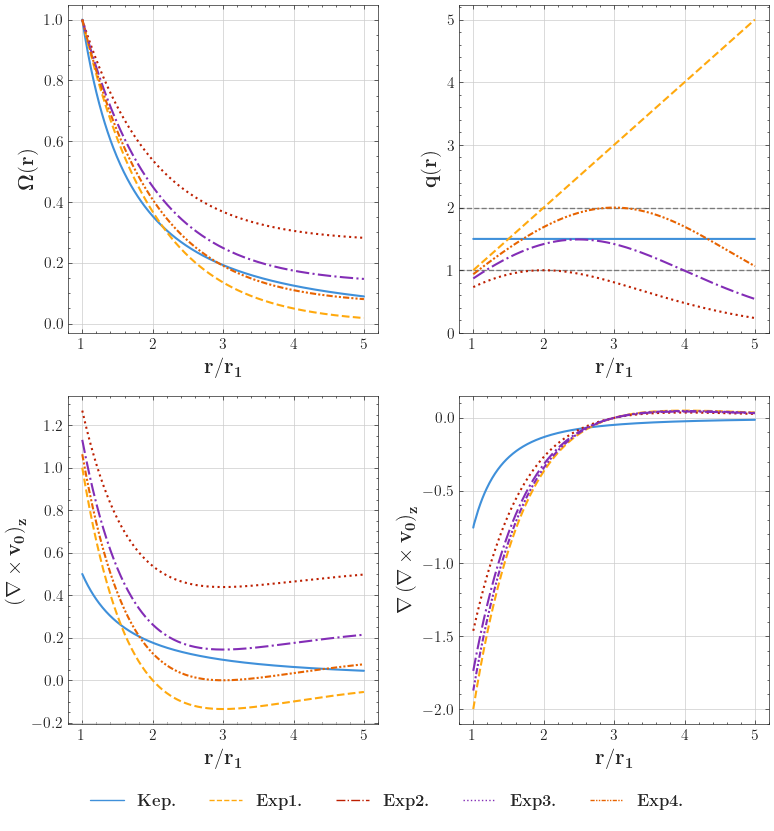

In [199]:
from matplotlib.lines import Line2D
fig, axes = plt.subplots(2,2, figsize=(8, 8))

axes[0,0].plot(r, W_kep(r), label = 'Kep.', color = color_arr[0], linewidth = 1.5)
axes[0,0].plot(r, W_exp1(r), label = 'Exp1', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,0].plot(r, W_exp2(r), label = 'Exp2', color = color_arr[2], linestyle = ':', linewidth = 1.5)
axes[0,0].plot(r, W_exp3(r), label = 'Exp3', color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[0,0].plot(r, W_exp4(r), label = 'Exp4', color = color_arr[6], linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth = 1.5)
axes[0,0].set_ylabel(r'$\mathbf{\Omega(r)}$', fontsize = 15)

axes[0,1].axhline(y = 1, linestyle = '--', color = 'k', alpha = 0.5)
axes[0,1].axhline(y = 2, linestyle = '--', color = 'k', alpha = 0.5)
axes[0,1].plot(r, -r*Wp_kep(r)/W_kep(r), label = 'Kep.', color = color_arr[0], linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp1(r)/W_exp1(r), label = 'Exp1', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp2(r)/W_exp2(r), label = 'Exp2', color = color_arr[2], linestyle = ':', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp3(r)/W_exp3(r), label = 'Exp3', color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp4(r)/W_exp4(r), label = 'Exp4', color = color_arr[6], linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth = 1.5)
axes[0,1].set_ylabel(r'$\mathbf{q(r)}$', fontsize = 15)


axes[1,0].plot(r, 1/r*(2*r*W_kep(r) + r**2*Wp_kep(r)), label = 'Kep.', color = color_arr[0], linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp1(r) + r**2*Wp_exp1(r)), label = 'Exp1', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp2(r) + r**2*Wp_exp2(r)), label = 'Exp2', color = color_arr[2], linestyle = ':', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp3(r) + r**2*Wp_exp3(r)), label = 'Exp3', color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp4(r) + r**2*Wp_exp4(r)), label = 'Exp4', color = color_arr[6], linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth = 1.5)
axes[1,0].set_ylabel(r'$\mathbf{\left(\nabla \times v_0\right)_z}$', fontsize = 15)


axes[1,1].plot(r, -1/r**2*(2*r*W_kep(r) + r**2*Wp_kep(r)) + 1/r*(2*W_kep(r) + 4*r*Wp_kep(r) + r**2*Wpp_kep(r)), label = 'Kep.', color = color_arr[0], linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp1(r) + r**2*Wp_exp1(r)) + 1/r*(2*W_exp1(r) + 4*r*Wp_exp1(r) + r**2*Wpp_exp1(r)), label = 'Exp1', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp2(r) + r**2*Wp_exp2(r)) + 1/r*(2*W_exp2(r) + 4*r*Wp_exp2(r) + r**2*Wpp_exp2(r)), label = 'Exp2', color = color_arr[2], linestyle = ':', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp3(r) + r**2*Wp_exp3(r)) + 1/r*(2*W_exp3(r) + 4*r*Wp_exp3(r) + r**2*Wpp_exp3(r)), label = 'Exp3', color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp4(r) + r**2*Wp_exp4(r)) + 1/r*(2*W_exp4(r) + 4*r*Wp_exp4(r) + r**2*Wpp_exp4(r)), label = 'exp4', color = color_arr[4], linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth = 1.5)
axes[1,1].set_ylabel(r'$\mathbf{\nabla \left(\nabla \times v_0\right)_z}$', fontsize = 15)

axes[0,0].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 15)
axes[0,1].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 15)
axes[1,0].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 15)
axes[1,1].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 15)

line1 = Line2D([0], [0], color=color_arr[0], linestyle='-')
line2 = Line2D([0], [0], color=color_arr[1], linestyle='--')
line3 = Line2D([0], [0], color=color_arr[2], linestyle='-.')
line4 = Line2D([0], [0], color=color_arr[4], linestyle=':')
line5 = Line2D([0], [0], color=color_arr[6], linestyle=(0, (3, 1, 1, 1, 1, 1)))

lines = [line1, line2, line3, line4, line5]
labels = [r'\textbf{Kep.}', r'\textbf{Exp1.}', r'\textbf{Exp2.}', r'\textbf{Exp3.}', r'\textbf{Exp4.}']
fig.legend(lines, labels, loc='lower center', ncol=5, 
           bbox_to_anchor=(0.5, -0.07),  # Position the legend below the plot
           frameon=False,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)

plt.tight_layout()
plt.savefig(f'Vorticity/Exponential-Configuration.pdf')
plt.show()


#### Reorient for legibility

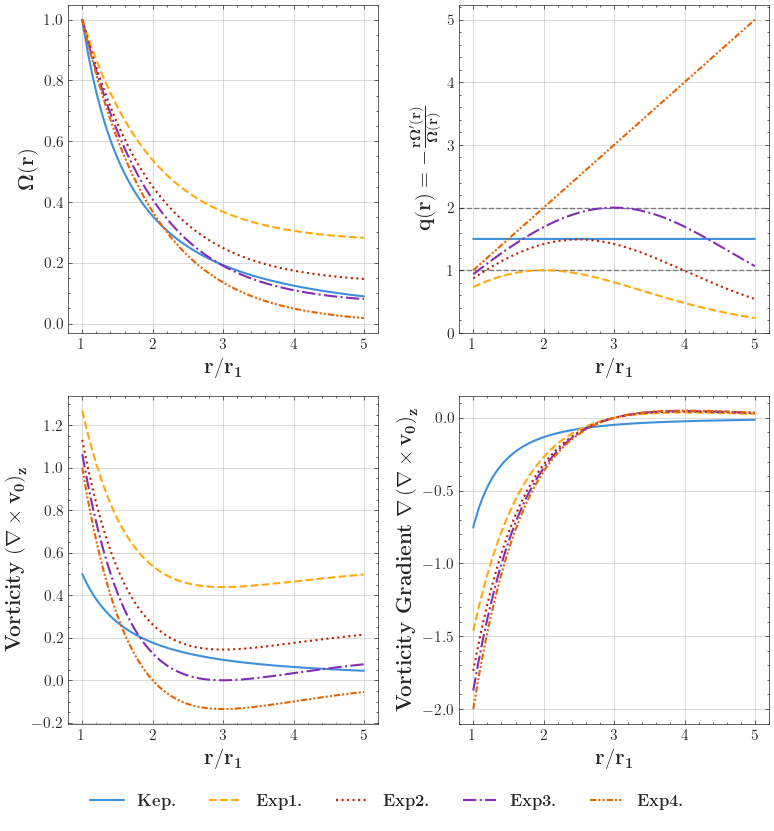

In [200]:
from matplotlib.lines import Line2D
fig, axes = plt.subplots(2,2, figsize=(8, 8))

# a = 1
# W_exp1 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))

# ### Exp4 Profile (Minimal R ratio)
# a = 0.73123123
# W_exp2 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))

# ### Exp5 Profile (Kep. R Ratio)
# a = 0.8689352412721272
# W_exp3 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))

# ### q(r) = 2
# a = 0.9366210025563255
# W_exp4 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))

axes[0,0].plot(r, W_kep(r), label = 'Kep.', color = color_arr[0], linewidth = 1.5)
axes[0,0].plot(r, W_exp2(r), label = 'Exp1', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,0].plot(r, W_exp3(r), label = 'Exp2', color = color_arr[2], linestyle = ':', linewidth = 1.5)
axes[0,0].plot(r, W_exp4(r), label = 'Exp3', color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[0,0].plot(r, W_exp1(r), label = 'Exp4', color = color_arr[6], linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth = 1.5)
axes[0,0].set_ylabel(r'$\mathbf{\Omega(r)}$', fontsize = 15)

axes[0,1].axhline(y = 1, linestyle = '--', color = 'k', alpha = 0.5)
axes[0,1].axhline(y = 2, linestyle = '--', color = 'k', alpha = 0.5)
axes[0,1].plot(r, -r*Wp_kep(r)/W_kep(r), label = 'Kep.', color = color_arr[0], linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp2(r)/W_exp2(r), label = 'Exp2', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp3(r)/W_exp3(r), label = 'Exp3', color = color_arr[2], linestyle = ':', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp4(r)/W_exp4(r), label = 'Exp4', color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp1(r)/W_exp1(r), label = 'Exp1', color = color_arr[6], linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth = 1.5)
axes[0,1].set_ylabel(r"$\mathbf{q(r) = -\frac{r\Omega'(r)}{\Omega(r)}}$", fontsize = 15)


axes[1,0].plot(r, 1/r*(2*r*W_kep(r) + r**2*Wp_kep(r)), label = 'Kep.', color = color_arr[0], linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp2(r) + r**2*Wp_exp2(r)), label = 'Exp2', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp3(r) + r**2*Wp_exp3(r)), label = 'Exp3', color = color_arr[2], linestyle = ':', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp4(r) + r**2*Wp_exp4(r)), label = 'Exp4', color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp1(r) + r**2*Wp_exp1(r)), label = 'Exp1', color = color_arr[6], linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth = 1.5)
axes[1,0].set_ylabel(r'\textbf{Vorticity} $\mathbf{\left(\nabla \times v_0\right)_z}$', fontsize = 15)


axes[1,1].plot(r, -1/r**2*(2*r*W_kep(r) + r**2*Wp_kep(r)) + 1/r*(2*W_kep(r) + 4*r*Wp_kep(r) + r**2*Wpp_kep(r)), label = 'Kep.', color = color_arr[0], linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp2(r) + r**2*Wp_exp2(r)) + 1/r*(2*W_exp2(r) + 4*r*Wp_exp2(r) + r**2*Wpp_exp2(r)), label = 'Exp2', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp3(r) + r**2*Wp_exp3(r)) + 1/r*(2*W_exp3(r) + 4*r*Wp_exp3(r) + r**2*Wpp_exp3(r)), label = 'Exp3', color = color_arr[2], linestyle = ':', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp4(r) + r**2*Wp_exp4(r)) + 1/r*(2*W_exp4(r) + 4*r*Wp_exp4(r) + r**2*Wpp_exp4(r)), label = 'Exp4', color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp1(r) + r**2*Wp_exp1(r)) + 1/r*(2*W_exp1(r) + 4*r*Wp_exp1(r) + r**2*Wpp_exp1(r)), label = 'Exp1', color = color_arr[6], linestyle = (0, (3, 1, 1, 1, 1, 1)), linewidth = 1.5)
axes[1,1].set_ylabel(r'\textbf{Vorticity Gradient} $\mathbf{\nabla \left(\nabla \times v_0\right)_z}$', fontsize = 15)

axes[0,0].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 15)
axes[0,1].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 15)
axes[1,0].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 15)
axes[1,1].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 15)

line1 = Line2D([0], [0], color=color_arr[0], linestyle='-', linewidth = 1.5)
line2 = Line2D([0], [0], color=color_arr[1], linestyle='--', linewidth = 1.5)
line3 = Line2D([0], [0], color=color_arr[2], linestyle=':', linewidth = 1.5)
line4 = Line2D([0], [0], color=color_arr[4], linestyle='-.', linewidth = 1.5)
line5 = Line2D([0], [0], color=color_arr[6], linestyle=(0, (3, 1, 1, 1, 1, 1)), linewidth = 1.5)

lines = [line1, line2, line3, line4, line5]
labels = [r'\textbf{Kep.}', r'\textbf{Exp1.}', r'\textbf{Exp2.}', r'\textbf{Exp3.}', r'\textbf{Exp4.}']
fig.legend(lines, labels, loc='lower center', ncol=5, 
           bbox_to_anchor=(0.5, -0.07),  # Position the legend below the plot
           frameon=False,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)

plt.tight_layout()
plt.savefig(f'Vorticity/Exponential-Configuration.pdf')
plt.show()

#### Removing Hydrnodynamic

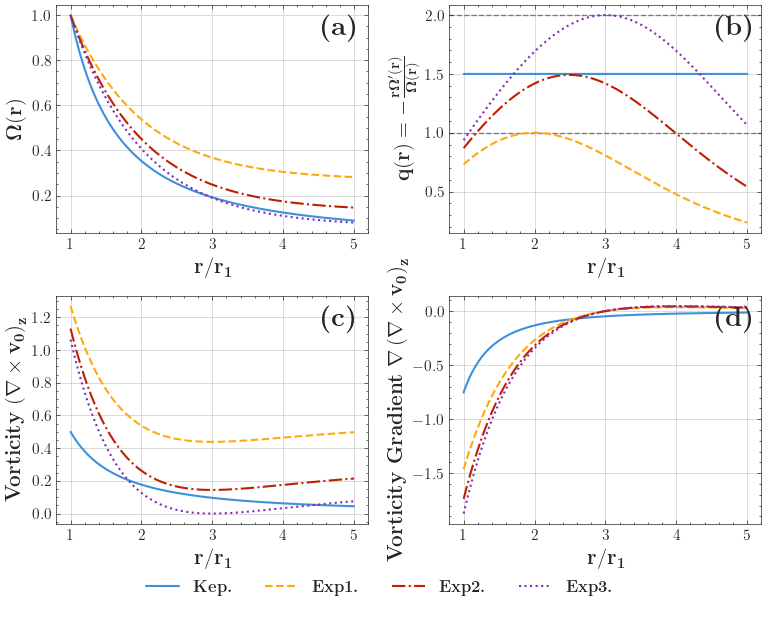

In [201]:
from matplotlib.lines import Line2D
fig, axes = plt.subplots(2,2, figsize=(8, 6))

# a = 1
# W_exp1 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))

# ### Exp4 Profile (Minimal R ratio)
# a = 0.73123123
# W_exp2 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))

# ### Exp5 Profile (Kep. R Ratio)
# a = 0.8689352412721272
# W_exp3 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))

# ### q(r) = 2
# a = 0.9366210025563255
# W_exp4 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))

axes[0,0].plot(r, W_kep(r), label = 'Kep.', color = color_arr[0], linewidth = 1.5)
axes[0,0].plot(r, W_exp2(r), label = 'Exp1', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,0].plot(r, W_exp3(r), label = 'Exp2', color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[0,0].plot(r, W_exp4(r), label = 'Exp3', color = color_arr[4], linestyle = ':', linewidth = 1.5)
# axes[0,0].plot(r, W_exp1(r), label = 'Exp4', color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[0,0].set_ylabel(r'$\mathbf{\Omega(r)}$', fontsize = 15)

axes[0,1].axhline(y = 1, linestyle = '--', color = 'k', alpha = 0.5)
axes[0,1].axhline(y = 2, linestyle = '--', color = 'k', alpha = 0.5)
axes[0,1].plot(r, -r*Wp_kep(r)/W_kep(r), label = 'Kep.', color = color_arr[0], linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp2(r)/W_exp2(r), label = 'Exp2', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp3(r)/W_exp3(r), label = 'Exp3', color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp4(r)/W_exp4(r), label = 'Exp4', color = color_arr[4], linestyle = ':', linewidth = 1.5)
# axes[0,1].plot(r, -r*Wp_exp1(r)/W_exp1(r), label = 'Exp1', color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[0,1].set_ylabel(r"$\mathbf{q(r) = -\frac{r\Omega'(r)}{\Omega(r)}}$", fontsize = 15)


axes[1,0].plot(r, 1/r*(2*r*W_kep(r) + r**2*Wp_kep(r)), label = 'Kep.', color = color_arr[0], linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp2(r) + r**2*Wp_exp2(r)), label = 'Exp2', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp3(r) + r**2*Wp_exp3(r)), label = 'Exp3', color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp4(r) + r**2*Wp_exp4(r)), label = 'Exp4', color = color_arr[4], linestyle = ':', linewidth = 1.5)
# axes[1,0].plot(r, 1/r*(2*r*W_exp1(r) + r**2*Wp_exp1(r)), label = 'Exp1', color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[1,0].set_ylabel(r'\textbf{Vorticity} $\mathbf{\left(\nabla \times v_0\right)_z}$', fontsize = 15)


axes[1,1].plot(r, -1/r**2*(2*r*W_kep(r) + r**2*Wp_kep(r)) + 1/r*(2*W_kep(r) + 4*r*Wp_kep(r) + r**2*Wpp_kep(r)), label = 'Kep.', color = color_arr[0], linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp2(r) + r**2*Wp_exp2(r)) + 1/r*(2*W_exp2(r) + 4*r*Wp_exp2(r) + r**2*Wpp_exp2(r)), label = 'Exp2', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp3(r) + r**2*Wp_exp3(r)) + 1/r*(2*W_exp3(r) + 4*r*Wp_exp3(r) + r**2*Wpp_exp3(r)), label = 'Exp3', color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp4(r) + r**2*Wp_exp4(r)) + 1/r*(2*W_exp4(r) + 4*r*Wp_exp4(r) + r**2*Wpp_exp4(r)), label = 'Exp4', color = color_arr[4], linestyle = ':', linewidth = 1.5)
# axes[1,1].plot(r, -1/r**2*(2*r*W_exp1(r) + r**2*Wp_exp1(r)) + 1/r*(2*W_exp1(r) + 4*r*Wp_exp1(r) + r**2*Wpp_exp1(r)), label = 'Exp1', color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[1,1].set_ylabel(r'\textbf{Vorticity Gradient} $\mathbf{\nabla \left(\nabla \times v_0\right)_z}$', fontsize = 15)

axes[0,0].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 15)
axes[0,1].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 15)
axes[1,0].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 15)
axes[1,1].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 15)

line1 = Line2D([0], [0], color=color_arr[0], linestyle='-', linewidth = 1.5)
line2 = Line2D([0], [0], color=color_arr[1], linestyle='--', linewidth = 1.5)
line3 = Line2D([0], [0], color=color_arr[2], linestyle='-.', linewidth = 1.5)
line4 = Line2D([0], [0], color=color_arr[4], linestyle=':', linewidth = 1.5)
# line5 = Line2D([0], [0], color=color_arr[6], linestyle=(0, (3, 1, 1, 1, 1, 1)), linewidth = 1.5)

axes[0,0].text(0.85, 0.96, r'\textbf{(a)}', transform=axes[0,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[0,1].text(0.85, 0.96, r'\textbf{(b)}', transform=axes[0,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[1,0].text(0.85, 0.96, r'\textbf{(c)}', transform=axes[1,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[1,1].text(0.85, 0.96, r'\textbf{(d)}', transform=axes[1,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')


lines = [line1, line2, line3, line4]
labels = [r'\textbf{Kep.}', r'\textbf{Exp1.}', r'\textbf{Exp2.}', r'\textbf{Exp3.}']
fig.legend(lines, labels, loc='lower center', ncol=5, 
           bbox_to_anchor=(0.5, -0.07),  # Position the legend below the plot
           frameon=False,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)

plt.tight_layout()
plt.savefig(f'Vorticity/Exponential-Configuration.pdf')
plt.show()

### Larger Text

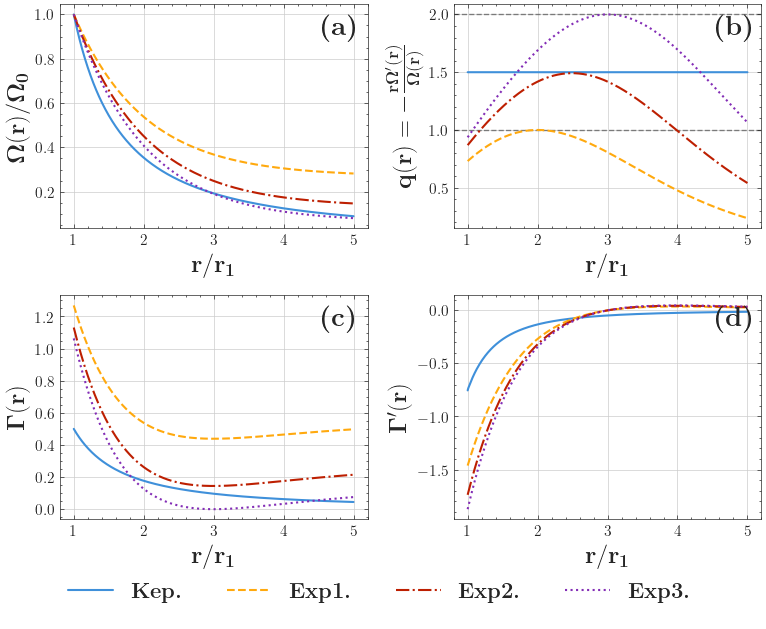

In [202]:
from matplotlib.lines import Line2D
fig, axes = plt.subplots(2,2, figsize=(8, 6))

# a = 1
# W_exp1 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))

# ### Exp4 Profile (Minimal R ratio)
# a = 0.73123123
# W_exp2 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))

# ### Exp5 Profile (Kep. R Ratio)
# a = 0.8689352412721272
# W_exp3 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))

# ### q(r) = 2
# a = 0.9366210025563255
# W_exp4 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))

axes[0,0].plot(r, W_kep(r), label = 'Kep.', color = color_arr[0], linewidth = 1.5)
axes[0,0].plot(r, W_exp2(r), label = 'Exp1', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,0].plot(r, W_exp3(r), label = 'Exp2', color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[0,0].plot(r, W_exp4(r), label = 'Exp3', color = color_arr[4], linestyle = ':', linewidth = 1.5)
# axes[0,0].plot(r, W_exp1(r), label = 'Exp4', color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[0,0].set_ylabel(r'$\mathbf{\Omega(r)/\Omega_0}$', fontsize = 18)

axes[0,1].axhline(y = 1, linestyle = '--', color = 'k', alpha = 0.5)
axes[0,1].axhline(y = 2, linestyle = '--', color = 'k', alpha = 0.5)
axes[0,1].plot(r, -r*Wp_kep(r)/W_kep(r), label = 'Kep.', color = color_arr[0], linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp2(r)/W_exp2(r), label = 'Exp2', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp3(r)/W_exp3(r), label = 'Exp3', color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp4(r)/W_exp4(r), label = 'Exp4', color = color_arr[4], linestyle = ':', linewidth = 1.5)
# axes[0,1].plot(r, -r*Wp_exp1(r)/W_exp1(r), label = 'Exp1', color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[0,1].set_ylabel(r"$\mathbf{q(r) = -\frac{r\Omega'(r)}{\Omega(r)}}$", fontsize = 18)


axes[1,0].plot(r, 1/r*(2*r*W_kep(r) + r**2*Wp_kep(r)), label = 'Kep.', color = color_arr[0], linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp2(r) + r**2*Wp_exp2(r)), label = 'Exp2', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp3(r) + r**2*Wp_exp3(r)), label = 'Exp3', color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp4(r) + r**2*Wp_exp4(r)), label = 'Exp4', color = color_arr[4], linestyle = ':', linewidth = 1.5)
# axes[1,0].plot(r, 1/r*(2*r*W_exp1(r) + r**2*Wp_exp1(r)), label = 'Exp1', color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[1,0].set_ylabel(r'$\mathbf{\Gamma(r)}$', fontsize = 18)


axes[1,1].plot(r, -1/r**2*(2*r*W_kep(r) + r**2*Wp_kep(r)) + 1/r*(2*W_kep(r) + 4*r*Wp_kep(r) + r**2*Wpp_kep(r)), label = 'Kep.', color = color_arr[0], linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp2(r) + r**2*Wp_exp2(r)) + 1/r*(2*W_exp2(r) + 4*r*Wp_exp2(r) + r**2*Wpp_exp2(r)), label = 'Exp2', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp3(r) + r**2*Wp_exp3(r)) + 1/r*(2*W_exp3(r) + 4*r*Wp_exp3(r) + r**2*Wpp_exp3(r)), label = 'Exp3', color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp4(r) + r**2*Wp_exp4(r)) + 1/r*(2*W_exp4(r) + 4*r*Wp_exp4(r) + r**2*Wpp_exp4(r)), label = 'Exp4', color = color_arr[4], linestyle = ':', linewidth = 1.5)
# axes[1,1].plot(r, -1/r**2*(2*r*W_exp1(r) + r**2*Wp_exp1(r)) + 1/r*(2*W_exp1(r) + 4*r*Wp_exp1(r) + r**2*Wpp_exp1(r)), label = 'Exp1', color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[1,1].set_ylabel(r"$\mathbf{\Gamma'(r)}$", fontsize = 18)

axes[0,0].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)
axes[0,1].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)
axes[1,0].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)
axes[1,1].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)

line1 = Line2D([0], [0], color=color_arr[0], linestyle='-', linewidth = 1.5)
line2 = Line2D([0], [0], color=color_arr[1], linestyle='--', linewidth = 1.5)
line3 = Line2D([0], [0], color=color_arr[2], linestyle='-.', linewidth = 1.5)
line4 = Line2D([0], [0], color=color_arr[4], linestyle=':', linewidth = 1.5)
# line5 = Line2D([0], [0], color=color_arr[6], linestyle=(0, (3, 1, 1, 1, 1, 1)), linewidth = 1.5)

axes[0,0].text(0.85, 0.96, r'\textbf{(a)}', transform=axes[0,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[0,1].text(0.85, 0.96, r'\textbf{(b)}', transform=axes[0,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[1,0].text(0.85, 0.96, r'\textbf{(c)}', transform=axes[1,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[1,1].text(0.85, 0.96, r'\textbf{(d)}', transform=axes[1,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')


lines = [line1, line2, line3, line4]
labels = [r'\textbf{Kep.}', r'\textbf{Exp1.}', r'\textbf{Exp2.}', r'\textbf{Exp3.}']
fig.legend(lines, labels, loc='lower center', ncol=5, 
           bbox_to_anchor=(0.5, -0.1),  # Position the legend below the plot
           frameon=False,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 16)

plt.tight_layout()
plt.savefig(f'Vorticity/Exponential-Configuration.pdf')
plt.show()

## Only MHD perturbations

In [203]:
dV = 0.01/2
VA_N_arr_up = np.arange(0.2,.5,dV)
VA_N_arr_up = np.arange(0.2,.2+dV,dV)
print(len(VA_N_arr_up))
da = 0.01/20
ai_arr = np.linspace(0.73123123, 1, 100000)
R_arr = np.zeros(len(ai_arr))
q_r = []
for j in range(0, len(ai_arr)):
        ai = ai_arr[j]
        W_exp= ai*np.exp(1-r) + 1-ai
        Wp_exp = -ai*np.exp(1-r)
        Wpp_exp = ai*np.exp(1-r)
        v = 1/r*(2*r*W_exp + r**2*Wp_exp)
        vp = -1/r**2*(2*r*W_exp + r**2*Wp_exp) + 1/r*(2*W_exp + 4*r*Wp_exp + r**2*Wpp_exp)
        R_exp = np.average(vp)/np.average(v)
        R_arr[j] = R_exp
        q_r.append(-r*Wp_exp/W_exp)
        

2


In [204]:
tol = 1E-5
# print(np.where(np.abs(R_arr - -0.8264580361685311) < tol))

# plt.figure()
# plt.plot(ai_arr, R_arr)
# plt.show()

## Find which ai_arr value has max q(r) == 2:
for j in range(0, len(ai_arr)):
    # print(np.max(q_r[j]))
    if(np.abs(np.max((q_r[j]))-2) < tol):
        ii_qr2 = j
        print(j)
        break
    
print(ai_arr[ii_qr2])



76418
0.9366210025563255


In [205]:
tol = 1E-5

#### Slightly Higher than MHD perturbations
for j in range(0, len(ai_arr)):
    # print(np.max(q_r[j]))
    if(np.abs(np.max((q_r[j]))-2.1) < tol):
        ii_qr2 = j
        print(j)
        break
    
print(ai_arr[ii_qr2])

0.9366210025563255


In [206]:
tol = 1E-5

#### Slightly Higher than MHD perturbations
for j in range(0, len(ai_arr)):
    # print(np.max(q_r[j]))
    if(np.abs(np.max((q_r[j]))-2.01) < tol):
        ii_qr2 = j
        print(j)
        break
    
print(ai_arr[ii_qr2])

76747
0.9375052606522065


In [207]:
tol = 1E-5

#### Slightly Higher than MHD perturbations
for j in range(0, len(ai_arr)):
    # print(np.max(q_r[j]))
    if(np.abs(np.max((q_r[j]))-2.05) < tol):
        ii_qr2 = j
        print(j)
        break
    
print(ai_arr[ii_qr2])

78015
0.9409132827360274


## Growth Rates

### MCI 

In [208]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

gr_1k1_MCI_l_Bz_Kep = []
gr_1k1_MCI_h_Bz_Kep = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_Bz_Kep.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_Kep.append(guesses_1k1_MCI_h[j].imag)    

freq_1k1_MCI_l_Bz_Kep = []
freq_1k1_MCI_h_Bz_Kep = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_Bz_Kep.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    freq_1k1_MCI_h_Bz_Kep.append(guesses_1k1_MCI_h[j].real)    
    
with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_Kep = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_Kep = pickle.load(f)  

In [209]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-Exp1-5r1-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-Exp1-5r1-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-Exp1-5r1-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-Exp1-5r1-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

gr_1k1_MCI_l_Bz_Exp1 = []
gr_1k1_MCI_h_Bz_Exp1 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_Bz_Exp1.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_Exp1.append(guesses_1k1_MCI_h[j].imag)    

freq_1k1_MCI_l_Bz_Exp1 = []
freq_1k1_MCI_h_Bz_Exp1 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_Bz_Exp1.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    freq_1k1_MCI_h_Bz_Exp1.append(guesses_1k1_MCI_h[j].real)    
    
with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_Exp1 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_Exp1 = pickle.load(f)  

In [210]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-Exp4-5r1-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-Exp4-5r1-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-Exp4-5r1-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-Exp4-5r1-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

gr_1k1_MCI_l_Bz_Exp4 = []
gr_1k1_MCI_h_Bz_Exp4 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_Bz_Exp4.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_Exp4.append(guesses_1k1_MCI_h[j].imag)    

freq_1k1_MCI_l_Bz_Exp4 = []
freq_1k1_MCI_h_Bz_Exp4 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_Bz_Exp4.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    freq_1k1_MCI_h_Bz_Exp4.append(guesses_1k1_MCI_h[j].real)    
    
with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_Exp4 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_Exp4 = pickle.load(f)  

In [211]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-Exp5-5r1-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-Exp5-5r1-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-Exp5-5r1-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-Exp5-5r1-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

gr_1k1_MCI_l_Bz_Exp5 = []
gr_1k1_MCI_h_Bz_Exp5 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_Bz_Exp5.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_Exp5.append(guesses_1k1_MCI_h[j].imag)    

freq_1k1_MCI_l_Bz_Exp5 = []
freq_1k1_MCI_h_Bz_Exp5 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_Bz_Exp5.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    freq_1k1_MCI_h_Bz_Exp5.append(guesses_1k1_MCI_h[j].real)    
    
with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_Exp5 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_Exp5 = pickle.load(f)  

In [212]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-Exp6-5r1-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-Exp6-5r1-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-Exp6-5r1-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-Exp6-5r1-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

gr_1k1_MCI_l_Bz_Exp6 = []
gr_1k1_MCI_h_Bz_Exp6 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_Bz_Exp6.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_Exp6.append(guesses_1k1_MCI_h[j].imag)    

freq_1k1_MCI_l_Bz_Exp6 = []
freq_1k1_MCI_h_Bz_Exp6 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_Bz_Exp6.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    freq_1k1_MCI_h_Bz_Exp6.append(guesses_1k1_MCI_h[j].real)    
    
with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_Exp6 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_Exp6 = pickle.load(f)  

### MRI

In [213]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_guessesu_' + elecd_str + '-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_guessesd_' + elecd_str + '-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_VANUP_' + elecd_str + '-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_VANDOWN_' + elecd_str + '-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MRI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MRI_h = pickle.load(f)    

gr_1k1_MRI_l_Bz_Kep = []
gr_1k1_MRI_h_Bz_Kep = []
for j in range(0,len(guesses_1k1_MRI_l) ):
    gr_1k1_MRI_l_Bz_Kep.append(guesses_1k1_MRI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MRI_h) ):
    gr_1k1_MRI_h_Bz_Kep.append(guesses_1k1_MRI_h[j].imag)    

freq_1k1_MRI_l_Bz_Kep = []
freq_1k1_MRI_h_Bz_Kep = []
for j in range(0,len(guesses_1k1_MRI_l) ):
    freq_1k1_MRI_l_Bz_Kep.append(guesses_1k1_MRI_l[j].real)
    
for j in range(0,len(guesses_1k1_MRI_h) ):
    freq_1k1_MRI_h_Bz_Kep.append(guesses_1k1_MRI_h[j].real)    
    
with open(VA_d, 'rb') as f:
    VA_l_MRI1_Bz_Kep = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MRI1_Bz_Kep = pickle.load(f)  

In [214]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_guessesu_' + elecd_str + '-Exp1-5r1-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_guessesd_' + elecd_str + '-Exp1-5r1-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_VANUP_' + elecd_str + '-Exp1-5r1-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_VANDOWN_' + elecd_str + '-Exp1-5r1-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MRI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MRI_h = pickle.load(f)    

gr_1k1_MRI_l_Bz_Exp1 = []
gr_1k1_MRI_h_Bz_Exp1 = []
for j in range(0,len(guesses_1k1_MRI_l) ):
    gr_1k1_MRI_l_Bz_Exp1.append(guesses_1k1_MRI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MRI_h) ):
    gr_1k1_MRI_h_Bz_Exp1.append(guesses_1k1_MRI_h[j].imag)    

freq_1k1_MRI_l_Bz_Exp1 = []
freq_1k1_MRI_h_Bz_Exp1 = []
for j in range(0,len(guesses_1k1_MRI_l) ):
    freq_1k1_MRI_l_Bz_Exp1.append(guesses_1k1_MRI_l[j].real)
    
for j in range(0,len(guesses_1k1_MRI_h) ):
    freq_1k1_MRI_h_Bz_Exp1.append(guesses_1k1_MRI_h[j].real)    
    
with open(VA_d, 'rb') as f:
    VA_l_MRI1_Bz_Exp1 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MRI1_Bz_Exp1 = pickle.load(f)  

In [215]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_guessesu_' + elecd_str + '-Exp4-5r1-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_guessesd_' + elecd_str + '-Exp4-5r1-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_VANUP_' + elecd_str + '-Exp4-5r1-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_VANDOWN_' + elecd_str + '-Exp4-5r1-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MRI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MRI_h = pickle.load(f)    

gr_1k1_MRI_l_Bz_Exp4 = []
gr_1k1_MRI_h_Bz_Exp4 = []
for j in range(0,len(guesses_1k1_MRI_l) ):
    gr_1k1_MRI_l_Bz_Exp4.append(guesses_1k1_MRI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MRI_h) ):
    gr_1k1_MRI_h_Bz_Exp4.append(guesses_1k1_MRI_h[j].imag)    

freq_1k1_MRI_l_Bz_Exp4 = []
freq_1k1_MRI_h_Bz_Exp4 = []
for j in range(0,len(guesses_1k1_MRI_l) ):
    freq_1k1_MRI_l_Bz_Exp4.append(guesses_1k1_MRI_l[j].real)
    
for j in range(0,len(guesses_1k1_MRI_h) ):
    freq_1k1_MRI_h_Bz_Exp4.append(guesses_1k1_MRI_h[j].real)    
    
with open(VA_d, 'rb') as f:
    VA_l_MRI1_Bz_Exp4 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MRI1_Bz_Exp4 = pickle.load(f)  

In [216]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_guessesu_' + elecd_str + '-Exp5-5r1-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_guessesd_' + elecd_str + '-Exp5-5r1-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_VANUP_' + elecd_str + '-Exp5-5r1-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_VANDOWN_' + elecd_str + '-Exp5-5r1-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MRI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MRI_h = pickle.load(f)    

gr_1k1_MRI_l_Bz_Exp5 = []
gr_1k1_MRI_h_Bz_Exp5 = []
for j in range(0,len(guesses_1k1_MRI_l) ):
    gr_1k1_MRI_l_Bz_Exp5.append(guesses_1k1_MRI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MRI_h) ):
    gr_1k1_MRI_h_Bz_Exp5.append(guesses_1k1_MRI_h[j].imag)    

freq_1k1_MRI_l_Bz_Exp5 = []
freq_1k1_MRI_h_Bz_Exp5 = []
for j in range(0,len(guesses_1k1_MRI_l) ):
    freq_1k1_MRI_l_Bz_Exp5.append(guesses_1k1_MRI_l[j].real)
    
for j in range(0,len(guesses_1k1_MRI_h) ):
    freq_1k1_MRI_h_Bz_Exp5.append(guesses_1k1_MRI_h[j].real)    
    
with open(VA_d, 'rb') as f:
    VA_l_MRI1_Bz_Exp5 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MRI1_Bz_Exp5 = pickle.load(f)  

In [217]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_guessesu_' + elecd_str + '-Exp6-5r1-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_guessesd_' + elecd_str + '-Exp6-5r1-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_VANUP_' + elecd_str + '-Exp6-5r1-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MRI_1k1_VANDOWN_' + elecd_str + '-Exp6-5r1-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MRI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MRI_h = pickle.load(f)    

gr_1k1_MRI_l_Bz_Exp6 = []
gr_1k1_MRI_h_Bz_Exp6 = []
for j in range(0,len(guesses_1k1_MRI_l) ):
    gr_1k1_MRI_l_Bz_Exp6.append(guesses_1k1_MRI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MRI_h) ):
    gr_1k1_MRI_h_Bz_Exp6.append(guesses_1k1_MRI_h[j].imag)    

freq_1k1_MRI_l_Bz_Exp6 = []
freq_1k1_MRI_h_Bz_Exp6 = []
for j in range(0,len(guesses_1k1_MRI_l) ):
    freq_1k1_MRI_l_Bz_Exp6.append(guesses_1k1_MRI_l[j].real)
    
for j in range(0,len(guesses_1k1_MRI_h) ):
    freq_1k1_MRI_h_Bz_Exp6.append(guesses_1k1_MRI_h[j].real)    
    
with open(VA_d, 'rb') as f:
    VA_l_MRI1_Bz_Exp6 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MRI1_Bz_Exp6 = pickle.load(f)  

### Plotting

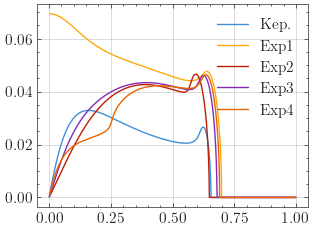

In [218]:
plt.figure()
plt.plot(VA_l_MCI1_Bz_Kep, gr_1k1_MCI_l_Bz_Kep, color = color_arr[0], label = 'Kep.')
plt.plot(VA_h_MCI1_Bz_Kep, gr_1k1_MCI_h_Bz_Kep, color = color_arr[0])
plt.plot(VA_l_MCI1_Bz_Exp1, gr_1k1_MCI_l_Bz_Exp1, color = color_arr[1], label = 'Exp1')
plt.plot(VA_h_MCI1_Bz_Exp1, gr_1k1_MCI_h_Bz_Exp1, color = color_arr[1])
plt.plot(VA_l_MCI1_Bz_Exp4, gr_1k1_MCI_l_Bz_Exp4, color = color_arr[2], label = 'Exp2')
plt.plot(VA_h_MCI1_Bz_Exp4, gr_1k1_MCI_h_Bz_Exp4, color = color_arr[2])
plt.plot(VA_l_MCI1_Bz_Exp5, gr_1k1_MCI_l_Bz_Exp5, color = color_arr[4], label = 'Exp3')
plt.plot(VA_h_MCI1_Bz_Exp5, gr_1k1_MCI_h_Bz_Exp5, color = color_arr[4])
plt.plot(VA_l_MCI1_Bz_Exp6, gr_1k1_MCI_l_Bz_Exp6, color = color_arr[6], label = 'Exp4')
plt.plot(VA_h_MCI1_Bz_Exp6, gr_1k1_MCI_h_Bz_Exp6, color = color_arr[6])
plt.legend()
plt.show()

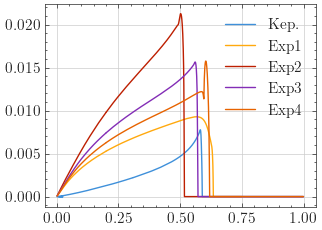

In [219]:
plt.figure()
plt.plot(VA_l_MRI1_Bz_Kep, gr_1k1_MRI_l_Bz_Kep, color = color_arr[0], label = 'Kep.')
plt.plot(VA_h_MRI1_Bz_Kep, gr_1k1_MRI_h_Bz_Kep, color = color_arr[0])
plt.plot(VA_l_MRI1_Bz_Exp1, gr_1k1_MRI_l_Bz_Exp1, color = color_arr[1], label = 'Exp1')
plt.plot(VA_h_MRI1_Bz_Exp1, gr_1k1_MRI_h_Bz_Exp1, color = color_arr[1])
plt.plot(VA_l_MRI1_Bz_Exp4, gr_1k1_MRI_l_Bz_Exp4, color = color_arr[2], label = 'Exp2')
plt.plot(VA_h_MRI1_Bz_Exp4, gr_1k1_MRI_h_Bz_Exp4, color = color_arr[2])
plt.plot(VA_l_MRI1_Bz_Exp5, gr_1k1_MRI_l_Bz_Exp5, color = color_arr[4], label = 'Exp3')
plt.plot(VA_h_MRI1_Bz_Exp5, gr_1k1_MRI_h_Bz_Exp5, color = color_arr[4])
plt.plot(VA_l_MRI1_Bz_Exp6, gr_1k1_MRI_l_Bz_Exp6, color = color_arr[6], label = 'Exp4')
plt.plot(VA_h_MRI1_Bz_Exp6, gr_1k1_MRI_h_Bz_Exp6, color = color_arr[6])
plt.legend()
plt.show()

### Only MHD

0.2
(0.8520441922513908+0.009803698115541127j)


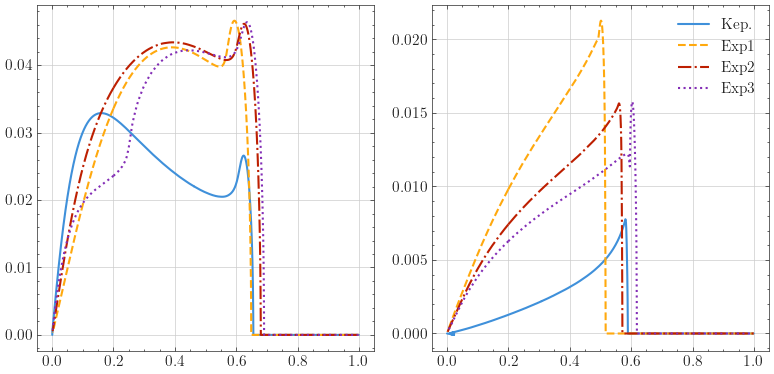

In [220]:
fig, axes = plt.subplots(1,2, figsize=(8, 4))

axes[0].plot(VA_l_MCI1_Bz_Kep, gr_1k1_MCI_l_Bz_Kep, color = color_arr[0], label = 'Kep.', linestyle = '-', linewidth = 1.5)
axes[0].plot(VA_h_MCI1_Bz_Kep, gr_1k1_MCI_h_Bz_Kep, color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[0].plot(VA_l_MCI1_Bz_Exp4, gr_1k1_MCI_l_Bz_Exp4, color = color_arr[1], label = 'Exp1', linestyle = '--', linewidth = 1.5)
axes[0].plot(VA_h_MCI1_Bz_Exp4, gr_1k1_MCI_h_Bz_Exp4, color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0].plot(VA_l_MCI1_Bz_Exp5, gr_1k1_MCI_l_Bz_Exp5, color = color_arr[2], label = 'Exp2', linestyle = '-.', linewidth = 1.5)
axes[0].plot(VA_h_MCI1_Bz_Exp5, gr_1k1_MCI_h_Bz_Exp5, color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[0].plot(VA_l_MCI1_Bz_Exp6, gr_1k1_MCI_l_Bz_Exp6, color = color_arr[4], label = 'Exp3', linestyle = ':', linewidth = 1.5)
axes[0].plot(VA_h_MCI1_Bz_Exp6, gr_1k1_MCI_h_Bz_Exp6, color = color_arr[4], linestyle = ':', linewidth = 1.5)

print(VA_l_MRI1_Bz_Exp4[0])
print(freq_1k1_MRI_l_Bz_Exp4[0] + 1j*gr_1k1_MRI_l_Bz_Exp4[0])

axes[1].plot(VA_l_MRI1_Bz_Kep, gr_1k1_MRI_l_Bz_Kep, color = color_arr[0], label = 'Kep.', linestyle = '-', linewidth = 1.5)
axes[1].plot(VA_h_MRI1_Bz_Kep, gr_1k1_MRI_h_Bz_Kep, color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[1].plot(VA_l_MRI1_Bz_Exp4, gr_1k1_MRI_l_Bz_Exp4, color = color_arr[1], label = 'Exp1', linestyle = '--', linewidth = 1.5)
axes[1].plot(VA_h_MRI1_Bz_Exp4, gr_1k1_MRI_h_Bz_Exp4, color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1].plot(VA_l_MRI1_Bz_Exp5, gr_1k1_MRI_l_Bz_Exp5, color = color_arr[2], label = 'Exp2', linestyle = '-.', linewidth = 1.5)
axes[1].plot(VA_h_MRI1_Bz_Exp5, gr_1k1_MRI_h_Bz_Exp5, color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[1].plot(VA_l_MRI1_Bz_Exp6, gr_1k1_MRI_l_Bz_Exp6, color = color_arr[4], label = 'Exp3', linestyle = ':', linewidth = 1.5)
axes[1].plot(VA_h_MRI1_Bz_Exp6, gr_1k1_MRI_h_Bz_Exp6, color = color_arr[4], linestyle = ':', linewidth = 1.5)

plt.legend()
plt.tight_layout()
plt.savefig(f'Vorticity/Exponential-Configuration-GRs.pdf')
plt.show()

In [221]:
## SET CONSTANTS
rho = (1.0*10**19) * (2.0*1.6725*10**(-27))
mu_0 = 1.2566*10**(-6)

# Define Normalizations
r1 = 0.1

## Define OMEGA0:
bb = 10000
v0 = bb/np.sqrt(r1)
Omega0 = v0/r1

In [222]:
# Get mode structure for MCI 1k1 (Kep.)
##### SET PARAMETERS #####
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

r1 = 0.1
q = 1/2
type = 'MRI'
elecd = 0
eta = elecd
Pm = 0
m = 1
kn = 1
kz = kn*np.pi/(4)
VA_N = 0.2
VA_N = 0.2
Bz = VA_N* (r1*Omega0*np.sqrt(rho*mu_0)*10000)
B0 = 0


r1 = 1
r2 = 5
r3 = 3.5
rp = np.linspace(0.1, r3, 50000)

r = np.linspace(r1, r2, 500)
q_mag = np.pi**2
q2r_sc = q_mag*1/r**2
q2rp_sc = q_mag*(-2/r**3)
q2rpp_sc = q_mag*(6/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))

ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)

reso = 5000
############## Kep
##### SET PARAMETERS #####
flow_type = 'Kep'

if(flow_type == 'Kep'):
    flow_select = True
elif(flow_type == 'Tanh'):
    flow_select = 'tanh'
elif(flow_type == 'Sat'):
    flow_select = 'saturated'
elif(flow_type == 'Sh2'):
    flow_select = 'Sh2'

guess = 0.4147649105837767+0.08031732034725135j
guess_MCI = guess

guess_MCI = freq_1k1_MCI_h_Bz_Kep[0] + 1j*gr_1k1_MCI_h_Bz_Kep[0]
guess = .3976006339398772+0.022029548424413667j

guess = (0.2084249386961671+0.0322068941491521j)

flow_select = 'exp4'
guess = 0.34979311853004014+0.03358030932533375j
flow_select = 'exp5'
guess = 0.25212447956059536+0.03663756993627491j
flow_select = 'exp6'
guess = 0.2464821210408343+0.02462031395934625j

guess_MCI = guess
VA_N_MCI = VA_N
# print(guess_MCI)
# guess = guess_MCI
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Kep_MCI = np.sqrt(y.t)
u_Kep_MCI = y.y[0]
r_vec_Kep_MCI = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)

1.2853447587668487e-06
      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: (0.2464821210454574+0.02462031394982381j)


In [223]:
# Get mode structure for MRI 1k1 (Kep.)
##### SET PARAMETERS #####
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

r1 = 0.1
q = 1/2
type = 'MRI'
elecd = 0
eta = elecd
Pm = 0
m = 1
kn = 1
kz = kn*np.pi/(4)
VA_N = VA_h_MRI1_Bz_Kep[0]
Bz = VA_N* (r1*Omega0*np.sqrt(rho*mu_0)*10000)
B0 = 0


r1 = 1
r2 = 5
r3 = 3.5
rp = np.linspace(0.1, r3, 50000)

r = np.linspace(r1, r2, 500)
q_mag = np.pi**2
q2r_sc = q_mag*1/r**2
q2rp_sc = q_mag*(-2/r**3)
q2rpp_sc = q_mag*(6/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))

ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)

reso = 5000
############## Kep
##### SET PARAMETERS #####
flow_type = 'Kep'

if(flow_type == 'Kep'):
    flow_select = True
elif(flow_type == 'Tanh'):
    flow_select = 'tanh'
elif(flow_type == 'Sat'):
    flow_select = 'saturated'
elif(flow_type == 'Sh2'):
    flow_select = 'Sh2'

guess = 0.6839585448597733+0.051674483224672614j
guess_MRI = guess

guess_MRI = freq_1k1_MRI_h_Bz_Kep[0] + 1j*gr_1k1_MRI_h_Bz_Kep[0]
guess = guess_MRI

flow_select = 'exp4'
guess =  (0.7706236649516456+0.013648910735230807j)
flow_select = 'exp6'
guess =  0.762357448866266+0.008156852287233934j
guess_MRI = guess
VA_N_MRI = VA_N
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Kep = np.sqrt(y.t)
u_Kep = y.y[0]
r_vec_Kep = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)

8.02256229505971e-05
      converged: True
           flag: converged
 function_calls: 4
     iterations: 3
           root: (0.7623574488662767+0.008156852287172016j)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C:\Users\Alex\AppData\Local\Temp\ipykernel_916040\3637681579.py:153: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


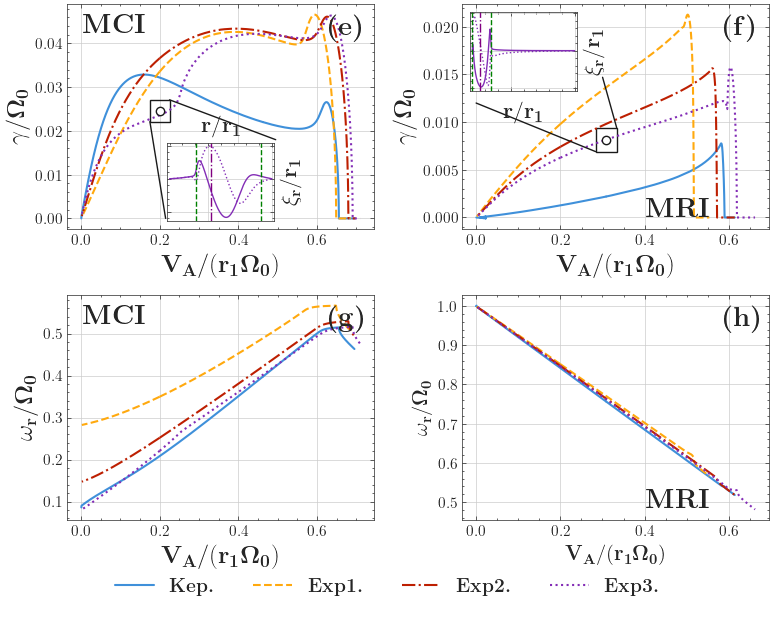

In [224]:
fig, axes = plt.subplots(2,2, figsize=(8, 6))

axes[0,0].plot(VA_l_MCI1_Bz_Kep, gr_1k1_MCI_l_Bz_Kep, color = color_arr[0], label = 'Kep.', linestyle = '-', linewidth = 1.5)
axes[0,0].plot(VA_h_MCI1_Bz_Kep[0:len(VA_l_MCI1_Bz_Kep)-475], gr_1k1_MCI_h_Bz_Kep[0:len(VA_l_MCI1_Bz_Kep)-475], color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[0,0].plot(VA_l_MCI1_Bz_Exp4, gr_1k1_MCI_l_Bz_Exp4, color = color_arr[1], label = 'Exp1', linestyle = '--', linewidth = 1.5)
axes[0,0].plot(VA_h_MCI1_Bz_Exp4[0:len(VA_h_MCI1_Bz_Exp4)-650], gr_1k1_MCI_h_Bz_Exp4[0:len(VA_h_MCI1_Bz_Exp4)-650], color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,0].plot(VA_l_MCI1_Bz_Exp5, gr_1k1_MCI_l_Bz_Exp5, color = color_arr[2], label = 'Exp2', linestyle = '-.', linewidth = 1.5)
axes[0,0].plot(VA_h_MCI1_Bz_Exp5[0:len(VA_h_MCI1_Bz_Exp5)-625], gr_1k1_MCI_h_Bz_Exp5[0:len(VA_h_MCI1_Bz_Exp5)-625], color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[0,0].plot(VA_l_MCI1_Bz_Exp6, gr_1k1_MCI_l_Bz_Exp6, color = color_arr[4], label = 'Exp3', linestyle = ':', linewidth = 1.5)
axes[0,0].plot(VA_h_MCI1_Bz_Exp6[0:len(VA_h_MCI1_Bz_Exp6)-600], gr_1k1_MCI_h_Bz_Exp6[0:len(VA_h_MCI1_Bz_Exp6)-600], color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[0,0].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 18)
axes[0,0].set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', fontsize = 18)
# axes[0,0].set_title(r'\textbf{MCI modes}', fontsize = 15)

axes[0,1].plot(VA_l_MRI1_Bz_Kep, gr_1k1_MRI_l_Bz_Kep, color = color_arr[0], label = 'Kep.', linestyle = '-', linewidth = 1.5)
axes[0,1].plot(VA_h_MRI1_Bz_Kep[0:len(VA_h_MRI1_Bz_Kep)-800], gr_1k1_MRI_h_Bz_Kep[0:len(VA_h_MRI1_Bz_Kep)-800], color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[0,1].plot(VA_l_MRI1_Bz_Exp4, gr_1k1_MRI_l_Bz_Exp4, color = color_arr[1], label = 'Exp1', linestyle = '--', linewidth = 1.5)
axes[0,1].plot(VA_h_MRI1_Bz_Exp4[0:len(VA_h_MRI1_Bz_Kep)-700], gr_1k1_MRI_h_Bz_Exp4[0:len(VA_h_MRI1_Bz_Kep)-700], color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,1].plot(VA_l_MRI1_Bz_Exp5, gr_1k1_MRI_l_Bz_Exp5, color = color_arr[2], label = 'Exp2', linestyle = '-.', linewidth = 1.5)
axes[0,1].plot(VA_h_MRI1_Bz_Exp5[0:len(VA_h_MRI1_Bz_Exp5)-800], gr_1k1_MRI_h_Bz_Exp5[0:len(VA_h_MRI1_Bz_Exp5)-800], color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[0,1].plot(VA_l_MRI1_Bz_Exp6, gr_1k1_MRI_l_Bz_Exp6, color = color_arr[4], label = 'Exp3', linestyle = ':', linewidth = 1.5)
axes[0,1].plot(VA_h_MRI1_Bz_Exp6[0:len(VA_h_MRI1_Bz_Exp5)-700], gr_1k1_MRI_h_Bz_Exp6[0:len(VA_h_MRI1_Bz_Exp5)-700], color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[0,1].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 18)
axes[0,1].set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', fontsize = 18)
# axes[0,1].set_title(r'\textbf{MRI modes}', fontsize = 15)

axes[1,0].plot(VA_l_MCI1_Bz_Kep, freq_1k1_MCI_l_Bz_Kep, color = color_arr[0], label = 'Kep.', linestyle = '-', linewidth = 1.5)
axes[1,0].plot(VA_h_MCI1_Bz_Kep[0:len(VA_l_MCI1_Bz_Kep)-475], freq_1k1_MCI_h_Bz_Kep[0:len(VA_l_MCI1_Bz_Kep)-475], color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[1,0].plot(VA_l_MCI1_Bz_Exp4, freq_1k1_MCI_l_Bz_Exp4, color = color_arr[1], label = 'Exp1', linestyle = '--', linewidth = 1.5)
axes[1,0].plot(VA_h_MCI1_Bz_Exp4[0:len(VA_h_MCI1_Bz_Exp4)-650], freq_1k1_MCI_h_Bz_Exp4[0:len(VA_h_MCI1_Bz_Exp4)-650], color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,0].plot(VA_l_MCI1_Bz_Exp5, freq_1k1_MCI_l_Bz_Exp5, color = color_arr[2], label = 'Exp2', linestyle = '-.', linewidth = 1.5)
axes[1,0].plot(VA_h_MCI1_Bz_Exp5[0:len(VA_h_MCI1_Bz_Exp5)-625], freq_1k1_MCI_h_Bz_Exp5[0:len(VA_h_MCI1_Bz_Exp5)-625], color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[1,0].plot(VA_l_MCI1_Bz_Exp6, freq_1k1_MCI_l_Bz_Exp6, color = color_arr[4], label = 'Exp3', linestyle = ':', linewidth = 1.5)
axes[1,0].plot(VA_h_MCI1_Bz_Exp6[0:len(VA_h_MCI1_Bz_Exp6)-600], freq_1k1_MCI_h_Bz_Exp6[0:len(VA_h_MCI1_Bz_Exp6)-600], color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[1,0].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 18)
axes[1,0].set_ylabel(r'$\mathbf{\omega_r/\Omega_0}$', fontsize = 18)

axes[1,1].plot(VA_l_MRI1_Bz_Kep, freq_1k1_MRI_l_Bz_Kep, color = color_arr[0], label = 'Kep.', linestyle = '-', linewidth = 1.5)
axes[1,1].plot(VA_h_MRI1_Bz_Kep[0:len(VA_h_MRI1_Bz_Kep)-800], freq_1k1_MRI_h_Bz_Kep[0:len(VA_h_MRI1_Bz_Kep)-800], color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[1,1].plot(VA_l_MRI1_Bz_Exp4, freq_1k1_MRI_l_Bz_Exp4, color = color_arr[1], label = 'Exp1', linestyle = '--', linewidth = 1.5)
axes[1,1].plot(VA_h_MRI1_Bz_Exp4[0:len(VA_h_MRI1_Bz_Kep)-700], freq_1k1_MRI_h_Bz_Exp4[0:len(VA_h_MRI1_Bz_Kep)-700], color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,1].plot(VA_l_MRI1_Bz_Exp5, freq_1k1_MRI_l_Bz_Exp5, color = color_arr[2], label = 'Exp2', linestyle = '-.', linewidth = 1.5)
axes[1,1].plot(VA_h_MRI1_Bz_Exp5[0:len(VA_h_MRI1_Bz_Exp5)-800], freq_1k1_MRI_h_Bz_Exp5[0:len(VA_h_MRI1_Bz_Exp5)-800], color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[1,1].plot(VA_l_MRI1_Bz_Exp6, freq_1k1_MRI_l_Bz_Exp6, color = color_arr[4], label = 'Exp3', linestyle = ':', linewidth = 1.5)
axes[1,1].plot(VA_h_MRI1_Bz_Exp6[0:len(VA_h_MRI1_Bz_Exp5)-700], freq_1k1_MRI_h_Bz_Exp6[0:len(VA_h_MRI1_Bz_Exp5)-700], color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[1,1].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 15)
axes[1,1].set_ylabel(r'$\mathbf{\omega_r/\Omega_0}$', fontsize = 15)

line1 = Line2D([0], [0], color=color_arr[0], linestyle='-', linewidth = 1.5)
line2 = Line2D([0], [0], color=color_arr[1], linestyle='--', linewidth = 1.5)
line3 = Line2D([0], [0], color=color_arr[2], linestyle='-.', linewidth = 1.5)
line4 = Line2D([0], [0], color=color_arr[4], linestyle=':', linewidth = 1.5)
# line5 = Line2D([0], [0], color=color_arr[6], linestyle=(0, (3, 1, 1, 1, 1, 1)), linewidth = 1.5)

axes[0,0].text(0.85, 0.96, r'\textbf{(e)}', transform=axes[0,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[0,0].text(0.05, 0.96, r'\textbf{MCI}', transform=axes[0,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')

axes[0,1].text(0.85, 0.96, r'\textbf{(f)}', transform=axes[0,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[0,1].text(0.6, 0.14, r'\textbf{MRI}', transform=axes[0,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')

axes[1,0].text(0.85, 0.96, r'\textbf{(g)}', transform=axes[1,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[1,0].text(0.05, 0.96, r'\textbf{MCI}', transform=axes[1,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')

axes[1,1].text(0.85, 0.96, r'\textbf{(h)}', transform=axes[1,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[1,1].text(0.6, 0.14, r'\textbf{MRI}', transform=axes[1,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')

lines = [line1, line2, line3, line4]
labels = [r'\textbf{Kep.}', r'\textbf{Exp1.}', r'\textbf{Exp2.}', r'\textbf{Exp3.}']
fig.legend(lines, labels, loc='lower center', ncol=5, 
           bbox_to_anchor=(0.5, -0.08),  # Position the legend below the plot
           frameon=False,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 14)
####################################################
####### INSET MODE STRUCTURE (MRI)
ax_inset = inset_axes(axes[0,1], width="35%", height="35%", loc='upper left')
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\xi_r/r_1}$", fontsize = 16)
ax_inset.plot(r_Kep, u_Kep.real, color = color_arr[4])
ax_inset.plot(r_Kep, u_Kep.imag, color = color_arr[4], linestyle = 'dotted')
plt.axvline(x=r_vec_Kep[0], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_Kep[1], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_Kep[4], linestyle = '-.', color = 'purple')
ax_inset.set_xlim(0.9, 5.1)
# ax_inset.xaxis.set_label_position('top')
# ax_inset.xaxis.set_ticks_position('top')
ax_inset.legend()
ax_inset.yaxis.set_label_position('right')


############ On bottom
ax_inset = inset_axes(axes[0,0], width="35%", height="35%", loc='lower center')
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\xi_r/r_1}$", fontsize = 16)
ax_inset.plot(r_Kep_MCI, u_Kep_MCI.real, color = color_arr[4])
ax_inset.plot(r_Kep_MCI, u_Kep_MCI.imag, color = color_arr[4], linestyle = 'dotted')
plt.axvline(x=r_vec_Kep_MCI[0], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_Kep_MCI[1], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_Kep_MCI[4], linestyle = '-.', color = 'purple')
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
ax_inset.legend()
ax_inset.yaxis.set_label_position('right')


# guess_MCI = 0.2084249386961671+0.0322068941491521j
# guess_MRI = freq_1k1_MRI_h_Bz_Kep[0] + 1j*gr_1k1_MRI_h_Bz_Kep[0]

##### MARKS ON GRAPH
axes[0,1].plot(VA_h_MRI1_Bz_Kep[0], guess_MRI.imag, marker = 'o', color = 'w', markeredgecolor = 'k')
axes[0,0].plot(0.2, guess_MCI.imag, marker = 'o', color = 'w', markeredgecolor = 'k')

### MRI
dx1 = 0.05
dy1 = 0.005/2
x1 = VA_h_MRI1_Bz_Kep[0]-dx1/2
y1 = guess_MRI.imag - dy1/2
rect = patches.Rectangle((x1, y1), dx1, dy1, linewidth=1, edgecolor='k', facecolor='none')
axes[0,1].add_patch(rect)

dx2 = 0.05
dy2 = 0.005
x2 = 0.2-dx2/2
y2 = guess_MCI.imag - dy2/2
rect = patches.Rectangle((x2, y2), dx2, dy2, linewidth=1, edgecolor='k', facecolor='none')
axes[0,0].add_patch(rect)

### Lines connecting graphs (MCI)
lineX = [x2, 0.215]
lineY = [y2, 0.00]
axes[0,0].plot(lineX, lineY, color = 'k', linestyle = '-')

lineX2 = [x2+dx2, 0.495]
lineY2 = [y2+dy2, 0.018]
axes[0,0].plot(lineX2, lineY2, color = 'k', linestyle = '-')

#### Lines connecting graphs (MRI)

lineX = [x1, 0.]
lineY = [y1, 0.012]
axes[0,1].plot(lineX, lineY, color = 'k', linestyle = '-')

lineX2 = [x1+dx1, 0.3]
lineY2 = [y1+dy1, 0.0147]
axes[0,1].plot(lineX2, lineY2, color = 'k', linestyle = '-')
plt.tight_layout()
plt.savefig(f'Vorticity/Exponential-Configuration-Combined.pdf')
plt.show()

### Combined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Alex\AppData\Local\Temp\ipykernel_916040\3694838887.py:209: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


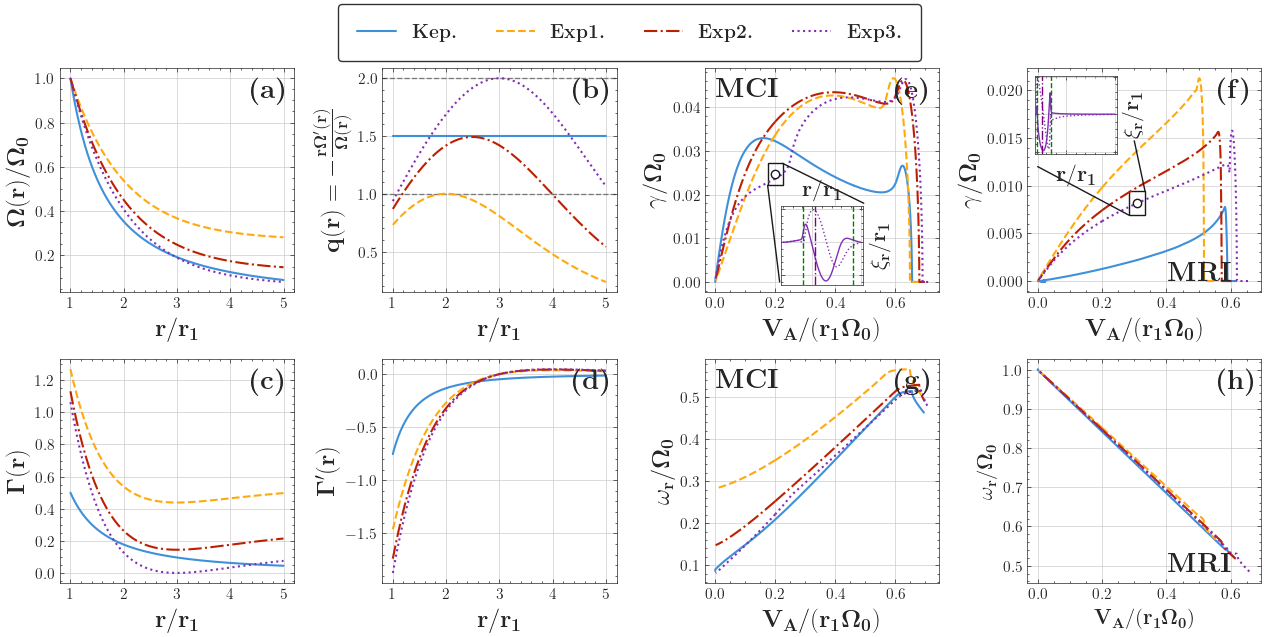

In [225]:
fig, axes = plt.subplots(2,4, figsize=(13, 6))

################ PLOTTING LEFT SECTION######################
########################################################################

axes[0,0].plot(r, W_kep(r), label = 'Kep.', color = color_arr[0], linewidth = 1.5)
axes[0,0].plot(r, W_exp2(r), label = 'Exp1', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,0].plot(r, W_exp3(r), label = 'Exp2', color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[0,0].plot(r, W_exp4(r), label = 'Exp3', color = color_arr[4], linestyle = ':', linewidth = 1.5)
# axes[0,0].plot(r, W_exp1(r), label = 'Exp4', color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[0,0].set_ylabel(r'$\mathbf{\Omega(r)/\Omega_0}$', fontsize = 18)

axes[0,1].axhline(y = 1, linestyle = '--', color = 'k', alpha = 0.5)
axes[0,1].axhline(y = 2, linestyle = '--', color = 'k', alpha = 0.5)
axes[0,1].plot(r, -r*Wp_kep(r)/W_kep(r), label = 'Kep.', color = color_arr[0], linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp2(r)/W_exp2(r), label = 'Exp2', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp3(r)/W_exp3(r), label = 'Exp3', color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp4(r)/W_exp4(r), label = 'Exp4', color = color_arr[4], linestyle = ':', linewidth = 1.5)
# axes[0,1].plot(r, -r*Wp_exp1(r)/W_exp1(r), label = 'Exp1', color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[0,1].set_ylabel(r"$\mathbf{q(r) = -\frac{r\Omega'(r)}{\Omega(r)}}$", fontsize = 18)


axes[1,0].plot(r, 1/r*(2*r*W_kep(r) + r**2*Wp_kep(r)), label = 'Kep.', color = color_arr[0], linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp2(r) + r**2*Wp_exp2(r)), label = 'Exp2', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp3(r) + r**2*Wp_exp3(r)), label = 'Exp3', color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp4(r) + r**2*Wp_exp4(r)), label = 'Exp4', color = color_arr[4], linestyle = ':', linewidth = 1.5)
# axes[1,0].plot(r, 1/r*(2*r*W_exp1(r) + r**2*Wp_exp1(r)), label = 'Exp1', color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[1,0].set_ylabel(r'$\mathbf{\Gamma(r)}$', fontsize = 18)


axes[1,1].plot(r, -1/r**2*(2*r*W_kep(r) + r**2*Wp_kep(r)) + 1/r*(2*W_kep(r) + 4*r*Wp_kep(r) + r**2*Wpp_kep(r)), label = 'Kep.', color = color_arr[0], linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp2(r) + r**2*Wp_exp2(r)) + 1/r*(2*W_exp2(r) + 4*r*Wp_exp2(r) + r**2*Wpp_exp2(r)), label = 'Exp2', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp3(r) + r**2*Wp_exp3(r)) + 1/r*(2*W_exp3(r) + 4*r*Wp_exp3(r) + r**2*Wpp_exp3(r)), label = 'Exp3', color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp4(r) + r**2*Wp_exp4(r)) + 1/r*(2*W_exp4(r) + 4*r*Wp_exp4(r) + r**2*Wpp_exp4(r)), label = 'Exp4', color = color_arr[4], linestyle = ':', linewidth = 1.5)
# axes[1,1].plot(r, -1/r**2*(2*r*W_exp1(r) + r**2*Wp_exp1(r)) + 1/r*(2*W_exp1(r) + 4*r*Wp_exp1(r) + r**2*Wpp_exp1(r)), label = 'Exp1', color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[1,1].set_ylabel(r"$\mathbf{\Gamma'(r)}$", fontsize = 18)

axes[0,0].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)
axes[0,1].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)
axes[1,0].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)
axes[1,1].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)

line1 = Line2D([0], [0], color=color_arr[0], linestyle='-', linewidth = 1.5)
line2 = Line2D([0], [0], color=color_arr[1], linestyle='--', linewidth = 1.5)
line3 = Line2D([0], [0], color=color_arr[2], linestyle='-.', linewidth = 1.5)
line4 = Line2D([0], [0], color=color_arr[4], linestyle=':', linewidth = 1.5)
# line5 = Line2D([0], [0], color=color_arr[6], linestyle=(0, (3, 1, 1, 1, 1, 1)), linewidth = 1.5)

axes[0,0].text(0.81, 0.96, r'\textbf{(a)}', transform=axes[0,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[0,1].text(0.81, 0.96, r'\textbf{(b)}', transform=axes[0,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[1,0].text(0.81, 0.96, r'\textbf{(c)}', transform=axes[1,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[1,1].text(0.81, 0.96, r'\textbf{(d)}', transform=axes[1,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')


######################## PLOTTING RIGHT SECTION ########################
########################################################################
axes[0,2].plot(VA_l_MCI1_Bz_Kep, gr_1k1_MCI_l_Bz_Kep, color = color_arr[0], label = 'Kep.', linestyle = '-', linewidth = 1.5)
axes[0,2].plot(VA_h_MCI1_Bz_Kep[0:len(VA_l_MCI1_Bz_Kep)-475], gr_1k1_MCI_h_Bz_Kep[0:len(VA_l_MCI1_Bz_Kep)-475], color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[0,2].plot(VA_l_MCI1_Bz_Exp4, gr_1k1_MCI_l_Bz_Exp4, color = color_arr[1], label = 'Exp1', linestyle = '--', linewidth = 1.5)
axes[0,2].plot(VA_h_MCI1_Bz_Exp4[0:len(VA_h_MCI1_Bz_Exp4)-650], gr_1k1_MCI_h_Bz_Exp4[0:len(VA_h_MCI1_Bz_Exp4)-650], color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,2].plot(VA_l_MCI1_Bz_Exp5, gr_1k1_MCI_l_Bz_Exp5, color = color_arr[2], label = 'Exp2', linestyle = '-.', linewidth = 1.5)
axes[0,2].plot(VA_h_MCI1_Bz_Exp5[0:len(VA_h_MCI1_Bz_Exp5)-625], gr_1k1_MCI_h_Bz_Exp5[0:len(VA_h_MCI1_Bz_Exp5)-625], color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[0,2].plot(VA_l_MCI1_Bz_Exp6, gr_1k1_MCI_l_Bz_Exp6, color = color_arr[4], label = 'Exp3', linestyle = ':', linewidth = 1.5)
axes[0,2].plot(VA_h_MCI1_Bz_Exp6[0:len(VA_h_MCI1_Bz_Exp6)-600], gr_1k1_MCI_h_Bz_Exp6[0:len(VA_h_MCI1_Bz_Exp6)-600], color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[0,2].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 18)
axes[0,2].set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', fontsize = 18)
# axes[0,0].set_title(r'\textbf{MCI modes}', fontsize = 15)

axes[0,3].plot(VA_l_MRI1_Bz_Kep, gr_1k1_MRI_l_Bz_Kep, color = color_arr[0], label = 'Kep.', linestyle = '-', linewidth = 1.5)
axes[0,3].plot(VA_h_MRI1_Bz_Kep[0:len(VA_h_MRI1_Bz_Kep)-800], gr_1k1_MRI_h_Bz_Kep[0:len(VA_h_MRI1_Bz_Kep)-800], color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[0,3].plot(VA_l_MRI1_Bz_Exp4, gr_1k1_MRI_l_Bz_Exp4, color = color_arr[1], label = 'Exp1', linestyle = '--', linewidth = 1.5)
axes[0,3].plot(VA_h_MRI1_Bz_Exp4[0:len(VA_h_MRI1_Bz_Kep)-700], gr_1k1_MRI_h_Bz_Exp4[0:len(VA_h_MRI1_Bz_Kep)-700], color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,3].plot(VA_l_MRI1_Bz_Exp5, gr_1k1_MRI_l_Bz_Exp5, color = color_arr[2], label = 'Exp2', linestyle = '-.', linewidth = 1.5)
axes[0,3].plot(VA_h_MRI1_Bz_Exp5[0:len(VA_h_MRI1_Bz_Exp5)-800], gr_1k1_MRI_h_Bz_Exp5[0:len(VA_h_MRI1_Bz_Exp5)-800], color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[0,3].plot(VA_l_MRI1_Bz_Exp6, gr_1k1_MRI_l_Bz_Exp6, color = color_arr[4], label = 'Exp3', linestyle = ':', linewidth = 1.5)
axes[0,3].plot(VA_h_MRI1_Bz_Exp6[0:len(VA_h_MRI1_Bz_Exp5)-700], gr_1k1_MRI_h_Bz_Exp6[0:len(VA_h_MRI1_Bz_Exp5)-700], color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[0,3].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 18)
axes[0,3].set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', fontsize = 18)
# axes[0,1].set_title(r'\textbf{MRI modes}', fontsize = 15)

axes[1,2].plot(VA_l_MCI1_Bz_Kep, freq_1k1_MCI_l_Bz_Kep, color = color_arr[0], label = 'Kep.', linestyle = '-', linewidth = 1.5)
axes[1,2].plot(VA_h_MCI1_Bz_Kep[0:len(VA_l_MCI1_Bz_Kep)-475], freq_1k1_MCI_h_Bz_Kep[0:len(VA_l_MCI1_Bz_Kep)-475], color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[1,2].plot(VA_l_MCI1_Bz_Exp4, freq_1k1_MCI_l_Bz_Exp4, color = color_arr[1], label = 'Exp1', linestyle = '--', linewidth = 1.5)
axes[1,2].plot(VA_h_MCI1_Bz_Exp4[0:len(VA_h_MCI1_Bz_Exp4)-650], freq_1k1_MCI_h_Bz_Exp4[0:len(VA_h_MCI1_Bz_Exp4)-650], color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,2].plot(VA_l_MCI1_Bz_Exp5, freq_1k1_MCI_l_Bz_Exp5, color = color_arr[2], label = 'Exp2', linestyle = '-.', linewidth = 1.5)
axes[1,2].plot(VA_h_MCI1_Bz_Exp5[0:len(VA_h_MCI1_Bz_Exp5)-625], freq_1k1_MCI_h_Bz_Exp5[0:len(VA_h_MCI1_Bz_Exp5)-625], color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[1,2].plot(VA_l_MCI1_Bz_Exp6, freq_1k1_MCI_l_Bz_Exp6, color = color_arr[4], label = 'Exp3', linestyle = ':', linewidth = 1.5)
axes[1,2].plot(VA_h_MCI1_Bz_Exp6[0:len(VA_h_MCI1_Bz_Exp6)-600], freq_1k1_MCI_h_Bz_Exp6[0:len(VA_h_MCI1_Bz_Exp6)-600], color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[1,2].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 18)
axes[1,2].set_ylabel(r'$\mathbf{\omega_r/\Omega_0}$', fontsize = 18)

axes[1,3].plot(VA_l_MRI1_Bz_Kep, freq_1k1_MRI_l_Bz_Kep, color = color_arr[0], label = 'Kep.', linestyle = '-', linewidth = 1.5)
axes[1,3].plot(VA_h_MRI1_Bz_Kep[0:len(VA_h_MRI1_Bz_Kep)-800], freq_1k1_MRI_h_Bz_Kep[0:len(VA_h_MRI1_Bz_Kep)-800], color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[1,3].plot(VA_l_MRI1_Bz_Exp4, freq_1k1_MRI_l_Bz_Exp4, color = color_arr[1], label = 'Exp1', linestyle = '--', linewidth = 1.5)
axes[1,3].plot(VA_h_MRI1_Bz_Exp4[0:len(VA_h_MRI1_Bz_Kep)-700], freq_1k1_MRI_h_Bz_Exp4[0:len(VA_h_MRI1_Bz_Kep)-700], color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,3].plot(VA_l_MRI1_Bz_Exp5, freq_1k1_MRI_l_Bz_Exp5, color = color_arr[2], label = 'Exp2', linestyle = '-.', linewidth = 1.5)
axes[1,3].plot(VA_h_MRI1_Bz_Exp5[0:len(VA_h_MRI1_Bz_Exp5)-800], freq_1k1_MRI_h_Bz_Exp5[0:len(VA_h_MRI1_Bz_Exp5)-800], color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[1,3].plot(VA_l_MRI1_Bz_Exp6, freq_1k1_MRI_l_Bz_Exp6, color = color_arr[4], label = 'Exp3', linestyle = ':', linewidth = 1.5)
axes[1,3].plot(VA_h_MRI1_Bz_Exp6[0:len(VA_h_MRI1_Bz_Exp5)-700], freq_1k1_MRI_h_Bz_Exp6[0:len(VA_h_MRI1_Bz_Exp5)-700], color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[1,3].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 15)
axes[1,3].set_ylabel(r'$\mathbf{\omega_r/\Omega_0}$', fontsize = 15)

line1 = Line2D([0], [0], color=color_arr[0], linestyle='-', linewidth = 1.5)
line2 = Line2D([0], [0], color=color_arr[1], linestyle='--', linewidth = 1.5)
line3 = Line2D([0], [0], color=color_arr[2], linestyle='-.', linewidth = 1.5)
line4 = Line2D([0], [0], color=color_arr[4], linestyle=':', linewidth = 1.5)
# line5 = Line2D([0], [0], color=color_arr[6], linestyle=(0, (3, 1, 1, 1, 1, 1)), linewidth = 1.5)

axes[0,2].text(0.81, 0.96, r'\textbf{(e)}', transform=axes[0,2].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[0,2].text(0.05, 0.96, r'\textbf{MCI}', transform=axes[0,2].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')

axes[0,3].text(0.81, 0.96, r'\textbf{(f)}', transform=axes[0,3].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[0,3].text(0.6, 0.14, r'\textbf{MRI}', transform=axes[0,3].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')

axes[1,2].text(0.81, 0.96, r'\textbf{(g)}', transform=axes[1,2].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[1,2].text(0.05, 0.96, r'\textbf{MCI}', transform=axes[1,2].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')

axes[1,3].text(0.81, 0.96, r'\textbf{(h)}', transform=axes[1,3].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[1,3].text(0.6, 0.14, r'\textbf{MRI}', transform=axes[1,3].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')


####################################################
####### INSET MODE STRUCTURE (MRI)
ax_inset = inset_axes(axes[0,3], width="35%", height="35%", loc='upper left')
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\xi_r/r_1}$", fontsize = 16)
ax_inset.plot(r_Kep, u_Kep.real, color = color_arr[4])
ax_inset.plot(r_Kep, u_Kep.imag, color = color_arr[4], linestyle = 'dotted')
plt.axvline(x=r_vec_Kep[0], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_Kep[1], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_Kep[4], linestyle = '-.', color = 'purple')
ax_inset.set_xlim(0.9, 5.1)
# ax_inset.xaxis.set_label_position('top')
# ax_inset.xaxis.set_ticks_position('top')
ax_inset.legend()
ax_inset.yaxis.set_label_position('right')


############ On bottom
ax_inset = inset_axes(axes[0,2], width="35%", height="35%", loc='lower center')
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\xi_r/r_1}$", fontsize = 16)
ax_inset.plot(r_Kep_MCI, u_Kep_MCI.real, color = color_arr[4])
ax_inset.plot(r_Kep_MCI, u_Kep_MCI.imag, color = color_arr[4], linestyle = 'dotted')
plt.axvline(x=r_vec_Kep_MCI[0], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_Kep_MCI[1], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_Kep_MCI[4], linestyle = '-.', color = 'purple')
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
ax_inset.legend()
ax_inset.yaxis.set_label_position('right')

##### MARKS ON GRAPH
axes[0,3].plot(VA_h_MRI1_Bz_Kep[0], guess_MRI.imag, marker = 'o', color = 'w', markeredgecolor = 'k')
axes[0,2].plot(0.2, guess_MCI.imag, marker = 'o', color = 'w', markeredgecolor = 'k')

### MRI
dx1 = 0.05
dy1 = 0.005/2
x1 = VA_h_MRI1_Bz_Kep[0]-dx1/2
y1 = guess_MRI.imag - dy1/2
rect = patches.Rectangle((x1, y1), dx1, dy1, linewidth=1, edgecolor='k', facecolor='none')
axes[0,3].add_patch(rect)

dx2 = 0.05
dy2 = 0.005
x2 = 0.2-dx2/2
y2 = guess_MCI.imag - dy2/2
rect = patches.Rectangle((x2, y2), dx2, dy2, linewidth=1, edgecolor='k', facecolor='none')
axes[0,2].add_patch(rect)

### Lines connecting graphs (MCI)
lineX = [x2, 0.215]
lineY = [y2, 0.00]
axes[0,2].plot(lineX, lineY, color = 'k', linestyle = '-')

lineX2 = [x2+dx2, 0.495]
lineY2 = [y2+dy2, 0.018]
axes[0,2].plot(lineX2, lineY2, color = 'k', linestyle = '-')

#### Lines connecting graphs (MRI)

lineX = [x1, 0.]
lineY = [y1, 0.012]
axes[0,3].plot(lineX, lineY, color = 'k', linestyle = '-')

lineX2 = [x1+dx1, 0.3]
lineY2 = [y1+dy1, 0.0147]
axes[0,3].plot(lineX2, lineY2, color = 'k', linestyle = '-')




lines = [line1, line2, line3, line4]
labels = [r'\textbf{Kep.}', r'\textbf{Exp1.}', r'\textbf{Exp2.}', r'\textbf{Exp3.}']
fig.legend(lines, labels, loc='lower center', ncol=5, 
           bbox_to_anchor=(0.5, 0.95),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 14)

plt.tight_layout()
plt.savefig(f'Vorticity/Exponential-Configuration-Combined-both.pdf')
plt.show()

#### Get MAximum GR

In [226]:
##### Getting Growth Rates
print("Kep")
VA_l_MCI1_Bz_Kep = np.array(VA_l_MCI1_Bz_Kep)
VA_h_MCI1_Bz_Kep = np.array(VA_h_MCI1_Bz_Kep)
freq_1k1_MCI_l_Bz_Kep = np.array(freq_1k1_MCI_l_Bz_Kep)
freq_1k1_MCI_h_Bz_Kep = np.array(freq_1k1_MCI_h_Bz_Kep)
gr_1k1_MCI_l_Bz_Kep = np.array(gr_1k1_MCI_l_Bz_Kep)
gr_1k1_MCI_h_Bz_Kep = np.array(gr_1k1_MCI_h_Bz_Kep)
gr_l_max = np.max(gr_1k1_MCI_l_Bz_Kep)
gr_h_max = np.max(gr_1k1_MCI_h_Bz_Kep)
if(gr_h_max > gr_l_max):
    gr = gr_h_max
    ii = np.where(gr == gr_1k1_MCI_h_Bz_Kep)
    VA = VA_h_MCI1_Bz_Kep[ii[:]][0]
    freq = freq_1k1_MCI_h_Bz_Kep[ii[:]][0]
    print(f'VA, Mode = {VA}, {freq + 1j*gr}')
else:
    gr = gr_l_max
    ii = np.where(gr == gr_1k1_MCI_l_Bz_Kep)
    VA = VA_l_MCI1_Bz_Kep[ii[:]][0]
    freq = freq_1k1_MCI_l_Bz_Kep[ii[:]][0]
    print(f'VA, Mode = {VA}, {freq + 1j*gr}')

##### Getting Growth Rates
print("Exp4")
VA_l_MCI1_Bz_Exp4 = np.array(VA_l_MCI1_Bz_Exp4)
VA_h_MCI1_Bz_Exp4 = np.array(VA_h_MCI1_Bz_Exp4)
freq_1k1_MCI_l_Bz_Exp4 = np.array(freq_1k1_MCI_l_Bz_Exp4)
freq_1k1_MCI_h_Bz_Exp4 = np.array(freq_1k1_MCI_h_Bz_Exp4)
gr_1k1_MCI_l_Bz_Exp4 = np.array(gr_1k1_MCI_l_Bz_Exp4)
gr_1k1_MCI_h_Bz_Exp4 = np.array(gr_1k1_MCI_h_Bz_Exp4)
gr_l_max = np.max(gr_1k1_MCI_l_Bz_Exp4)
gr_h_max = np.max(gr_1k1_MCI_h_Bz_Exp4)
if(gr_h_max > gr_l_max):
    gr = gr_h_max
    ii = np.where(gr == gr_1k1_MCI_h_Bz_Exp4)
    VA = VA_h_MCI1_Bz_Exp4[ii[:]][0]
    freq = freq_1k1_MCI_h_Bz_Exp4[ii[:]][0]
    print(f'VA, Mode = {VA}, {freq + 1j*gr}')
else:
    gr = gr_l_max
    ii = np.where(gr == gr_1k1_MCI_l_Bz_Exp4)
    VA = VA_l_MCI1_Bz_Exp4[ii[:]][0]
    freq = freq_1k1_MCI_l_Bz_Exp4[ii[:]][0]
    print(f'VA, Mode = {VA}, {freq + 1j*gr}')

##### Getting Growth Rates
print("Exp5")
VA_l_MCI1_Bz_Exp5 = np.array(VA_l_MCI1_Bz_Exp5)
VA_h_MCI1_Bz_Exp5 = np.array(VA_h_MCI1_Bz_Exp5)
freq_1k1_MCI_l_Bz_Exp5 = np.array(freq_1k1_MCI_l_Bz_Exp5)
freq_1k1_MCI_h_Bz_Exp5 = np.array(freq_1k1_MCI_h_Bz_Exp5)
gr_1k1_MCI_l_Bz_Exp5 = np.array(gr_1k1_MCI_l_Bz_Exp5)
gr_1k1_MCI_h_Bz_Exp5 = np.array(gr_1k1_MCI_h_Bz_Exp5)
gr_l_max = np.max(gr_1k1_MCI_l_Bz_Exp5)
gr_h_max = np.max(gr_1k1_MCI_h_Bz_Exp5)
if(gr_h_max > gr_l_max):
    gr = gr_h_max
    ii = np.where(gr == gr_1k1_MCI_h_Bz_Exp5)
    VA = VA_h_MCI1_Bz_Exp5[ii[:]][0]
    freq = freq_1k1_MCI_h_Bz_Exp5[ii[:]][0]
    print(f'VA, Mode = {VA}, {freq + 1j*gr}')
else:
    gr = gr_l_max
    ii = np.where(gr == gr_1k1_MCI_l_Bz_Exp5)
    VA = VA_l_MCI1_Bz_Exp5[ii[:]][0]
    freq = freq_1k1_MCI_l_Bz_Exp5[ii[:]][0]
    print(f'VA, Mode = {VA}, {freq + 1j*gr}')
    
##### Getting Growth Rates
print("Exp6")
VA_l_MCI1_Bz_Exp6 = np.array(VA_l_MCI1_Bz_Exp6)
VA_h_MCI1_Bz_Exp6 = np.array(VA_h_MCI1_Bz_Exp6)
freq_1k1_MCI_l_Bz_Exp6 = np.array(freq_1k1_MCI_l_Bz_Exp6)
freq_1k1_MCI_h_Bz_Exp6 = np.array(freq_1k1_MCI_h_Bz_Exp6)
gr_1k1_MCI_l_Bz_Exp6 = np.array(gr_1k1_MCI_l_Bz_Exp6)
gr_1k1_MCI_h_Bz_Exp6 = np.array(gr_1k1_MCI_h_Bz_Exp6)
gr_l_max = np.max(gr_1k1_MCI_l_Bz_Exp6)
gr_h_max = np.max(gr_1k1_MCI_h_Bz_Exp6)
if(gr_h_max > gr_l_max):
    gr = gr_h_max
    ii = np.where(gr == gr_1k1_MCI_h_Bz_Exp6)
    VA = VA_h_MCI1_Bz_Exp6[ii[:]][0]
    freq = freq_1k1_MCI_h_Bz_Exp6[ii[:]][0]
    print(f'VA, Mode = {VA}, {freq + 1j*gr}')
else:
    gr = gr_l_max
    ii = np.where(gr == gr_1k1_MCI_l_Bz_Exp6)
    VA = VA_l_MCI1_Bz_Exp6[ii[:]][0]
    freq = freq_1k1_MCI_l_Bz_Exp6[ii[:]][0]
    print(f'VA, Mode = {VA}, {freq + 1j*gr}')


Kep
VA, Mode = 0.16018155006572302, (0.18322723418813808+0.03289579060419689j)
Exp4
VA, Mode = 0.5942818054963932, (0.5634383279995057+0.046600981058409124j)
Exp5
VA, Mode = 0.6256122668133438, (0.5239151241092603+0.046141609409388565j)
Exp6
VA, Mode = 0.6352524087570208, (0.5098898307415363+0.046381253884282984j)


In [227]:
##### Getting Growth Rates
print("Kep")
VA_l_MRI1_Bz_Kep = np.array(VA_l_MRI1_Bz_Kep)
VA_h_MRI1_Bz_Kep = np.array(VA_h_MRI1_Bz_Kep)
freq_1k1_MRI_l_Bz_Kep = np.array(freq_1k1_MRI_l_Bz_Kep)
freq_1k1_MRI_h_Bz_Kep = np.array(freq_1k1_MRI_h_Bz_Kep)
gr_1k1_MRI_l_Bz_Kep = np.array(gr_1k1_MRI_l_Bz_Kep)
gr_1k1_MRI_h_Bz_Kep = np.array(gr_1k1_MRI_h_Bz_Kep)
gr_l_max = np.max(gr_1k1_MRI_l_Bz_Kep)
gr_h_max = np.max(gr_1k1_MRI_h_Bz_Kep)
if(gr_h_max > gr_l_max):
    gr = gr_h_max
    ii = np.where(gr == gr_1k1_MRI_h_Bz_Kep)
    VA = VA_h_MRI1_Bz_Kep[ii[:]][0]
    freq = freq_1k1_MRI_h_Bz_Kep[ii[:]][0]
    print(f'VA, Mode = {VA}, {freq + 1j*gr}')
else:
    gr = gr_l_max
    ii = np.where(gr == gr_1k1_MRI_l_Bz_Kep)
    VA = VA_l_MRI1_Bz_Kep[ii[:]][0]
    freq = freq_1k1_MRI_l_Bz_Kep[ii[:]][0]
    print(f'VA, Mode = {VA}, {freq + 1j*gr}')

##### Getting Growth Rates
print("Exp4")
VA_l_MRI1_Bz_Exp4 = np.array(VA_l_MRI1_Bz_Exp4)
VA_h_MRI1_Bz_Exp4 = np.array(VA_h_MRI1_Bz_Exp4)
freq_1k1_MRI_l_Bz_Exp4 = np.array(freq_1k1_MRI_l_Bz_Exp4)
freq_1k1_MRI_h_Bz_Exp4 = np.array(freq_1k1_MRI_h_Bz_Exp4)
gr_1k1_MRI_l_Bz_Exp4 = np.array(gr_1k1_MRI_l_Bz_Exp4)
gr_1k1_MRI_h_Bz_Exp4 = np.array(gr_1k1_MRI_h_Bz_Exp4)
gr_l_max = np.max(gr_1k1_MRI_l_Bz_Exp4)
gr_h_max = np.max(gr_1k1_MRI_h_Bz_Exp4)
if(gr_h_max > gr_l_max):
    gr = gr_h_max
    ii = np.where(gr == gr_1k1_MRI_h_Bz_Exp4)
    VA = VA_h_MRI1_Bz_Exp4[ii[:]][0]
    freq = freq_1k1_MRI_h_Bz_Exp4[ii[:]][0]
    print(f'VA, Mode = {VA}, {freq + 1j*gr}')
else:
    gr = gr_l_max
    ii = np.where(gr == gr_1k1_MRI_l_Bz_Exp4)
    VA = VA_l_MRI1_Bz_Exp4[ii[:]][0]
    freq = freq_1k1_MRI_l_Bz_Exp4[ii[:]][0]
    print(f'VA, Mode = {VA}, {freq + 1j*gr}')

##### Getting Growth Rates
print("Exp5")
VA_l_MRI1_Bz_Exp5 = np.array(VA_l_MRI1_Bz_Exp5)
VA_h_MRI1_Bz_Exp5 = np.array(VA_h_MRI1_Bz_Exp5)
freq_1k1_MRI_l_Bz_Exp5 = np.array(freq_1k1_MRI_l_Bz_Exp5)
freq_1k1_MRI_h_Bz_Exp5 = np.array(freq_1k1_MRI_h_Bz_Exp5)
gr_1k1_MRI_l_Bz_Exp5 = np.array(gr_1k1_MRI_l_Bz_Exp5)
gr_1k1_MRI_h_Bz_Exp5 = np.array(gr_1k1_MRI_h_Bz_Exp5)
gr_l_max = np.max(gr_1k1_MRI_l_Bz_Exp5)
gr_h_max = np.max(gr_1k1_MRI_h_Bz_Exp5)
if(gr_h_max > gr_l_max):
    gr = gr_h_max
    ii = np.where(gr == gr_1k1_MRI_h_Bz_Exp5)
    VA = VA_h_MRI1_Bz_Exp5[ii[:]][0]
    freq = freq_1k1_MRI_h_Bz_Exp5[ii[:]][0]
    print(f'VA, Mode = {VA}, {freq + 1j*gr}')
else:
    gr = gr_l_max
    ii = np.where(gr == gr_1k1_MRI_l_Bz_Exp5)
    VA = VA_l_MRI1_Bz_Exp5[ii[:]][0]
    freq = freq_1k1_MRI_l_Bz_Exp5[ii[:]][0]
    print(f'VA, Mode = {VA}, {freq + 1j*gr}')
    
##### Getting Growth Rates
print("Exp6")
VA_l_MRI1_Bz_Exp6 = np.array(VA_l_MRI1_Bz_Exp6)
VA_h_MRI1_Bz_Exp6 = np.array(VA_h_MRI1_Bz_Exp6)
freq_1k1_MRI_l_Bz_Exp6 = np.array(freq_1k1_MRI_l_Bz_Exp6)
freq_1k1_MRI_h_Bz_Exp6 = np.array(freq_1k1_MRI_h_Bz_Exp6)
gr_1k1_MRI_l_Bz_Exp6 = np.array(gr_1k1_MRI_l_Bz_Exp6)
gr_1k1_MRI_h_Bz_Exp6 = np.array(gr_1k1_MRI_h_Bz_Exp6)
gr_l_max = np.max(gr_1k1_MRI_l_Bz_Exp6)
gr_h_max = np.max(gr_1k1_MRI_h_Bz_Exp6)
if(gr_h_max > gr_l_max):
    gr = gr_h_max
    ii = np.where(gr == gr_1k1_MRI_h_Bz_Exp6)
    VA = VA_h_MRI1_Bz_Exp6[ii[:]][0]
    freq = freq_1k1_MRI_h_Bz_Exp6[ii[:]][0]
    print(f'VA, Mode = {VA}, {freq + 1j*gr}')
else:
    gr = gr_l_max
    ii = np.where(gr == gr_1k1_MRI_l_Bz_Exp6)
    VA = VA_l_MRI1_Bz_Exp6[ii[:]][0]
    freq = freq_1k1_MRI_l_Bz_Exp6[ii[:]][0]
    print(f'VA, Mode = {VA}, {freq + 1j*gr}')


Kep
VA, Mode = 0.5813005592037289, (0.542064150356516+0.007768719493251395j)
Exp4
VA, Mode = 0.5017364428370931, (0.6265241314767422+0.02126794871451543j)
Exp5
VA, Mode = 0.5605413086935234, (0.5700019512722544+0.015646623471313417j)
Exp6
VA, Mode = 0.6034399403428864, (0.5323009620964023+0.01576002641440011j)


# MHD v HD Perturbations

#### Load

In [239]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-Exp7-5r1-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-Exp7-5r1-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-Exp7-5r1-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-Exp7-5r1-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

gr_1k1_MCI_l_Bz_Exp7 = []
gr_1k1_MCI_h_Bz_Exp7 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_Bz_Exp7.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_Exp7.append(guesses_1k1_MCI_h[j].imag)    

freq_1k1_MCI_l_Bz_Exp7 = []
freq_1k1_MCI_h_Bz_Exp7 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_Bz_Exp7.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    freq_1k1_MCI_h_Bz_Exp7.append(guesses_1k1_MCI_h[j].real)    
    
with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_Exp7 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_Exp7 = pickle.load(f)  

In [240]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-Exp9-5r1-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-Exp9-5r1-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-Exp9-5r1-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-Exp9-5r1-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

gr_1k1_MCI_l_Bz_Exp9 = []
gr_1k1_MCI_h_Bz_Exp9 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_Bz_Exp9.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_Exp9.append(guesses_1k1_MCI_h[j].imag)    

freq_1k1_MCI_l_Bz_Exp9 = []
freq_1k1_MCI_h_Bz_Exp9 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_Bz_Exp9.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    freq_1k1_MCI_h_Bz_Exp9.append(guesses_1k1_MCI_h[j].real)    
    
with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_Exp9 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_Exp9 = pickle.load(f)  

In [241]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-Exp8-5r1-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-Exp8-5r1-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-Exp8-5r1-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-Exp8-5r1-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

gr_1k1_MCI_l_Bz_Exp8 = []
gr_1k1_MCI_h_Bz_Exp8 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_Bz_Exp8.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_Exp8.append(guesses_1k1_MCI_h[j].imag)    

freq_1k1_MCI_l_Bz_Exp8 = []
freq_1k1_MCI_h_Bz_Exp8 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_Bz_Exp8.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    freq_1k1_MCI_h_Bz_Exp8.append(guesses_1k1_MCI_h[j].real)    
    
with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_Exp8 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_Exp8 = pickle.load(f)  

#### Configuration

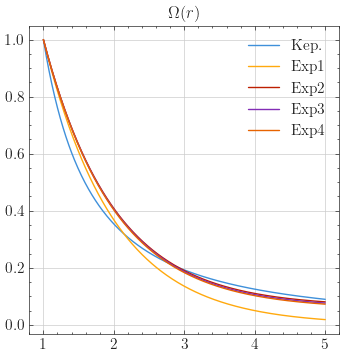

Vorticity Ratios
R_Kep = -0.826458036168476
R_Exp1 = -13.650331899048686
R_Exp2 = -1.7154691608997548
R_Exp3 = -1.8306761536446992
R_Exp4 = -1.9488859430615826


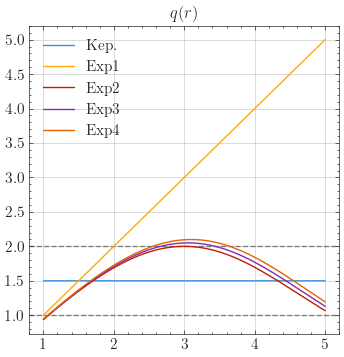

In [242]:
dt  = 1/100
r = np.arange(1,5+dt, dt)

### Exp4 Profile (Minimal R ratio)
a = 0.9366210025563255
W_exp2 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))
Wp_exp2 = W_exp2.derivative()
Wpp_exp2 = Wp_exp2.derivative()
v_exp2 = 1/r*(i2.CubicSpline(r, r**2*W_exp2(r)).derivative())(r) 
vp_exp2 = i2.CubicSpline(r, v_exp2).derivative()(r)

### Exp5 Profile (Kep. R Ratio)
a = 0.9409132827360274
W_exp3 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))
Wp_exp3 = W_exp3.derivative()
Wpp_exp3 = Wp_exp3.derivative()
v_exp3 = 1/r*(i2.CubicSpline(r, r**2*W_exp3(r)).derivative())(r) 
vp_exp3 = i2.CubicSpline(r, v_exp3).derivative()(r)

### q(r) = 2 #Exp6
a = 0.9448239074457745
W_exp4 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))
Wp_exp4 = W_exp4.derivative()
Wpp_exp4 = Wp_exp4.derivative()
v_exp4 = 1/r*(i2.CubicSpline(r, r**2*W_exp4(r)).derivative())(r) 
vp_exp4 = i2.CubicSpline(r, v_exp4).derivative()(r)

plt.figure(figsize = (4,4))
plt.plot(r, W_kep(r), label = 'Kep.', color = color_arr[0])
plt.plot(r, W_exp1(r), label = 'Exp1', color = color_arr[1])
plt.plot(r, W_exp2(r), label = 'Exp2', color = color_arr[2])
plt.plot(r, W_exp3(r), label = 'Exp3', color = color_arr[4])
plt.plot(r, W_exp4(r), label = 'Exp4', color = color_arr[6])

plt.title(r'$\Omega(r)$')
plt.legend()
plt.show()

R_kep = np.average(vp_kep)/np.average(v_kep)
R_exp1 = np.average(vp_exp1)/np.average(v_exp1)
R_exp2 = np.average(vp_exp2)/np.average(v_exp2)
R_exp3 = np.average(vp_exp3)/np.average(v_exp3)
R_exp4 = np.average(vp_exp4)/np.average(v_exp4)

print('Vorticity Ratios')
print(f'R_Kep = {R_kep}')
print(f'R_Exp1 = {R_exp1}')
print(f'R_Exp2 = {R_exp2}')
print(f'R_Exp3 = {R_exp3}')
print(f'R_Exp4 = {R_exp4}')

plt.figure(figsize = (4,4))

plt.axhline(y = 1, linestyle = '--', color = 'k', alpha = 0.5)
plt.axhline(y = 2, linestyle = '--', color = 'k', alpha = 0.5)

plt.plot(r, -r*Wp_kep(r)/W_kep(r), label = 'Kep.', color = color_arr[0])
plt.plot(r, -r*Wp_exp1(r)/W_exp1(r), label = 'Exp1', color = color_arr[1])
plt.plot(r, -r*Wp_exp2(r)/W_exp2(r), label = 'Exp2', color = color_arr[2])
plt.plot(r, -r*Wp_exp3(r)/W_exp3(r), label = 'Exp3', color = color_arr[4])
plt.plot(r, -r*Wp_exp4(r)/W_exp4(r), label = 'Exp4', color = color_arr[6])
plt.title(r'$q(r)$')
plt.legend()
plt.show()


C:\Users\Alex\AppData\Local\Temp\ipykernel_916040\3838990835.py:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


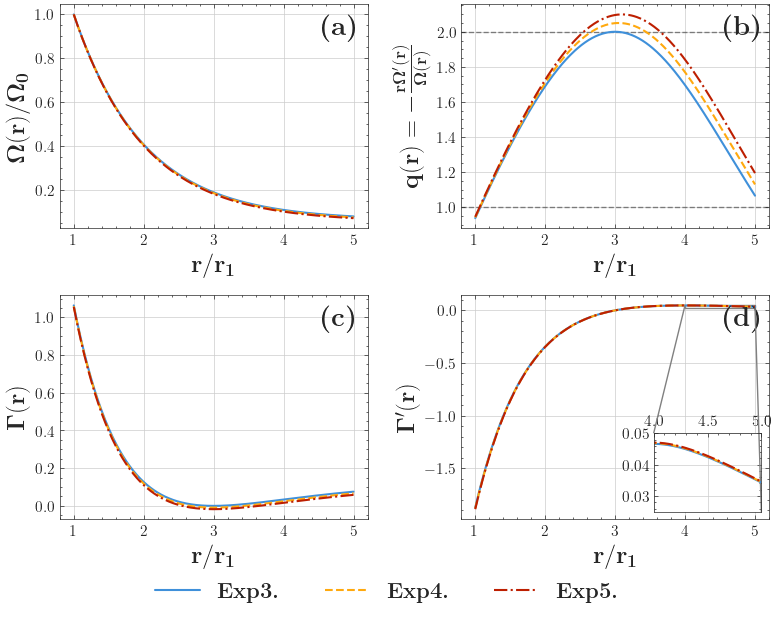

In [243]:
from matplotlib.lines import Line2D
fig, axes = plt.subplots(2,2, figsize=(8, 6))

# a = 1
# W_exp1 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))

# ### Exp4 Profile (Minimal R ratio)
# a = 0.73123123
# W_exp2 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))

# ### Exp5 Profile (Kep. R Ratio)
# a = 0.8689352412721272
# W_exp3 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))

# ### q(r) = 2
# a = 0.9366210025563255
# W_exp4 = i2.CubicSpline(r, a*np.exp(1-r)+(1-a))

axes[0,0].plot(r, W_exp2(r), label = 'Exp1', color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[0,0].plot(r, W_exp3(r), label = 'Exp2', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,0].plot(r, W_exp4(r), label = 'Exp3', color = color_arr[2], linestyle = '-.', linewidth = 1.5)
# axes[0,0].plot(r, W_exp1(r), label = 'Exp4', color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[0,0].set_ylabel(r'$\mathbf{\Omega(r)/\Omega_0}$', fontsize = 18)

axes[0,1].axhline(y = 1, linestyle = '--', color = 'k', alpha = 0.5)
axes[0,1].axhline(y = 2, linestyle = '--', color = 'k', alpha = 0.5)
axes[0,1].plot(r, -r*Wp_exp2(r)/W_exp2(r), label = 'Exp2', color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp3(r)/W_exp3(r), label = 'Exp3', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp4(r)/W_exp4(r), label = 'Exp4', color = color_arr[2], linestyle = '-.', linewidth = 1.5)
# axes[0,1].plot(r, -r*Wp_exp1(r)/W_exp1(r), label = 'Exp1', color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[0,1].set_ylabel(r"$\mathbf{q(r) = -\frac{r\Omega'(r)}{\Omega(r)}}$", fontsize = 18)


axes[1,0].plot(r, 1/r*(2*r*W_exp2(r) + r**2*Wp_exp2(r)), color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp3(r) + r**2*Wp_exp3(r)), color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp4(r) + r**2*Wp_exp4(r)), color = color_arr[2], linestyle = '-.', linewidth = 1.5)
# axes[1,0].plot(r, 1/r*(2*r*W_exp1(r) + r**2*Wp_exp1(r)), label = 'Exp1', color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[1,0].set_ylabel(r'$\mathbf{\Gamma(r)}$', fontsize = 18)


axes[1,1].plot(r, -1/r**2*(2*r*W_exp2(r) + r**2*Wp_exp2(r)) + 1/r*(2*W_exp2(r) + 4*r*Wp_exp2(r) + r**2*Wpp_exp2(r)), label = 'Exp2', color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp3(r) + r**2*Wp_exp3(r)) + 1/r*(2*W_exp3(r) + 4*r*Wp_exp3(r) + r**2*Wpp_exp3(r)), label = 'Exp3', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp4(r) + r**2*Wp_exp4(r)) + 1/r*(2*W_exp4(r) + 4*r*Wp_exp4(r) + r**2*Wpp_exp4(r)), label = 'Exp4', color = color_arr[2], linestyle = '-.', linewidth = 1.5)
# axes[1,1].plot(r, -1/r**2*(2*r*W_exp1(r) + r**2*Wp_exp1(r)) + 1/r*(2*W_exp1(r) + 4*r*Wp_exp1(r) + r**2*Wpp_exp1(r)), label = 'Exp1', color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[1,1].set_ylabel(r"$\mathbf{\Gamma'(r)}$", fontsize = 18)

axes[0,0].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)
axes[0,1].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)
axes[1,0].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)
axes[1,1].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)

line1 = Line2D([0], [0], color=color_arr[0], linestyle='-', linewidth = 1.5)
line2 = Line2D([0], [0], color=color_arr[1], linestyle='--', linewidth = 1.5)
line3 = Line2D([0], [0], color=color_arr[2], linestyle='-.', linewidth = 1.5)
line4 = Line2D([0], [0], color=color_arr[4], linestyle=':', linewidth = 1.5)
# line5 = Line2D([0], [0], color=color_arr[6], linestyle=(0, (3, 1, 1, 1, 1, 1)), linewidth = 1.5)

axes[0,0].text(0.85, 0.96, r'\textbf{(a)}', transform=axes[0,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[0,1].text(0.85, 0.96, r'\textbf{(b)}', transform=axes[0,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[1,0].text(0.85, 0.96, r'\textbf{(c)}', transform=axes[1,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[1,1].text(0.85, 0.96, r'\textbf{(d)}', transform=axes[1,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')

###################################
###################### q(r) Inset Plot
# # Define Zoom-in Range
# y_min, y_max = 1.9, 2.15  # Adjust based on your data
# zoom_start, zoom_end = 2.5, 3.5
# ax_inset = inset_axes(axes[0,1], width="35%", height="35%", loc="lower center")  # Adjust size and position
# ax_inset.plot(r, -r*Wp_exp2(r)/W_exp2(r), color = color_arr[0], linestyle = '-', linewidth = 1.5)
# ax_inset.plot(r, -r*Wp_exp3(r)/W_exp3(r), color = color_arr[1], linestyle = '--', linewidth = 1.5)
# ax_inset.plot(r, -r*Wp_exp4(r)/W_exp4(r), color = color_arr[2], linestyle = '-.', linewidth = 1.5)
# ax_inset.set_xlim(zoom_start,zoom_end)
# ax_inset.set_ylim(y_min,y_max)
# ax_inset.xaxis.set_label_position('top')
# ax_inset.xaxis.set_ticks_position('top')
# mark_inset(axes[0,1], ax_inset, loc1=2, loc2=1, fc="none", ec="0.5")

###################### G(r) Inset Plot
# Define Zoom-in Range
# y_min, y_max = -0.05, 0.05  # Adjust based on your data
# zoom_start, zoom_end = 2.5, 3.5
# ax_inset = inset_axes(axes[1,0], width="35%", height="35%", loc="center right")  # Adjust size and position
# ax_inset.plot(r, 1/r*(2*r*W_exp2(r) + r**2*Wp_exp2(r)), color = color_arr[0], linestyle = '-', linewidth = 1.5)
# ax_inset.plot(r, 1/r*(2*r*W_exp3(r) + r**2*Wp_exp3(r)), color = color_arr[1], linestyle = '--', linewidth = 1.5)
# ax_inset.plot(r, 1/r*(2*r*W_exp4(r) + r**2*Wp_exp4(r)), color = color_arr[2], linestyle = '-.', linewidth = 1.5)
# ax_inset.set_xlim(zoom_start,zoom_end)
# ax_inset.set_ylim(y_min,y_max)
# mark_inset(axes[1,0], ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")

###################### Omega(r) Inset Plot
# Define Zoom-in Range
# y_min, y_max = 0.07,0.1  # Adjust based on your data
# zoom_start, zoom_end = 4, 5
# ax_inset = inset_axes(axes[0,0], width="35%", height="35%", loc="center right")  # Adjust size and position
# ax_inset.plot(r, W_exp2(r), color = color_arr[0], linestyle = '-', linewidth = 1.5)
# ax_inset.plot(r, W_exp3(r), color = color_arr[1], linestyle = '--', linewidth = 1.5)
# ax_inset.plot(r, W_exp4(r), color = color_arr[2], linestyle = '-.', linewidth = 1.5)
# ax_inset.set_xlim(zoom_start,zoom_end)
# ax_inset.set_ylim(y_min,y_max)
# mark_inset(axes[0,0], ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")

###################### G'(r) Inset Plot
# Define Zoom-in Range
y_min, y_max = 0.025,0.05 # Adjust based on your data
zoom_start, zoom_end = 4, 5
ax_inset = inset_axes(axes[1,1], width="35%", height="35%", loc="lower right")  # Adjust size and position
ax_inset.plot(r, -1/r**2*(2*r*W_exp2(r) + r**2*Wp_exp2(r)) + 1/r*(2*W_exp2(r) + 4*r*Wp_exp2(r) + r**2*Wpp_exp2(r)), color = color_arr[0], linestyle = '-', linewidth = 1.5)
ax_inset.plot(r, -1/r**2*(2*r*W_exp3(r) + r**2*Wp_exp3(r)) + 1/r*(2*W_exp3(r) + 4*r*Wp_exp3(r) + r**2*Wpp_exp3(r)), color = color_arr[1], linestyle = '--', linewidth = 1.5)
ax_inset.plot(r, -1/r**2*(2*r*W_exp4(r) + r**2*Wp_exp4(r)) + 1/r*(2*W_exp4(r) + 4*r*Wp_exp4(r) + r**2*Wpp_exp4(r)), color = color_arr[2], linestyle = '-.', linewidth = 1.5)
ax_inset.set_xlim(zoom_start,zoom_end)
ax_inset.set_ylim(y_min,y_max)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
mark_inset(axes[1,1], ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")

############################################################
lines = [line1, line2, line3, line4]
labels = [r'\textbf{Exp3.}', r'\textbf{Exp4.}', r'\textbf{Exp5.}']
fig.legend(lines, labels, loc='lower center', ncol=5, 
           bbox_to_anchor=(0.5, -0.1),  # Position the legend below the plot
           frameon=False,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 16)

plt.tight_layout()
plt.savefig(f'Vorticity/Exponential-Configuration-Hyd.pdf')
plt.show()

#### GRs

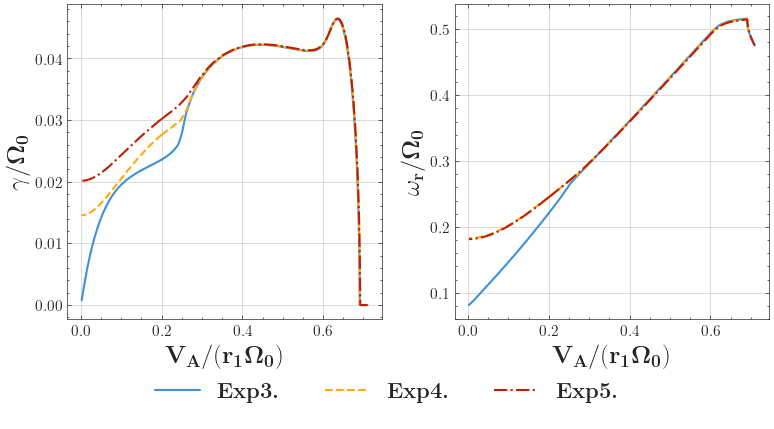

In [244]:
fig, axes = plt.subplots(1,2, figsize=(8, 4))


axes[0].plot(VA_l_MCI1_Bz_Exp6, gr_1k1_MCI_l_Bz_Exp6, color = color_arr[0], label = 'Exp3', linestyle = '-', linewidth = 1.5)
axes[0].plot(VA_h_MCI1_Bz_Exp6[0:len(VA_h_MCI1_Bz_Exp6)-600], gr_1k1_MCI_h_Bz_Exp6[0:len(VA_h_MCI1_Bz_Exp6)-600], color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[0].plot(VA_l_MCI1_Bz_Exp8, gr_1k1_MCI_l_Bz_Exp8, color = color_arr[1], label = 'Exp4', linestyle = '--', linewidth = 1.5)
axes[0].plot(VA_h_MCI1_Bz_Exp8[0:len(VA_h_MCI1_Bz_Exp6)-600], gr_1k1_MCI_h_Bz_Exp8[0:len(VA_h_MCI1_Bz_Exp6)-600], color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0].plot(VA_l_MCI1_Bz_Exp7, gr_1k1_MCI_l_Bz_Exp7, color = color_arr[2], label = 'Exp5', linestyle = '-.', linewidth = 1.5)
axes[0].plot(VA_h_MCI1_Bz_Exp7[0:len(VA_h_MCI1_Bz_Exp6)-600], gr_1k1_MCI_h_Bz_Exp7[0:len(VA_h_MCI1_Bz_Exp6)-600], color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[0].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 18)
axes[0].set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', fontsize = 18)
# axes[0,0].set_title(r'\textbf{MCI modes}', fontsize = 18)



axes[0].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 18)
axes[0].set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', fontsize = 18)
# axes[0,1].set_title(r'\textbf{MRI modes}', fontsize = 18)


axes[1].plot(VA_l_MCI1_Bz_Exp6, freq_1k1_MCI_l_Bz_Exp6, color = color_arr[0], label = 'Exp3', linestyle = '-', linewidth = 1.5)
axes[1].plot(VA_h_MCI1_Bz_Exp6[0:len(VA_h_MCI1_Bz_Exp6)-600], freq_1k1_MCI_h_Bz_Exp6[0:len(VA_h_MCI1_Bz_Exp6)-600], color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[1].plot(VA_l_MCI1_Bz_Exp8, freq_1k1_MCI_l_Bz_Exp8, color = color_arr[1], label = 'Exp3', linestyle = '--', linewidth = 1.5)
axes[1].plot(VA_h_MCI1_Bz_Exp8[0:len(VA_h_MCI1_Bz_Exp6)-600], freq_1k1_MCI_h_Bz_Exp8[0:len(VA_h_MCI1_Bz_Exp6)-600], color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1].plot(VA_l_MCI1_Bz_Exp7, freq_1k1_MCI_l_Bz_Exp7, color = color_arr[2], label = 'Exp3', linestyle = '-.', linewidth = 1.5)
axes[1].plot(VA_h_MCI1_Bz_Exp7[0:len(VA_h_MCI1_Bz_Exp6)-600], freq_1k1_MCI_h_Bz_Exp7[0:len(VA_h_MCI1_Bz_Exp6)-600], color = color_arr[2], linestyle = '-.', linewidth = 1.5)

axes[1].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 18)
axes[1].set_ylabel(r'$\mathbf{\omega_r/\Omega_0}$', fontsize = 18)

line1 = Line2D([0], [0], color=color_arr[0], linestyle='-', linewidth = 1.5)
line2 = Line2D([0], [0], color=color_arr[1], linestyle='--', linewidth = 1.5)
line3 = Line2D([0], [0], color=color_arr[2], linestyle='-.', linewidth = 1.5)
line4 = Line2D([0], [0], color=color_arr[4], linestyle=':', linewidth = 1.5)
# line5 = Line2D([0], [0], color=color_arr[6], linestyle=(0, (3, 1, 1, 1, 1, 1)), linewidth = 1.5)

# axes[0,0].text(0.85, 0.96, r'\textbf{(e)}', transform=axes[0,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
# axes[0,0].text(0.4, 0.14, r'\textbf{MCI}', transform=axes[0,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')

# axes[0,1].text(0.85, 0.96, r'\textbf{(f)}', transform=axes[0,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
# axes[0,1].text(0.4, 0.14, r'\textbf{MRI}', transform=axes[0,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')

# axes[1,0].text(0.85, 0.96, r'\textbf{(g)}', transform=axes[1,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
# axes[1,0].text(0.4, 0.14, r'\textbf{MCI}', transform=axes[1,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')

# axes[1,1].text(0.85, 0.96, r'\textbf{(h)}', transform=axes[1,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
# axes[1,1].text(0.4, 0.14, r'\textbf{MRI}', transform=axes[1,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')

lines = [line1, line2, line3, line4]
labels = [r'\textbf{Exp3.}', r'\textbf{Exp4.}', r'\textbf{Exp5.}']
fig.legend(lines, labels, loc='lower center', ncol=3, 
           bbox_to_anchor=(0.5, -0.15),  # Position the legend below the plot
           frameon=False,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 16)

plt.tight_layout()
plt.savefig(f'Vorticity/Exponential-Configuration-Combined-Hyd.pdf')
plt.show()

### Mode Struc

In [245]:
# Get mode structure for MCI 1k1 (Kep.)
##### SET PARAMETERS #####
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

r1 = 0.1
q = 1/2
type = 'MRI'
elecd = 0
eta = elecd
Pm = 0
m = 1
kn = 1
kz = kn*np.pi/(4)
VA_N = 0.2
VA_N = 0.2
Bz = VA_N* (r1*Omega0*np.sqrt(rho*mu_0)*10000)
B0 = 0


r1 = 1
r2 = 5
r3 = 3.5
rp = np.linspace(0.1, r3, 50000)

r = np.linspace(r1, r2, 500)
q_mag = np.pi**2
q2r_sc = q_mag*1/r**2
q2rp_sc = q_mag*(-2/r**3)
q2rpp_sc = q_mag*(6/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))

ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)

reso = 5000
############## Kep
##### SET PARAMETERS #####
flow_type = 'Kep'

if(flow_type == 'Kep'):
    flow_select = True
elif(flow_type == 'Tanh'):
    flow_select = 'tanh'
elif(flow_type == 'Sat'):
    flow_select = 'saturated'
elif(flow_type == 'Sh2'):
    flow_select = 'Sh2'

flow_select = 'exp9'
guess = 0.22052050592845338+0.023143746591243443j
guess_MCI = guess


flow_select = 'exp8'
guess = (0.24563398281449117+0.0276024893192156j)
guess_MCI = guess

flow_select = 'exp7'
guess = (0.24504817849350197+0.030181918544188956j)
guess_MCI = guess

# print(guess_MCI)
# guess = guess_MCI
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Kep_MCI = np.sqrt(y.t)
u_Kep_MCI = y.y[0]
r_vec_Kep_MCI = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)

2.6747772819690763e-06
      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: (0.24504817849581176+0.03018191854195314j)


In [246]:
# Get mode structure for MCI 1k1 (Kep.)
##### SET PARAMETERS #####
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

r1 = 0.1
q = 1/2
type = 'MRI'
elecd = 0
eta = elecd
Pm = 0
m = 1
kn = 1
kz = kn*np.pi/(4)
VA_N = 0.2
VA_N = 0.2
Bz = VA_N* (r1*Omega0*np.sqrt(rho*mu_0)*10000)
B0 = 0


r1 = 1
r2 = 5
r3 = 3.5
rp = np.linspace(0.1, r3, 50000)

r = np.linspace(r1, r2, 500)
q_mag = np.pi**2
q2r_sc = q_mag*1/r**2
q2rp_sc = q_mag*(-2/r**3)
q2rpp_sc = q_mag*(6/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))

ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)

reso = 5000
############## Kep
##### SET PARAMETERS #####
flow_type = 'Kep'

if(flow_type == 'Kep'):
    flow_select = True
elif(flow_type == 'Tanh'):
    flow_select = 'tanh'
elif(flow_type == 'Sat'):
    flow_select = 'saturated'
elif(flow_type == 'Sh2'):
    flow_select = 'Sh2'

flow_select = 'exp9'
guess = 0.22052050592845338+0.023143746591243443j
guess_MCI_2 = guess


# flow_select = 'exp8'
# guess = (0.24563398281449117+0.0276024893192156j)
# guess_MCI = guess

# flow_select = 'exp7'
# guess = (0.24504817849350197+0.030181918544188956j)
# guess_MCI = guess

# print(guess_MCI)
# guess = guess_MCI
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Kep_MCI_2 = np.sqrt(y.t)
u_Kep_MCI_2 = y.y[0]
r_vec_Kep_MCI_2 = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)

6.48683523563065e-08
      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: (0.22052775325671103+0.023145891950751795j)


### Fully Combined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Alex\AppData\Local\Temp\ipykernel_916040\3392981521.py:202: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


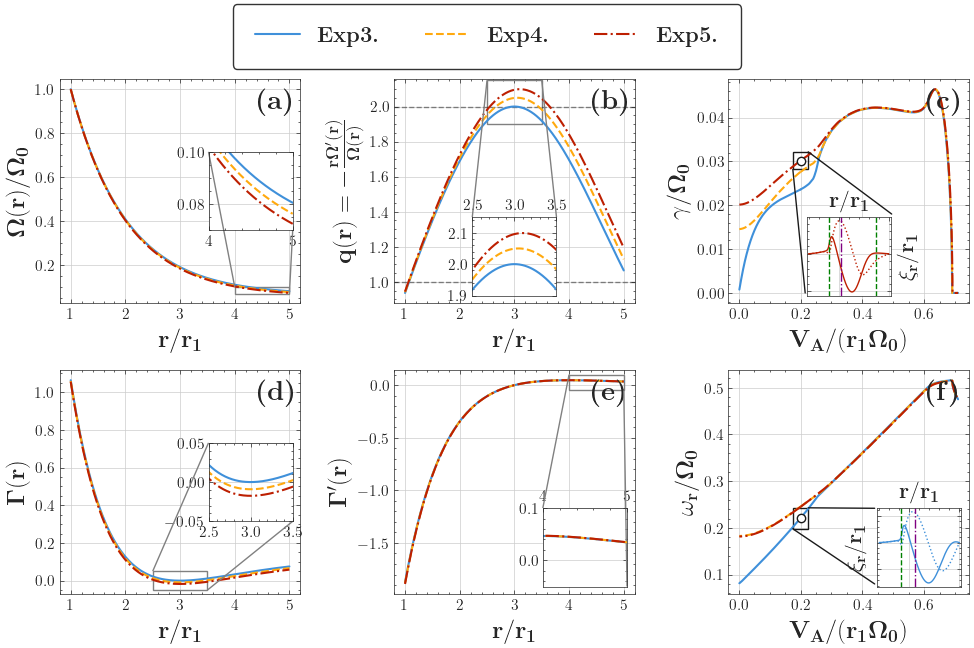

In [251]:
from matplotlib.lines import Line2D
fig, axes = plt.subplots(2,3, figsize=(10, 6))


axes[0,0].plot(r, W_exp2(r), label = 'Exp1', color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[0,0].plot(r, W_exp3(r), label = 'Exp2', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,0].plot(r, W_exp4(r), label = 'Exp3', color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[0,0].set_ylabel(r'$\mathbf{\Omega(r)/\Omega_0}$', fontsize = 18)

axes[0,1].axhline(y = 1, linestyle = '--', color = 'k', alpha = 0.5)
axes[0,1].axhline(y = 2, linestyle = '--', color = 'k', alpha = 0.5)
axes[0,1].plot(r, -r*Wp_exp2(r)/W_exp2(r), label = 'Exp2', color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp3(r)/W_exp3(r), label = 'Exp3', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_exp4(r)/W_exp4(r), label = 'Exp4', color = color_arr[2], linestyle = '-.', linewidth = 1.5)
# axes[0,1].plot(r, -r*Wp_exp1(r)/W_exp1(r), label = 'Exp1', color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[0,1].set_ylabel(r"$\mathbf{q(r) = -\frac{r\Omega'(r)}{\Omega(r)}}$", fontsize = 18)


axes[1,0].plot(r, 1/r*(2*r*W_exp2(r) + r**2*Wp_exp2(r)), color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp3(r) + r**2*Wp_exp3(r)), color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_exp4(r) + r**2*Wp_exp4(r)), color = color_arr[2], linestyle = '-.', linewidth = 1.5)
# axes[1,0].plot(r, 1/r*(2*r*W_exp1(r) + r**2*Wp_exp1(r)), label = 'Exp1', color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[1,0].set_ylabel(r'$\mathbf{\Gamma(r)}$', fontsize = 18)


axes[1,1].plot(r, -1/r**2*(2*r*W_exp2(r) + r**2*Wp_exp2(r)) + 1/r*(2*W_exp2(r) + 4*r*Wp_exp2(r) + r**2*Wpp_exp2(r)), label = 'Exp2', color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp3(r) + r**2*Wp_exp3(r)) + 1/r*(2*W_exp3(r) + 4*r*Wp_exp3(r) + r**2*Wpp_exp3(r)), label = 'Exp3', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_exp4(r) + r**2*Wp_exp4(r)) + 1/r*(2*W_exp4(r) + 4*r*Wp_exp4(r) + r**2*Wpp_exp4(r)), label = 'Exp4', color = color_arr[2], linestyle = '-.', linewidth = 1.5)
# axes[1,1].plot(r, -1/r**2*(2*r*W_exp1(r) + r**2*Wp_exp1(r)) + 1/r*(2*W_exp1(r) + 4*r*Wp_exp1(r) + r**2*Wpp_exp1(r)), label = 'Exp1', color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[1,1].set_ylabel(r"$\mathbf{\Gamma'(r)}$", fontsize = 18)

axes[0,0].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)
axes[0,1].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)
axes[1,0].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)
axes[1,1].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)

############# Grs
axes[0,2].plot(VA_l_MCI1_Bz_Exp6, gr_1k1_MCI_l_Bz_Exp6, color = color_arr[0], label = 'Exp3', linestyle = '-', linewidth = 1.5)
axes[0,2].plot(VA_h_MCI1_Bz_Exp6[0:len(VA_h_MCI1_Bz_Exp6)-600], gr_1k1_MCI_h_Bz_Exp6[0:len(VA_h_MCI1_Bz_Exp6)-600], color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[0,2].plot(VA_l_MCI1_Bz_Exp8, gr_1k1_MCI_l_Bz_Exp8, color = color_arr[1], label = 'Exp4', linestyle = '--', linewidth = 1.5)
axes[0,2].plot(VA_h_MCI1_Bz_Exp8[0:len(VA_h_MCI1_Bz_Exp6)-600], gr_1k1_MCI_h_Bz_Exp8[0:len(VA_h_MCI1_Bz_Exp6)-600], color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,2].plot(VA_l_MCI1_Bz_Exp7, gr_1k1_MCI_l_Bz_Exp7, color = color_arr[2], label = 'Exp5', linestyle = '-.', linewidth = 1.5)
axes[0,2].plot(VA_h_MCI1_Bz_Exp7[0:len(VA_h_MCI1_Bz_Exp6)-600], gr_1k1_MCI_h_Bz_Exp7[0:len(VA_h_MCI1_Bz_Exp6)-600], color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[0,2].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 18)
axes[0,2].set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', fontsize = 18)

axes[1,2].plot(VA_l_MCI1_Bz_Exp6, freq_1k1_MCI_l_Bz_Exp6, color = color_arr[0], label = 'Exp3', linestyle = '-', linewidth = 1.5)
axes[1,2].plot(VA_h_MCI1_Bz_Exp6[0:len(VA_h_MCI1_Bz_Exp6)-600], freq_1k1_MCI_h_Bz_Exp6[0:len(VA_h_MCI1_Bz_Exp6)-600], color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[1,2].plot(VA_l_MCI1_Bz_Exp8, freq_1k1_MCI_l_Bz_Exp8, color = color_arr[1], label = 'Exp3', linestyle = '--', linewidth = 1.5)
axes[1,2].plot(VA_h_MCI1_Bz_Exp8[0:len(VA_h_MCI1_Bz_Exp6)-600], freq_1k1_MCI_h_Bz_Exp8[0:len(VA_h_MCI1_Bz_Exp6)-600], color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,2].plot(VA_l_MCI1_Bz_Exp7, freq_1k1_MCI_l_Bz_Exp7, color = color_arr[2], label = 'Exp3', linestyle = '-.', linewidth = 1.5)
axes[1,2].plot(VA_h_MCI1_Bz_Exp7[0:len(VA_h_MCI1_Bz_Exp6)-600], freq_1k1_MCI_h_Bz_Exp7[0:len(VA_h_MCI1_Bz_Exp6)-600], color = color_arr[2], linestyle = '-.', linewidth = 1.5)
axes[1,2].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 18)
axes[1,2].set_ylabel(r'$\mathbf{\omega_r/\Omega_0}$', fontsize = 18)

line1 = Line2D([0], [0], color=color_arr[0], linestyle='-', linewidth = 1.5)
line2 = Line2D([0], [0], color=color_arr[1], linestyle='--', linewidth = 1.5)
line3 = Line2D([0], [0], color=color_arr[2], linestyle='-.', linewidth = 1.5)
line4 = Line2D([0], [0], color=color_arr[4], linestyle=':', linewidth = 1.5)

axes[0,0].text(0.82, 0.96, r'\textbf{(a)}', transform=axes[0,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[0,1].text(0.82, 0.96, r'\textbf{(b)}', transform=axes[0,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[0,2].text(0.82, 0.96, r'\textbf{(c)}', transform=axes[0,2].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[1,0].text(0.82, 0.96, r'\textbf{(d)}', transform=axes[1,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[1,1].text(0.82, 0.96, r'\textbf{(e)}', transform=axes[1,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[1,2].text(0.82, 0.96, r'\textbf{(f)}', transform=axes[1,2].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')

###################### Top right inset plot
ax_inset = inset_axes(axes[0,2], width="35%", height="35%", loc='lower center')
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\xi_r/r_1}$", fontsize = 16)
ax_inset.plot(r_Kep_MCI, u_Kep_MCI.real, color = color_arr[2])
ax_inset.plot(r_Kep_MCI, u_Kep_MCI.imag, color = color_arr[2], linestyle = 'dotted')
plt.axvline(x=r_vec_Kep_MCI[0], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_Kep_MCI[1], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_Kep_MCI[4], linestyle = '-.', color = 'purple')
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
ax_inset.legend()
ax_inset.yaxis.set_label_position('right')

dx2 = 0.05
dy2 = 0.004
x2 = 0.2-dx2/2
y2 = guess_MCI.imag - dy2/2
rect = patches.Rectangle((x2, y2), dx2, dy2, linewidth=1, edgecolor='k', facecolor='none')
axes[0,2].add_patch(rect)

##### MARKS ON GRAPH
axes[0,2].plot(0.2, guess_MCI.imag, marker = 'o', color = 'w', markeredgecolor = 'k')

# ### Lines connecting graphs (MCI)
lineX = [x2, 0.215]
lineY = [y2, 0.00]
axes[0,2].plot(lineX, lineY, color = 'k', linestyle = '-')

lineX2 = [x2+dx2, 0.495]
lineY2 = [y2+dy2, 0.018]
axes[0,2].plot(lineX2, lineY2, color = 'k', linestyle = '-')

###################### Bottom right inset plot
ax_inset = inset_axes(axes[1,2], width="35%", height="35%", loc='lower right')
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\xi_r/r_1}$", fontsize = 16)
ax_inset.plot(r_Kep_MCI_2, u_Kep_MCI_2.real, color = color_arr[0])
ax_inset.plot(r_Kep_MCI_2, u_Kep_MCI_2.imag, color = color_arr[0], linestyle = 'dotted')
plt.axvline(x=r_vec_Kep_MCI_2[0], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_Kep_MCI_2[1], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_Kep_MCI_2[4], linestyle = '-.', color = 'purple')
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
ax_inset.legend()
# ax_inset.yaxis.set_label_position('right')

dx2 = 0.05
dy2 = 0.045
x2 = 0.2-dx2/2
y2 = guess_MCI_2.real - dy2/2
rect = patches.Rectangle((x2, y2), dx2, dy2, linewidth=1, edgecolor='k', facecolor='none')
axes[1,2].add_patch(rect)

##### MARKS ON GRAPH
axes[1,2].plot(0.2, guess_MCI_2.real, marker = 'o', color = 'w', markeredgecolor = 'k')

# ### Lines connecting graphs (MCI)
lineX = [x2, 0.44]
lineY = [y2, 0.08]
axes[1,2].plot(lineX, lineY, color = 'k', linestyle = '-')

lineX2 = [x2+dx2, 0.44]
lineY2 = [y2+dy2, 0.242]
axes[1,2].plot(lineX2, lineY2, color = 'k', linestyle = '-')

###################### q(r) Inset Plot
# Define Zoom-in Range
y_min, y_max = 1.9, 2.15  # Adjust based on your data
zoom_start, zoom_end = 2.5, 3.5
ax_inset = inset_axes(axes[0,1], width="35%", height="35%", loc="lower center")  # Adjust size and position
ax_inset.plot(r, -r*Wp_exp2(r)/W_exp2(r), color = color_arr[0], linestyle = '-', linewidth = 1.5)
ax_inset.plot(r, -r*Wp_exp3(r)/W_exp3(r), color = color_arr[1], linestyle = '--', linewidth = 1.5)
ax_inset.plot(r, -r*Wp_exp4(r)/W_exp4(r), color = color_arr[2], linestyle = '-.', linewidth = 1.5)
ax_inset.set_xlim(zoom_start,zoom_end)
ax_inset.set_ylim(y_min,y_max)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
mark_inset(axes[0,1], ax_inset, loc1=2, loc2=1, fc="none", ec="0.5")

###################### G(r) Inset Plot
# Define Zoom-in Range
y_min, y_max = -0.05, 0.05  # Adjust based on your data
zoom_start, zoom_end = 2.5, 3.5
ax_inset = inset_axes(axes[1,0], width="35%", height="35%", loc="center right")  # Adjust size and position
ax_inset.plot(r, 1/r*(2*r*W_exp2(r) + r**2*Wp_exp2(r)), color = color_arr[0], linestyle = '-', linewidth = 1.5)
ax_inset.plot(r, 1/r*(2*r*W_exp3(r) + r**2*Wp_exp3(r)), color = color_arr[1], linestyle = '--', linewidth = 1.5)
ax_inset.plot(r, 1/r*(2*r*W_exp4(r) + r**2*Wp_exp4(r)), color = color_arr[2], linestyle = '-.', linewidth = 1.5)
ax_inset.set_xlim(zoom_start,zoom_end)
ax_inset.set_ylim(y_min,y_max)
mark_inset(axes[1,0], ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")

###################### Omega(r) Inset Plot
# Define Zoom-in Range
y_min, y_max = 0.07,0.1  # Adjust based on your data
zoom_start, zoom_end = 4, 5
ax_inset = inset_axes(axes[0,0], width="35%", height="35%", loc="center right")  # Adjust size and position
ax_inset.plot(r, W_exp2(r), color = color_arr[0], linestyle = '-', linewidth = 1.5)
ax_inset.plot(r, W_exp3(r), color = color_arr[1], linestyle = '--', linewidth = 1.5)
ax_inset.plot(r, W_exp4(r), color = color_arr[2], linestyle = '-.', linewidth = 1.5)
ax_inset.set_xlim(zoom_start,zoom_end)
ax_inset.set_ylim(y_min,y_max)
mark_inset(axes[0,0], ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")

###################### G'(r) Inset Plot
# Define Zoom-in Range
y_min, y_max = -0.05,0.1  # Adjust based on your data
zoom_start, zoom_end = 4, 5
ax_inset = inset_axes(axes[1,1], width="35%", height="35%", loc="lower right")  # Adjust size and position
ax_inset.plot(r, -1/r**2*(2*r*W_exp2(r) + r**2*Wp_exp2(r)) + 1/r*(2*W_exp2(r) + 4*r*Wp_exp2(r) + r**2*Wpp_exp2(r)), color = color_arr[0], linestyle = '-', linewidth = 1.5)
ax_inset.plot(r, -1/r**2*(2*r*W_exp3(r) + r**2*Wp_exp3(r)) + 1/r*(2*W_exp3(r) + 4*r*Wp_exp3(r) + r**2*Wpp_exp3(r)), color = color_arr[1], linestyle = '--', linewidth = 1.5)
ax_inset.plot(r, -1/r**2*(2*r*W_exp4(r) + r**2*Wp_exp4(r)) + 1/r*(2*W_exp4(r) + 4*r*Wp_exp4(r) + r**2*Wpp_exp4(r)), color = color_arr[2], linestyle = '-.', linewidth = 1.5)
ax_inset.set_xlim(zoom_start,zoom_end)
ax_inset.set_ylim(y_min,y_max)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
mark_inset(axes[1,1], ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")

lines = [line1, line2, line3, line4]
labels = [r'\textbf{Exp3.}', r'\textbf{Exp4.}', r'\textbf{Exp5.}']
fig.legend(lines, labels, loc='lower center', ncol=5, 
           bbox_to_anchor=(0.5, 0.95),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 16)

plt.tight_layout()
plt.savefig(f'Vorticity/Exponential-Configuration-Hyd.pdf')
plt.show()



#     elif keplerian == 'exp6':
#         a = 0.9366210025563255
#         W = a*np.exp(1-r) + 1-a
#         Wp = -a*np.exp(1-r)
#         Wpp = a*np.exp(1-r)

#     elif keplerian == 'exp8':
#         a = 0.9409132827360274
#         W = a*np.exp(1-r) + 1-a
#         Wp = -a*np.exp(1-r)
#         Wpp = a*np.exp(1-r)

# elif keplerian == 'exp7':
#         a = 0.9448239074457745
#         W = a*np.exp(1-r) + 1-a
#         Wp = -a*np.exp(1-r)
#         Wpp = a*np.exp(1-r)

In [248]:
print(np.min(v_exp2))
print(np.min(v_exp3))
print(np.min(v_exp4))

1.2621868555877262e-07
-0.009165331094588398
-0.017515826016814895


# HD Perturbations (Tanh)

### Import

In [15]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-Tanhv3-5r1-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-Tanhv3-5r1-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-Tanhv3-5r1-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-Tanhv3-5r1-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

gr_1k1_MCI_l_Bz_Tanhv4 = []
gr_1k1_MCI_h_Bz_Tanhv4 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_Bz_Tanhv4.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_Tanhv4.append(guesses_1k1_MCI_h[j].imag)    

freq_1k1_MCI_l_Bz_Tanhv4 = []
freq_1k1_MCI_h_Bz_Tanhv4 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_Bz_Tanhv4.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    freq_1k1_MCI_h_Bz_Tanhv4.append(guesses_1k1_MCI_h[j].real)    
    
with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_Tanhv4 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_Tanhv4 = pickle.load(f)  

In [16]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-Tanhv8-5r1-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-Tanhv8-5r1-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-Tanhv8-5r1-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-Tanhv8-5r1-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

gr_1k1_MCI_l_Bz_Tanhv8 = []
gr_1k1_MCI_h_Bz_Tanhv8 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_Bz_Tanhv8.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_Tanhv8.append(guesses_1k1_MCI_h[j].imag)    

freq_1k1_MCI_l_Bz_Tanhv8 = []
freq_1k1_MCI_h_Bz_Tanhv8 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_Bz_Tanhv8.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    freq_1k1_MCI_h_Bz_Tanhv8.append(guesses_1k1_MCI_h[j].real)    
    
with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_Tanhv8 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_Tanhv8 = pickle.load(f) 

In [17]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-Tanhv9-5r1-Bz.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-Tanhv9-5r1-Bz.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-Tanhv9-5r1-Bz.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-Tanhv9-5r1-Bz.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

gr_1k1_MCI_l_Bz_Tanhv9 = []
gr_1k1_MCI_h_Bz_Tanhv9 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_Bz_Tanhv9.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_Tanhv9.append(guesses_1k1_MCI_h[j].imag)    

freq_1k1_MCI_l_Bz_Tanhv9 = []
freq_1k1_MCI_h_Bz_Tanhv9 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_Bz_Tanhv9.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    freq_1k1_MCI_h_Bz_Tanhv9.append(guesses_1k1_MCI_h[j].real)    
    
with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_Tanhv9 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_Tanhv9 = pickle.load(f)  

In [18]:
elecd_str = '0'


guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesu_' + elecd_str + '-Tanhv10-5r1-Bz-f.pkl'
guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_guessesd_' + elecd_str + '-Tanhv10-5r1-Bz-f.pkl'
VA_u = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANUP_' + elecd_str + '-Tanhv10-5r1-Bz-f.pkl'
VA_d = f'Shooting-AlfvenSweep-Scaled-Data/MCI_1k1_VANDOWN_' + elecd_str + '-Tanhv10-5r1-Bz-f.pkl'

with open(guesses_str_d, 'rb') as f:
    guesses_1k1_MCI_l = pickle.load(f)    
with open(guesses_str_u, 'rb') as f:
    guesses_1k1_MCI_h = pickle.load(f)    

gr_1k1_MCI_l_Bz_Tanhv10 = []
gr_1k1_MCI_h_Bz_Tanhv10 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    gr_1k1_MCI_l_Bz_Tanhv10.append(guesses_1k1_MCI_l[j].imag)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    gr_1k1_MCI_h_Bz_Tanhv10.append(guesses_1k1_MCI_h[j].imag)    

freq_1k1_MCI_l_Bz_Tanhv10 = []
freq_1k1_MCI_h_Bz_Tanhv10 = []
for j in range(0,len(guesses_1k1_MCI_l) ):
    freq_1k1_MCI_l_Bz_Tanhv10.append(guesses_1k1_MCI_l[j].real)
    
for j in range(0,len(guesses_1k1_MCI_h) ):
    freq_1k1_MCI_h_Bz_Tanhv10.append(guesses_1k1_MCI_h[j].real)    
    
with open(VA_d, 'rb') as f:
    VA_l_MCI1_Bz_Tanhv10 = pickle.load(f)    
with open(VA_u, 'rb') as f:
    VA_h_MCI1_Bz_Tanhv10 = pickle.load(f)  

### Configuration

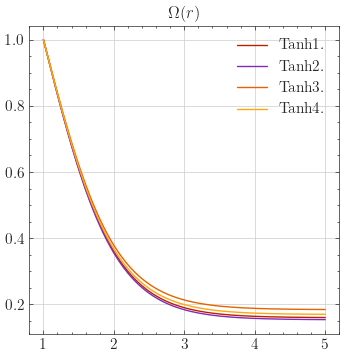

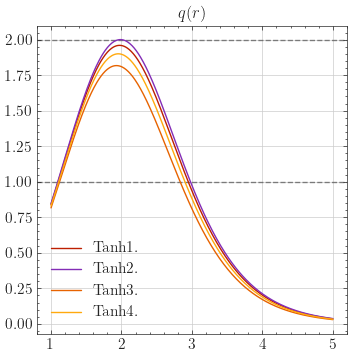

In [19]:
dt  = 1/100
r = np.arange(1,5+dt, dt)
r_arr = r
### Tanh4 Profile (Minimal R ratio)
a = 0.8400
W_Tanh4 = i2.CubicSpline(r, a*np.tanh(1-r)+1)
Wp_Tanh4 = W_Tanh4.derivative()
Wpp_Tanh4 = Wp_Tanh4.derivative()
v_Tanh4 = 1/r*(i2.CubicSpline(r, r**2*W_Tanh4(r)).derivative())(r) 
vp_Tanh4 = i2.CubicSpline(r, v_Tanh4).derivative()(r)


### Tanh5 Profile (Kep. R Ratio)
a = 0.8463
W_Tanh8 = i2.CubicSpline(r, a*np.tanh(1-r)+1)
Wp_Tanh8 = W_Tanh8.derivative()
Wpp_Tanh8 = Wp_Tanh8.derivative()
v_Tanh8 = 1/r*(i2.CubicSpline(r, r**2*W_Tanh8(r)).derivative())(r) 
vp_Tanh8 = i2.CubicSpline(r, v_Tanh8).derivative()(r)

### Tanh5 Profile (Kep. R Ratio)
a = 0.8158134053621449
W_Tanh9 = i2.CubicSpline(r, a*np.tanh(1-r)+1)
Wp_Tanh9 = W_Tanh9.derivative()
Wpp_Tanh9 = Wp_Tanh9.derivative()
v_Tanh9 = 1/r*(i2.CubicSpline(r, r**2*W_Tanh9(r)).derivative())(r) 
vp_Tanh9 = i2.CubicSpline(r, v_Tanh9).derivative()(r)

### Tanh5 Profile (Kep. R Ratio)
a = 0.8303
W_Tanh10 = i2.CubicSpline(r, a*np.tanh(1-r)+1)
Wp_Tanh10 = W_Tanh10.derivative()
Wpp_Tanh10 = Wp_Tanh10.derivative()
v_Tanh10 = 1/r*(i2.CubicSpline(r, r**2*W_Tanh10(r)).derivative())(r) 
vp_Tanh10 = i2.CubicSpline(r, v_Tanh10).derivative()(r)

plt.figure(figsize = (4,4))
plt.plot(r, W_Tanh4(r), label = 'Tanh1.', color = color_arr[2])
plt.plot(r, W_Tanh8(r), label = 'Tanh2.', color = color_arr[4])
plt.plot(r, W_Tanh9(r), label = 'Tanh3.', color = color_arr[6])
plt.plot(r, W_Tanh10(r), label = 'Tanh4.', color = color_arr[1])

plt.title(r'$\Omega(r)$')
plt.legend()
plt.show()

R_Tanh4 = np.average(vp_Tanh4)/np.average(v_Tanh4)
R_Tanh8 = np.average(vp_Tanh8)/np.average(v_Tanh8)
R_Tanh9 = np.average(vp_Tanh9)/np.average(v_Tanh9)

plt.figure(figsize = (4,4))

plt.axhline(y = 1, linestyle = '--', color = 'k', alpha = 0.5)
plt.axhline(y = 2, linestyle = '--', color = 'k', alpha = 0.5)
plt.plot(r, -r*Wp_Tanh4(r)/W_Tanh4(r), label = 'Tanh1.', color = color_arr[2])
plt.plot(r, -r*Wp_Tanh8(r)/W_Tanh8(r), label = 'Tanh2.', color = color_arr[4])
plt.plot(r, -r*Wp_Tanh9(r)/W_Tanh9(r), label = 'Tanh3.', color = color_arr[6])
plt.plot(r, -r*Wp_Tanh10(r)/W_Tanh10(r), label = 'Tanh4.', color = color_arr[1])

plt.title(r'$q(r)$')
plt.legend()
plt.show()


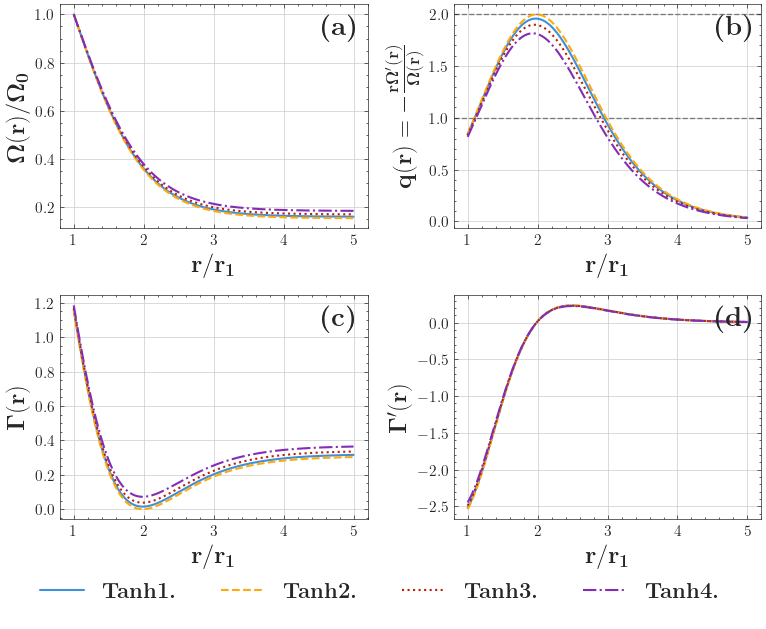

In [20]:
from matplotlib.lines import Line2D
fig, axes = plt.subplots(2,2, figsize=(8, 6))

axes[0,0].plot(r, W_Tanh4(r), label = 'Tanh1.', color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[0,0].plot(r, W_Tanh8(r), label = 'Tanh2.', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,0].plot(r, W_Tanh10(r), label = 'Tanh3.', color = color_arr[2], linestyle = ':', linewidth = 1.5)
axes[0,0].plot(r, W_Tanh9(r), label = 'Tanh3.', color = color_arr[4], linestyle = '-.', linewidth = 1.5)
# axes[0,0].plot(r, W_exp1(r), label = 'Exp4', color = color_arr[4], linestyle = ':', linewidth = 1.5)
axes[0,0].set_ylabel(r'$\mathbf{\Omega(r)/\Omega_0}$', fontsize = 18)

axes[0,1].axhline(y = 1, linestyle = '--', color = 'k', alpha = 0.5)
axes[0,1].axhline(y = 2, linestyle = '--', color = 'k', alpha = 0.5)
axes[0,1].plot(r, -r*Wp_Tanh4(r)/W_Tanh4(r), label = 'Tanh1.', color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_Tanh8(r)/W_Tanh8(r), label = 'Tanh2.', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_Tanh10(r)/W_Tanh10(r), label = 'Tanh3.', color = color_arr[2], linestyle = ':', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_Tanh9(r)/W_Tanh9(r), label = 'Tanh3.', color = color_arr[4], linestyle = '-.', linewidth = 1.5)

axes[0,1].set_ylabel(r"$\mathbf{q(r) = -\frac{r\Omega'(r)}{\Omega(r)}}$", fontsize = 18)


axes[1,0].plot(r, 1/r*(2*r*W_Tanh4(r) + r**2*Wp_Tanh4(r)), color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_Tanh8(r) + r**2*Wp_Tanh8(r)), color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_Tanh10(r) + r**2*Wp_Tanh10(r)), color = color_arr[2], linestyle = ':', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_Tanh9(r) + r**2*Wp_Tanh9(r)), color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[1,0].set_ylabel(r'$\mathbf{\Gamma(r)}$', fontsize = 18)


axes[1,1].plot(r, -1/r**2*(2*r*W_Tanh4(r) + r**2*Wp_Tanh4(r)) + 1/r*(2*W_Tanh4(r) + 4*r*Wp_Tanh4(r) + r**2*Wpp_Tanh4(r)), label = 'Tanh1.', color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_Tanh8(r) + r**2*Wp_Tanh8(r)) + 1/r*(2*W_Tanh8(r) + 4*r*Wp_Tanh8(r) + r**2*Wpp_Tanh8(r)), label = 'Tanh2.', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_Tanh10(r) + r**2*Wp_Tanh10(r)) + 1/r*(2*W_Tanh10(r) + 4*r*Wp_Tanh10(r) + r**2*Wpp_Tanh10(r)), label = 'Tanh3.', color = color_arr[2], linestyle = ':', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_Tanh9(r) + r**2*Wp_Tanh9(r)) + 1/r*(2*W_Tanh9(r) + 4*r*Wp_Tanh9(r) + r**2*Wpp_Tanh9(r)), label = 'Tanh3.', color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[1,1].set_ylabel(r"$\mathbf{\Gamma'(r)}$", fontsize = 18)

axes[0,0].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)
axes[0,1].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)
axes[1,0].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)
axes[1,1].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)

line1 = Line2D([0], [0], color=color_arr[0], linestyle='-', linewidth = 1.5)
line2 = Line2D([0], [0], color=color_arr[1], linestyle='--', linewidth = 1.5)
line3 = Line2D([0], [0], color=color_arr[2], linestyle=':', linewidth = 1.5)
line4 = Line2D([0], [0], color=color_arr[4], linestyle='-.', linewidth = 1.5)
# line5 = Line2D([0], [0], color=color_arr[6], linestyle=(0, (3, 1, 1, 1, 1, 1)), linewidth = 1.5)

axes[0,0].text(0.85, 0.96, r'\textbf{(a)}', transform=axes[0,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[0,1].text(0.85, 0.96, r'\textbf{(b)}', transform=axes[0,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[1,0].text(0.85, 0.96, r'\textbf{(c)}', transform=axes[1,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[1,1].text(0.85, 0.96, r'\textbf{(d)}', transform=axes[1,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')


lines = [line1, line2, line3, line4]
labels = [r'\textbf{Tanh1.}', r'\textbf{Tanh2.}', r'\textbf{Tanh3.}', r'\textbf{Tanh4.}']
fig.legend(lines, labels, loc='lower center', ncol=5, 
           bbox_to_anchor=(0.5, -0.1),  # Position the legend below the plot
           frameon=False,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 16)

plt.tight_layout()
plt.savefig(f'Vorticity/Tanh-Configuration-Hyd.pdf')
plt.show()

### GRS

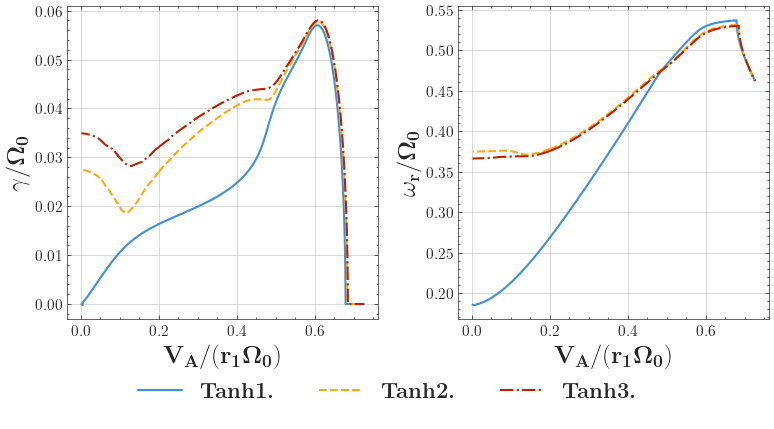

In [21]:
fig, axes = plt.subplots(1,2, figsize=(8, 4))


axes[0].plot(VA_l_MCI1_Bz_Tanhv9, gr_1k1_MCI_l_Bz_Tanhv9, color = color_arr[0], label = 'Tanh2.', linestyle = '-', linewidth = 1.5)
axes[0].plot(VA_h_MCI1_Bz_Tanhv9[0:len(VA_h_MCI1_Bz_Tanhv4)-50], gr_1k1_MCI_h_Bz_Tanhv9[0:len(VA_h_MCI1_Bz_Tanhv4)-50], color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[0].plot(VA_l_MCI1_Bz_Tanhv4, gr_1k1_MCI_l_Bz_Tanhv4, color = color_arr[1], label = 'Tanh3.', linestyle = '--', linewidth = 1.5)
axes[0].plot(VA_h_MCI1_Bz_Tanhv4[0:len(VA_h_MCI1_Bz_Tanhv4)-50], gr_1k1_MCI_h_Bz_Tanhv4[0:len(VA_h_MCI1_Bz_Tanhv4)-50], color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0].plot(VA_l_MCI1_Bz_Tanhv8, gr_1k1_MCI_l_Bz_Tanhv8, color = color_arr[2], label = 'Tanh1.', linestyle = '-.', linewidth = 1.5)
axes[0].plot(VA_h_MCI1_Bz_Tanhv8[0:len(VA_h_MCI1_Bz_Tanhv4)-50], gr_1k1_MCI_h_Bz_Tanhv8[0:len(VA_h_MCI1_Bz_Tanhv4)-50], color = color_arr[2], linestyle = '-.', linewidth = 1.5)


axes[0].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 18)
axes[0].set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', fontsize = 18)

axes[0].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 18)
axes[0].set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', fontsize = 18)

axes[1].plot(VA_l_MCI1_Bz_Tanhv9, freq_1k1_MCI_l_Bz_Tanhv9, color = color_arr[0], label = 'Tanh2.', linestyle = '-', linewidth = 1.5)
axes[1].plot(VA_h_MCI1_Bz_Tanhv9[0:len(VA_h_MCI1_Bz_Tanhv4)-50], freq_1k1_MCI_h_Bz_Tanhv9[0:len(VA_h_MCI1_Bz_Tanhv4)-50], color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[1].plot(VA_l_MCI1_Bz_Tanhv4, freq_1k1_MCI_l_Bz_Tanhv4, color = color_arr[1], label = 'Tanh3.', linestyle = '--', linewidth = 1.5)
axes[1].plot(VA_h_MCI1_Bz_Tanhv4[0:len(VA_h_MCI1_Bz_Tanhv4)-50], freq_1k1_MCI_h_Bz_Tanhv4[0:len(VA_h_MCI1_Bz_Tanhv4)-50], color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1].plot(VA_l_MCI1_Bz_Tanhv8, freq_1k1_MCI_l_Bz_Tanhv8, color = color_arr[2], label = 'Tanh1.', linestyle = '-.', linewidth = 1.5)
axes[1].plot(VA_h_MCI1_Bz_Tanhv8[0:len(VA_h_MCI1_Bz_Tanhv4)-50], freq_1k1_MCI_h_Bz_Tanhv8[0:len(VA_h_MCI1_Bz_Tanhv4)-50], color = color_arr[2], linestyle = '-.', linewidth = 1.5)

axes[1].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 18)
axes[1].set_ylabel(r'$\mathbf{\omega_r/\Omega_0}$', fontsize = 18)

line1 = Line2D([0], [0], color=color_arr[0], linestyle='-', linewidth = 1.5)
line2 = Line2D([0], [0], color=color_arr[1], linestyle='--', linewidth = 1.5)
line3 = Line2D([0], [0], color=color_arr[2], linestyle='-.', linewidth = 1.5)
line4 = Line2D([0], [0], color=color_arr[4], linestyle=':', linewidth = 1.5)

lines = [line1, line2, line3, line4]
labels = [r'\textbf{Tanh1.}', r'\textbf{Tanh2.}', r'\textbf{Tanh3.}']
fig.legend(lines, labels, loc='lower center', ncol=3, 
           bbox_to_anchor=(0.5, -0.15),  # Position the legend below the plot
           frameon=False,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 16)

plt.tight_layout()
plt.savefig(f'Vorticity/Tanh-Configuration-Combined-Hyd.pdf')
plt.show()

### Mode Struc

In [36]:
# Get mode structure for MCI 1k1 (Kep.)
##### SET PARAMETERS #####
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

r1 = 0.1
q = 1/2
type = 'MRI'
elecd = 0
eta = elecd
Pm = 0
m = 1
kn = 1
kz = kn*np.pi/(4)
VA_N = 0.2
VA_N = 0.2
Bz = VA_N* (r1*Omega0*np.sqrt(rho*mu_0)*10000)
B0 = 0


r1 = 1
r2 = 5
r3 = 3.5
rp = np.linspace(0.1, r3, 50000)

r = np.linspace(r1, r2, 500)
q_mag = np.pi**2
q2r_sc = q_mag*1/r**2
q2rp_sc = q_mag*(-2/r**3)
q2rpp_sc = q_mag*(6/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))

ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)

reso = 5000
############## Kep
##### SET PARAMETERS #####
flow_type = 'Kep'

if(flow_type == 'Kep'):
    flow_select = True
elif(flow_type == 'Tanh'):
    flow_select = 'tanh'
elif(flow_type == 'Sat'):
    flow_select = 'saturated'
elif(flow_type == 'Sh2'):
    flow_select = 'Sh2'

flow_select = 'tanhv8'
guess = 0.26838714964661303+0.016361723760245177j

guess = 0.3661236850907722+0.03491770681962249j
guess_MCI = guess

VA_N = 0.0
Bz = VA_N* (r1*Omega0*np.sqrt(rho*mu_0)*10000)

# print(guess_MCI)
# guess = guess_MCI
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Kep_MCI = np.sqrt(y.t)
u_Kep_MCI = y.y[0]
r_vec_Kep_MCI = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)

      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: (0.36612368508998994+0.034917706819485014j)
         method: secant


In [52]:
# Get mode structure for MCI 1k1 (Kep.)
##### SET PARAMETERS #####
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

r1 = 0.1
q = 1/2
type = 'MRI'
elecd = 0
eta = elecd
Pm = 0
m = 1
kn = 1
kz = kn*np.pi/(4)
VA_N = 0.2
VA_N = 0.2
Bz = VA_N* (r1*Omega0*np.sqrt(rho*mu_0)*10000)
B0 = 0


r1 = 1
r2 = 5
r3 = 3.5
rp = np.linspace(0.1, r3, 50000)

r = np.linspace(r1, r2, 500)
q_mag = np.pi**2
q2r_sc = q_mag*1/r**2
q2rp_sc = q_mag*(-2/r**3)
q2rpp_sc = q_mag*(6/r**4)
q2i_sc = q_mag*np.zeros(len(r))
q2ip_sc = q_mag*np.zeros(len(r))
q2ipp_sc = q_mag*np.zeros(len(r))

ones_arr = np.ones(len(r)) 
k2 = (q2r_sc + 1j*q2i_sc) + m**2/r**2 + kz**2 * ones_arr
k2p = ((q2rp_sc + 1j*q2ip_sc) - 2 * m**2/r**3) ## just changed from d/dr
k2pp = ((q2rpp_sc + 1j*q2ipp_sc) + 6 * m**2/r**4) ## just changed from d/dr

k2r_curr = i2.CubicSpline(r, k2.real)
k2i_curr = i2.CubicSpline(r, k2.imag)
k2rp_curr = i2.CubicSpline(r, k2p.real)
k2ip_curr = i2.CubicSpline(r, k2p.imag)
k2rpp_curr = i2.CubicSpline(r, k2pp.real)
k2ipp_curr = i2.CubicSpline(r, k2pp.imag)

reso = 5000
############## Kep
##### SET PARAMETERS #####
flow_type = 'Kep'

if(flow_type == 'Kep'):
    flow_select = True
elif(flow_type == 'Tanh'):
    flow_select = 'tanh'
elif(flow_type == 'Sat'):
    flow_select = 'saturated'
elif(flow_type == 'Sh2'):
    flow_select = 'Sh2'

flow_select = 'tanhv9'
guess = 0.2683881338268367+0.01636374712310327j
guess_MCI_2 = guess


# flow_select = 'exp8'
# guess = (0.24563398281449117+0.0276024893192156j)
# guess_MCI = guess

# flow_select = 'exp7'
# guess = (0.24504817849350197+0.030181918544188956j)
# guess_MCI = guess

# print(guess_MCI)
# guess = guess_MCI
result = o.root_scalar(shoot_hain_v3, method='secant', x0=guess*(1.00005+1e-6j), x1=guess*(0.99995-1e-6j), args=(eta, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, kz, m, B0, Bz, flow_select, 1, r2,reso), maxiter=5000)
guess0 = result.root
y0 = [0.,(1.+1j)*1e-1]  
y = integ.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(guess,eta, k2r_curr, k2rp_curr, k2i_curr, k2ip_curr, m,kz,B0,Bz,flow_select, 1), max_step=24./reso)
r_Kep_MCI_2 = np.sqrt(y.t)
u_Kep_MCI_2 = y.y[0]
r_vec_Kep_MCI_2 = shr.resonance_res_krcomp_v8(r2, guess0, m, eta, Pm, k2r_curr, k2i_curr, kz, Bz, B0,flow_select, q)
print(result)

      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: (0.26838813382797233+0.01636374712298177j)
         method: secant


### Total

C:\Users\Alex\AppData\Local\Temp\ipykernel_55380\1809808640.py:150: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_inset.legend()
C:\Users\Alex\AppData\Local\Temp\ipykernel_55380\1809808640.py:186: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_inset.legend()
C:\Users\Alex\AppData\Local\Temp\ipykernel_55380\1809808640.py:220: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


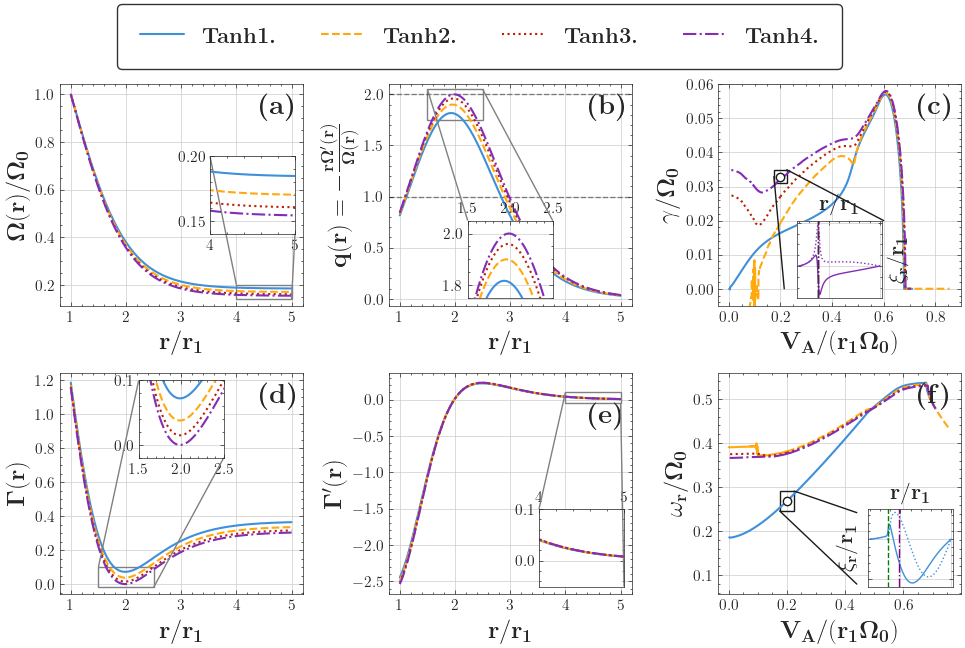

In [ ]:
from matplotlib.lines import Line2D
fig, axes = plt.subplots(2,3, figsize=(10, 6))

axes[0,0].plot(r, W_Tanh9(r), label = 'Exp1', color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[0,0].plot(r, W_Tanh10(r), label = 'Exp1', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,0].plot(r, W_Tanh4(r), label = 'Tanhv9', color = color_arr[2], linestyle = ':', linewidth = 1.5)
axes[0,0].plot(r, W_Tanh8(r), label = 'Tanhv4', color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[0,0].set_ylabel(r'$\mathbf{\Omega(r)/\Omega_0}$', fontsize = 18)

axes[0,1].axhline(y = 1, linestyle = '--', color = 'k', alpha = 0.5)
axes[0,1].axhline(y = 2, linestyle = '--', color = 'k', alpha = 0.5)
axes[0,1].plot(r, -r*Wp_Tanh9(r)/W_Tanh9(r), label = 'Tanhv9', color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_Tanh10(r)/W_Tanh10(r), label = 'Tanhv9', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_Tanh4(r)/W_Tanh4(r), label = 'Tanhv4', color = color_arr[2], linestyle = ':', linewidth = 1.5)
axes[0,1].plot(r, -r*Wp_Tanh8(r)/W_Tanh8(r), label = 'Tanhv8', color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[0,1].set_ylabel(r"$\mathbf{q(r) = -\frac{r\Omega'(r)}{\Omega(r)}}$", fontsize = 18)


axes[1,0].plot(r, 1/r*(2*r*W_Tanh9(r) + r**2*Wp_Tanh9(r)), color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_Tanh10(r) + r**2*Wp_Tanh10(r)), color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_Tanh4(r) + r**2*Wp_Tanh4(r)), color = color_arr[2], linestyle = ':', linewidth = 1.5)
axes[1,0].plot(r, 1/r*(2*r*W_Tanh8(r) + r**2*Wp_Tanh8(r)), color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[1,0].set_ylabel(r'$\mathbf{\Gamma(r)}$', fontsize = 18)


axes[1,1].plot(r, -1/r**2*(2*r*W_Tanh9(r) + r**2*Wp_Tanh9(r)) + 1/r*(2*W_Tanh9(r) + 4*r*Wp_Tanh9(r) + r**2*Wpp_Tanh9(r)), label = 'Tanhv9', color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_Tanh10(r) + r**2*Wp_Tanh10(r)) + 1/r*(2*W_Tanh10(r) + 4*r*Wp_Tanh10(r) + r**2*Wpp_Tanh10(r)), label = 'Tanhv9', color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_Tanh4(r) + r**2*Wp_Tanh4(r)) + 1/r*(2*W_Tanh4(r) + 4*r*Wp_Tanh4(r) + r**2*Wpp_Tanh4(r)), label = 'Tanhv4', color = color_arr[2], linestyle = ':', linewidth = 1.5)
axes[1,1].plot(r, -1/r**2*(2*r*W_Tanh8(r) + r**2*Wp_Tanh8(r)) + 1/r*(2*W_Tanh8(r) + 4*r*Wp_Tanh8(r) + r**2*Wpp_Tanh8(r)), label = 'Tanhv8', color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[1,1].set_ylabel(r"$\mathbf{\Gamma'(r)}$", fontsize = 18)

axes[0,0].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)
axes[0,1].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)
axes[1,0].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)
axes[1,1].set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 18)

############# Grs
axes[0,2].plot(VA_l_MCI1_Bz_Tanhv9, gr_1k1_MCI_l_Bz_Tanhv9, color = color_arr[0], label = 'Tanhv4', linestyle = '-', linewidth = 1.5)
axes[0,2].plot(VA_h_MCI1_Bz_Tanhv9[0:len(VA_h_MCI1_Bz_Tanhv9)-600], gr_1k1_MCI_h_Bz_Tanhv9[0:len(VA_h_MCI1_Bz_Tanhv9)-600], color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[0,2].plot(VA_l_MCI1_Bz_Tanhv10, gr_1k1_MCI_l_Bz_Tanhv10, color = color_arr[1], label = 'Tanhv4', linestyle = '--', linewidth = 1.5)
axes[0,2].plot(VA_h_MCI1_Bz_Tanhv10[0:len(VA_h_MCI1_Bz_Tanhv10)-1200], gr_1k1_MCI_h_Bz_Tanhv10[0:len(VA_h_MCI1_Bz_Tanhv10)-1200], color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[0,2].plot(VA_l_MCI1_Bz_Tanhv4, gr_1k1_MCI_l_Bz_Tanhv4, color = color_arr[2], label = 'Tanhv8', linestyle = ':', linewidth = 1.5)
axes[0,2].plot(VA_h_MCI1_Bz_Tanhv4[0:len(VA_h_MCI1_Bz_Tanhv9)-600], gr_1k1_MCI_h_Bz_Tanhv4[0:len(VA_h_MCI1_Bz_Tanhv9)-600], color = color_arr[2], linestyle = ':', linewidth = 1.5)
axes[0,2].plot(VA_l_MCI1_Bz_Tanhv8, gr_1k1_MCI_l_Bz_Tanhv8, color = color_arr[4], label = 'Exp5', linestyle = '-.', linewidth = 1.5)
axes[0,2].plot(VA_h_MCI1_Bz_Tanhv8[0:len(VA_h_MCI1_Bz_Tanhv9)-600], gr_1k1_MCI_h_Bz_Tanhv8[0:len(VA_h_MCI1_Bz_Tanhv9)-600], color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[0,2].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 18)
axes[0,2].set_ylabel(r'$\mathbf{\gamma/\Omega_0}$', fontsize = 18)
axes[0,2].set_ylim(-0.005,0.06)

axes[1,2].plot(VA_l_MCI1_Bz_Tanhv9, freq_1k1_MCI_l_Bz_Tanhv9, color = color_arr[0], label = 'Tanhv4', linestyle = '-', linewidth = 1.5)
axes[1,2].plot(VA_h_MCI1_Bz_Tanhv9[0:len(VA_h_MCI1_Bz_Tanhv9)-600], freq_1k1_MCI_h_Bz_Tanhv9[0:len(VA_h_MCI1_Bz_Tanhv9)-600], color = color_arr[0], linestyle = '-', linewidth = 1.5)
axes[1,2].plot(VA_l_MCI1_Bz_Tanhv10, freq_1k1_MCI_l_Bz_Tanhv10, color = color_arr[1], label = 'Tanhv4', linestyle = '-', linewidth = 1.5)
axes[1,2].plot(VA_h_MCI1_Bz_Tanhv10[0:len(VA_h_MCI1_Bz_Tanhv10)-2200], freq_1k1_MCI_h_Bz_Tanhv10[0:len(VA_h_MCI1_Bz_Tanhv10)-2200], color = color_arr[1], linestyle = '--', linewidth = 1.5)
axes[1,2].plot(VA_l_MCI1_Bz_Tanhv4, freq_1k1_MCI_l_Bz_Tanhv4, color = color_arr[2], label = 'Tanhv4', linestyle = ':', linewidth = 1.5)
axes[1,2].plot(VA_h_MCI1_Bz_Tanhv4[0:len(VA_h_MCI1_Bz_Tanhv9)-600], freq_1k1_MCI_h_Bz_Tanhv4[0:len(VA_h_MCI1_Bz_Tanhv9)-600], color = color_arr[2], linestyle = ':', linewidth = 1.5)
axes[1,2].plot(VA_l_MCI1_Bz_Tanhv8, freq_1k1_MCI_l_Bz_Tanhv8, color = color_arr[4], label = 'Tanhv4', linestyle = '-.', linewidth = 1.5)
axes[1,2].plot(VA_h_MCI1_Bz_Tanhv8[0:len(VA_h_MCI1_Bz_Tanhv9)-600], freq_1k1_MCI_h_Bz_Tanhv8[0:len(VA_h_MCI1_Bz_Tanhv9)-600], color = color_arr[4], linestyle = '-.', linewidth = 1.5)
axes[1,2].set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 18)
axes[1,2].set_ylabel(r'$\mathbf{\omega_r/\Omega_0}$', fontsize = 18)
axes[0,2].set_ylim(-0.005,)
##### Mode structure plots


###################### q(r) Inset Plot
# Define Zoom-in Range
y_min, y_max = 1.75, 2.05  # Adjust based on your data
zoom_start, zoom_end = 1.5, 2.5
ax_inset = inset_axes(axes[0,1], width="35%", height="35%", loc="lower center")  # Adjust size and position
ax_inset.plot(r, -r*Wp_Tanh9(r)/W_Tanh9(r), color = color_arr[0], linestyle = '-', linewidth = 1.5)
ax_inset.plot(r, -r*Wp_Tanh10(r)/W_Tanh10(r), color = color_arr[1], linestyle = '--', linewidth = 1.5)
ax_inset.plot(r, -r*Wp_Tanh4(r)/W_Tanh4(r), color = color_arr[2], linestyle = ':', linewidth = 1.5)
ax_inset.plot(r, -r*Wp_Tanh8(r)/W_Tanh8(r), color = color_arr[4], linestyle = '-.', linewidth = 1.5)
ax_inset.set_xlim(zoom_start,zoom_end)
ax_inset.set_ylim(y_min,y_max)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
mark_inset(axes[0,1], ax_inset, loc1=2, loc2=1, fc="none", ec="0.5")

###################### G(r) Inset Plot
# Define Zoom-in Range
y_min, y_max = -0.02, 0.1  # Adjust based on your data
zoom_start, zoom_end = 1.5, 2.5
ax_inset = inset_axes(axes[1,0], width="35%", height="35%", loc="upper center")  # Adjust size and position
ax_inset.plot(r, 1/r*(2*r*W_Tanh9(r) + r**2*Wp_Tanh9(r)), color = color_arr[0], linestyle = '-', linewidth = 1.5)
ax_inset.plot(r, 1/r*(2*r*W_Tanh10(r) + r**2*Wp_Tanh10(r)), color = color_arr[1], linestyle = '--', linewidth = 1.5)
ax_inset.plot(r, 1/r*(2*r*W_Tanh4(r) + r**2*Wp_Tanh4(r)), color = color_arr[2], linestyle = ':', linewidth = 1.5)
ax_inset.plot(r, 1/r*(2*r*W_Tanh8(r) + r**2*Wp_Tanh8(r)), color = color_arr[4], linestyle = '-.', linewidth = 1.5)
ax_inset.set_xlim(zoom_start,zoom_end)
ax_inset.set_ylim(y_min,y_max)
mark_inset(axes[1,0], ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")

###################### Omega(r) Inset Plot
# Define Zoom-in Range
y_min, y_max = 0.14,0.2  # Adjust based on your data
zoom_start, zoom_end = 4, 5
ax_inset = inset_axes(axes[0,0], width="35%", height="35%", loc="center right")  # Adjust size and position
ax_inset.plot(r, W_Tanh9(r), color = color_arr[0], linestyle = '-', linewidth = 1.5)
ax_inset.plot(r, W_Tanh10(r), color = color_arr[1], linestyle = '--', linewidth = 1.5)
ax_inset.plot(r, W_Tanh4(r), color = color_arr[2], linestyle = ':', linewidth = 1.5)
ax_inset.plot(r, W_Tanh8(r), color = color_arr[4], linestyle = '-.', linewidth = 1.5)
ax_inset.set_xlim(zoom_start,zoom_end)
ax_inset.set_ylim(y_min,y_max)
mark_inset(axes[0,0], ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")

###################### G'(r) Inset Plot
# Define Zoom-in Range
y_min, y_max = -0.05,0.1  # Adjust based on your data
zoom_start, zoom_end = 4, 5
ax_inset = inset_axes(axes[1,1], width="35%", height="35%", loc="lower right")  # Adjust size and position
ax_inset.plot(r, -1/r**2*(2*r*W_Tanh9(r) + r**2*Wp_Tanh9(r)) + 1/r*(2*W_Tanh9(r) + 4*r*Wp_Tanh9(r) + r**2*Wpp_Tanh9(r)), color = color_arr[0], linestyle = '-', linewidth = 1.5)
ax_inset.plot(r, -1/r**2*(2*r*W_Tanh10(r) + r**2*Wp_Tanh10(r)) + 1/r*(2*W_Tanh10(r) + 4*r*Wp_Tanh10(r) + r**2*Wpp_Tanh10(r)), color = color_arr[1], linestyle = '--', linewidth = 1.5)
ax_inset.plot(r, -1/r**2*(2*r*W_Tanh4(r) + r**2*Wp_Tanh4(r)) + 1/r*(2*W_Tanh4(r) + 4*r*Wp_Tanh4(r) + r**2*Wpp_Tanh4(r)), color = color_arr[2], linestyle = ':', linewidth = 1.5)
ax_inset.plot(r, -1/r**2*(2*r*W_Tanh8(r) + r**2*Wp_Tanh8(r)) + 1/r*(2*W_Tanh8(r) + 4*r*Wp_Tanh8(r) + r**2*Wpp_Tanh8(r)), color = color_arr[4], linestyle = '-.', linewidth = 1.5)
ax_inset.set_xlim(zoom_start,zoom_end)
ax_inset.set_ylim(y_min,y_max)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
mark_inset(axes[1,1], ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")
##############################################################################

line1 = Line2D([0], [0], color=color_arr[0], linestyle='-', linewidth = 1.5)
line2 = Line2D([0], [0], color=color_arr[1], linestyle='--', linewidth = 1.5)
line3 = Line2D([0], [0], color=color_arr[2], linestyle=':', linewidth = 1.5)
line4 = Line2D([0], [0], color=color_arr[4], linestyle='-.', linewidth = 1.5)

axes[0,0].text(0.82, 0.96, r'\textbf{(a)}', transform=axes[0,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[0,1].text(0.82, 0.96, r'\textbf{(b)}', transform=axes[0,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[0,2].text(0.82, 0.96, r'\textbf{(c)}', transform=axes[0,2].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[1,0].text(0.82, 0.96, r'\textbf{(d)}', transform=axes[1,0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[1,1].text(0.82, 0.87, r'\textbf{(e)}', transform=axes[1,1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axes[1,2].text(0.82, 0.96, r'\textbf{(f)}', transform=axes[1,2].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')


################ MODE STRUCTURE INSET PLOTS

###################### Top right inset plot
ax_inset = inset_axes(axes[0,2], width="35%", height="35%", loc='lower center')
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\xi_r/r_1}$", fontsize = 16)
ax_inset.plot(r_Kep_MCI, u_Kep_MCI.real, color = color_arr[4])
ax_inset.plot(r_Kep_MCI, u_Kep_MCI.imag, color = color_arr[4], linestyle = 'dotted')
plt.axvline(x=r_vec_Kep_MCI[0], linestyle = '-.', color = 'green')
plt.axvline(x=r_vec_Kep_MCI[1], linestyle = '-.', color = 'green')
plt.axvline(x=r_vec_Kep_MCI[4], linestyle = '-.', color = 'purple')
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
ax_inset.legend()
ax_inset.yaxis.set_label_position('right')

dx2 = 0.05
dy2 = 0.004
x2 = 0.2-dx2/2
y2 = guess_MCI.imag - dy2/2
rect = patches.Rectangle((x2, y2-dy2/2), dx2, dy2, linewidth=1, edgecolor='k', facecolor='none')
axes[0,2].add_patch(rect)

##### MARKS ON GRAPH
axes[0,2].plot(0.2, guess_MCI.imag-dy2/2, marker = 'o', color = 'w', markeredgecolor = 'k')

# ### Lines connecting graphs (MCI)
lineX = [x2, 0.215]
lineY = [y2, 0.00]
axes[0,2].plot(lineX, lineY, color = 'k', linestyle = '-')

lineX2 = [x2+dx2, 0.6]
lineY2 = [y2+dy2- dy2/2, 0.02]
axes[0,2].plot(lineX2, lineY2, color = 'k', linestyle = '-')

###################### Bottom right inset plot
ax_inset = inset_axes(axes[1,2], width="35%", height="35%", loc='lower right')
ax_inset.axes.yaxis.set_ticklabels([])
ax_inset.axes.xaxis.set_ticklabels([])
ax_inset.set_xlabel(r'$\mathbf{r/r_1}$', fontsize = 16)
ax_inset.set_ylabel(r"$\mathbf{\xi_r/r_1}$", fontsize = 16)
ax_inset.plot(r_Kep_MCI_2, u_Kep_MCI_2.real, color = color_arr[0])
ax_inset.plot(r_Kep_MCI_2, u_Kep_MCI_2.imag, color = color_arr[0], linestyle = 'dotted')
plt.axvline(x=r_vec_Kep_MCI_2[0], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_Kep_MCI_2[1], linestyle = 'dashed', color = 'green')
plt.axvline(x=r_vec_Kep_MCI_2[4], linestyle = '-.', color = 'purple')
ax_inset.set_xlim(0.9, 5.1)
ax_inset.xaxis.set_label_position('top')
ax_inset.xaxis.set_ticks_position('top')
ax_inset.legend()
# ax_inset.yaxis.set_label_position('right')


dx2 = 0.05
dy2 = 0.045
x2 = 0.2-dx2/2
y2 = guess_MCI_2.real - dy2/2
rect = patches.Rectangle((x2, y2), dx2, dy2, linewidth=1, edgecolor='k', facecolor='none')
axes[1,2].add_patch(rect)

##### MARKS ON GRAPH
axes[1,2].plot(0.2, guess_MCI_2.real, marker = 'o', color = 'w', markeredgecolor = 'k')

# ### Lines connecting graphs (MCI)
lineX = [x2, 0.44]
lineY = [y2, 0.08]
axes[1,2].plot(lineX, lineY, color = 'k', linestyle = '-')

lineX2 = [x2+dx2, 0.44]
lineY2 = [y2+dy2, 0.242]
axes[1,2].plot(lineX2, lineY2, color = 'k', linestyle = '-')


lines = [line1, line2, line3, line4]
labels = [r'\textbf{Tanh1.}', r'\textbf{Tanh2.}', r'\textbf{Tanh3.}', r'\textbf{Tanh4.}']
fig.legend(lines, labels, loc='lower center', ncol=5, 
           bbox_to_anchor=(0.5, 0.95),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 16)

plt.tight_layout()
plt.savefig(f'Vorticity/Tanh-Configuration-Hyd.pdf')
plt.show()



# 0.84 ##v3
# ###############################
#     elif keplerian == 'tanhv8':
#         a = c = b = d = 1
#         a = 1
#         c = a
#         d = 0.8463
#         W= d*np.tanh(-c*r+a)+b
#         Wp = -c * d * (1/np.cosh(-c * r + a))**2
#         Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
#     elif keplerian == 'tanhv9':
#         a = c = b = d = 1
#         a = 1
#         c = a
#         d = 0.8158134053621449
#         W= d*np.tanh(-c*r+a)+b
#         Wp = -c * d * (1/np.cosh(-c * r + a))**2
#         Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
#     elif keplerian == 'tanhv10':
#         a = c = b = d = 1
#         a = 1
#         c = a
#         d = 0.8303
#         W= d*np.tanh(-c*r+a)+b
#         Wp = -c * d * (1/np.cosh(-c * r + a))**2
#         Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2